# Fire AI Assignment - Data Cleaning
## Step 1: Load and Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Load the data
df = pd.read_csv('train.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (230090, 4)


In [4]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


Date  store  product  number_sold
0  2010-01-01      0        0          801
1  2010-01-02      0        0          810
2  2010-01-03      0        0          818
3  2010-01-04      0        0          796
4  2010-01-05      0        0          808

In [5]:
# Display last few rows
print("Last 5 rows:")
df.tail()

Last 5 rows:


Date  store  product  number_sold
230085  2018-12-27      6        9          890
230086  2018-12-28      6        9          892
230087  2018-12-29      6        9          895
230088  2018-12-30      6        9          899
230089  2018-12-31      6        9          912

In [6]:
# Basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


In [7]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


store        product    number_sold
count  230090.000000  230090.000000  230090.000000
mean        3.000000       4.500000     780.926107
std         2.000004       2.872288     204.096737
min         0.000000       0.000000     238.000000
25%         1.000000       2.000000     722.000000
50%         3.000000       4.500000     835.000000
75%         5.000000       7.000000     914.000000
max         6.000000       9.000000    1205.000000

## Step 2: Check for Null/Missing Values

In [8]:
# Check for missing values
print("Missing Values Count:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values Count:
Date           0
store          0
product        0
number_sold    0
dtype: int64

Total missing values: 0


In [9]:
# Missing values percentage
print("Missing Values Percentage:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
missing_df[missing_df['Missing Count'] > 0]

Missing Values Percentage:


Empty DataFrame
Columns: [Column, Missing Count, Percentage]
Index: []

## Step 3: Check Data Types and Format Issues

In [10]:
# Check current data types
print("Current Data Types:")
print(df.dtypes)
print("\n" + "="*50)

Current Data Types:
Date           object
store           int64
product         int64
number_sold     int64
dtype: object



In [11]:
# Check if Date column is in proper format
print("Date column sample:")
print(df['Date'].head(10))
print(f"\nDate column type: {df['Date'].dtype}")

Date column sample:
0    2010-01-01
1    2010-01-02
2    2010-01-03
3    2010-01-04
4    2010-01-05
5    2010-01-06
6    2010-01-07
7    2010-01-08
8    2010-01-09
9    2010-01-10
Name: Date, dtype: object

Date column type: object


In [12]:
# Convert Date to datetime format
print("Converting Date to datetime format...")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(f"New Date column type: {df['Date'].dtype}")
print(f"\nFirst 5 dates after conversion:")
print(df['Date'].head())

Converting Date to datetime format...
New Date column type: datetime64[ns]

First 5 dates after conversion:
0   2010-01-01
1   2010-01-02
2   2010-01-03
3   2010-01-04
4   2010-01-05
Name: Date, dtype: datetime64[ns]


In [13]:
# Check if date conversion created any NaT (Not a Time) values
print(f"Invalid dates (NaT) after conversion: {df['Date'].isnull().sum()}")

Invalid dates (NaT) after conversion: 0


In [14]:
# Check for negative values in numeric columns
print("Checking for negative values in 'number_sold':")
negative_sales = df[df['number_sold'] < 0]
print(f"Number of negative sales: {len(negative_sales)}")
if len(negative_sales) > 0:
    print(negative_sales.head())

Checking for negative values in 'number_sold':
Number of negative sales: 0


## Step 4: Check for Duplicates

In [15]:
# Check for duplicate rows
print("Checking for duplicates...")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))

Checking for duplicates...
Number of duplicate rows: 0


In [16]:
# Check for duplicates based on Date, store, and product (should be unique combinations)
print("Checking for duplicate combinations of Date, store, and product:")
duplicates_subset = df.duplicated(subset=['Date', 'store', 'product']).sum()
print(f"Number of duplicate Date-store-product combinations: {duplicates_subset}")

if duplicates_subset > 0:
    print("\nSample duplicate combinations:")
    print(df[df.duplicated(subset=['Date', 'store', 'product'], keep=False)].sort_values(by=['Date', 'store', 'product']).head(10))

Checking for duplicate combinations of Date, store, and product:
Number of duplicate Date-store-product combinations: 0


## Step 5: Check Value Ranges and Outliers

In [17]:
# Check unique values for categorical columns
stores = sorted(list(map(int, df['store'].unique().tolist())))
products = sorted(list(map(int, df['product'].unique().tolist())))

print("Unique stores:")
print(f"Number of unique stores: {len(stores)}")
print(f"Store values: {stores}")

print("\nUnique products:")
print(f"Number of unique products: {len(products)}")
print(f"Product values: {products}")

Unique stores:
Number of unique stores: 7
Store values: [0, 1, 2, 3, 4, 5, 6]

Unique products:
Number of unique products: 10
Product values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [18]:
# Check date range
print("Date Range:")
print(f"Earliest date: {df['Date'].min()}")
print(f"Latest date: {df['Date'].max()}")
print(f"Total days span: {(df['Date'].max() - df['Date'].min()).days} days")
print(f"Total number of years: {(df['Date'].max() - df['Date'].min()).days / 365.25:.2f} years")

Date Range:
Earliest date: 2010-01-01 00:00:00
Latest date: 2018-12-31 00:00:00
Total days span: 3286 days
Total number of years: 9.00 years


In [19]:
# Check for outliers in number_sold using IQR method
print("Checking for outliers in 'number_sold':")
Q1 = df['number_sold'].quantile(0.25)
Q3 = df['number_sold'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['number_sold'] < lower_bound) | (df['number_sold'] > upper_bound)]

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"\nNumber of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

if len(outliers) > 0:
    print("\nSample outliers:")
    print(outliers.head(10))

Checking for outliers in 'number_sold':
Q1 (25th percentile): 722.0
Q3 (75th percentile): 914.0
IQR: 192.0
Lower bound: 434.0
Upper bound: 1202.0

Number of outliers: 32802 (14.26%)

Sample outliers:
            Date  store  product  number_sold
98610 2010-01-01      3        0          316
98611 2010-01-02      3        0          301
98612 2010-01-03      3        0          304
98613 2010-01-04      3        0          301
98614 2010-01-05      3        0          318
98615 2010-01-06      3        0          306
98616 2010-01-07      3        0          325
98617 2010-01-08      3        0          313
98618 2010-01-09      3        0          291
98619 2010-01-10      3        0          295


## Step 6: Data Cleaning Actions

In [20]:
# Create a copy for cleaning
df_cleaned = df.copy()
print(f"Original dataset shape: {df.shape}")

Original dataset shape: (230090, 4)


In [21]:
# Remove rows with missing values (if any)
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned.dropna()
rows_removed = initial_rows - len(df_cleaned)
print(f"Rows removed due to missing values: {rows_removed}")
print(f"Current shape: {df_cleaned.shape}")

Rows removed due to missing values: 0
Current shape: (230090, 4)


In [22]:
# Remove duplicate rows (if any)
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned.drop_duplicates()
rows_removed = initial_rows - len(df_cleaned)
print(f"Duplicate rows removed: {rows_removed}")
print(f"Current shape: {df_cleaned.shape}")

Duplicate rows removed: 0
Current shape: (230090, 4)


In [23]:
# Remove negative values in number_sold (if any)
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned[df_cleaned['number_sold'] >= 0]
rows_removed = initial_rows - len(df_cleaned)
print(f"Rows removed due to negative sales: {rows_removed}")
print(f"Current shape: {df_cleaned.shape}")

Rows removed due to negative sales: 0
Current shape: (230090, 4)


In [24]:
# Ensure proper data types
df_cleaned['store'] = df_cleaned['store'].astype(int)
df_cleaned['product'] = df_cleaned['product'].astype(int)
df_cleaned['number_sold'] = df_cleaned['number_sold'].astype(int)

print("Data types after cleaning:")
print(df_cleaned.dtypes)

Data types after cleaning:
Date           datetime64[ns]
store                   int64
product                 int64
number_sold             int64
dtype: object


In [25]:
# Sort by Date, store, and product for better organization
df_cleaned = df_cleaned.sort_values(by=['Date', 'store', 'product']).reset_index(drop=True)
print("Dataset sorted by Date, store, and product")
print(df_cleaned.head())

Dataset sorted by Date, store, and product
        Date  store  product  number_sold
0 2010-01-01      0        0          801
1 2010-01-01      0        1          851
2 2010-01-01      0        2          893
3 2010-01-01      0        3          802
4 2010-01-01      0        4          938


## Step 7: Final Verification

In [26]:
# Final check
print("=" * 60)
print("FINAL DATA CLEANING REPORT")
print("=" * 60)
print(f"\nOriginal shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")
print(f"Rows removed: {df.shape[0] - df_cleaned.shape[0]}")
print(f"\nMissing values: {df_cleaned.isnull().sum().sum()}")
print(f"Duplicate rows: {df_cleaned.duplicated().sum()}")
print(f"Negative sales: {(df_cleaned['number_sold'] < 0).sum()}")
print(f"\nData types:")
print(df_cleaned.dtypes)
print(f"\nDate range: {df_cleaned['Date'].min()} to {df_cleaned['Date'].max()}")
print(f"Number of stores: {df_cleaned['store'].nunique()}")
print(f"Number of products: {df_cleaned['product'].nunique()}")
print(f"\nSales statistics:")
print(df_cleaned['number_sold'].describe())

FINAL DATA CLEANING REPORT

Original shape: (230090, 4)
Cleaned shape: (230090, 4)
Rows removed: 0

Missing values: 0
Duplicate rows: 0
Negative sales: 0

Data types:
Date           datetime64[ns]
store                   int64
product                 int64
number_sold             int64
dtype: object

Date range: 2010-01-01 00:00:00 to 2018-12-31 00:00:00
Number of stores: 7
Number of products: 10

Sales statistics:
count    230090.000000
mean        780.926107
std         204.096737
min         238.000000
25%         722.000000
50%         835.000000
75%         914.000000
max        1205.000000
Name: number_sold, dtype: float64


In [27]:
# Display cleaned data sample
print("\nCleaned data sample:")
df_cleaned.head(200)


Cleaned data sample:


Date  store  product  number_sold
0   2010-01-01      0        0          801
1   2010-01-01      0        1          851
2   2010-01-01      0        2          893
3   2010-01-01      0        3          802
4   2010-01-01      0        4          938
..         ...    ...      ...          ...
195 2010-01-03      5        5          880
196 2010-01-03      5        6          968
197 2010-01-03      5        7          863
198 2010-01-03      5        8          817
199 2010-01-03      5        9          900

[200 rows x 4 columns]

## Step 8: Save Cleaned Data

In [28]:
# Save cleaned data to a new CSV file
df_cleaned.to_csv('train_cleaned.csv', index=False)
print("Cleaned data saved to 'train_cleaned.csv'")

Cleaned data saved to 'train_cleaned.csv'


## Summary

**Data Cleaning Steps Performed:**
1. ✅ Loaded the dataset and explored basic structure
2. ✅ Checked for missing/null values
3. ✅ Verified and corrected data types (converted Date to datetime)
4. ✅ Checked for and removed duplicates
5. ✅ Checked for negative values in sales
6. ✅ Identified outliers using IQR method
7. ✅ Sorted data for better organization
8. ✅ Saved cleaned dataset

The dataset is now ready for further analysis and modeling!

# Part 2: Time-Series Exploratory Data Analysis
## This Part contains comprehensive EDA for retail time-series anomaly detection

In [29]:
# Import additional libraries for time-series analysis
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Set matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Load cleaned data
df_clean = pd.read_csv('train_cleaned.csv', parse_dates=['Date'])
print(f"Loaded cleaned data: {df_clean.shape}")
print(f"Date range: {df_clean['Date'].min()} to {df_clean['Date'].max()}")

Loaded cleaned data: (230090, 4)
Date range: 2010-01-01 00:00:00 to 2018-12-31 00:00:00


In [31]:
df_clean['year'] = df_clean['Date'].dt.year
df_clean['month'] = df_clean['Date'].dt.month
df_clean['day_of_week'] = df_clean['Date'].dt.dayofweek  # Monday=0, Sunday=6
df_clean['day_name'] = df_clean['Date'].dt.day_name()
df_clean['quarter'] = df_clean['Date'].dt.quarter
df_clean['week_of_year'] = df_clean['Date'].dt.isocalendar().week

print("Temporal features added:")
df_clean[['Date', 'year', 'month', 'day_of_week', 'day_name', 'quarter']].head()

Temporal features added:


Date  year  month  day_of_week day_name  quarter
0 2010-01-01  2010      1            4   Friday        1
1 2010-01-01  2010      1            4   Friday        1
2 2010-01-01  2010      1            4   Friday        1
3 2010-01-01  2010      1            4   Friday        1
4 2010-01-01  2010      1            4   Friday        1

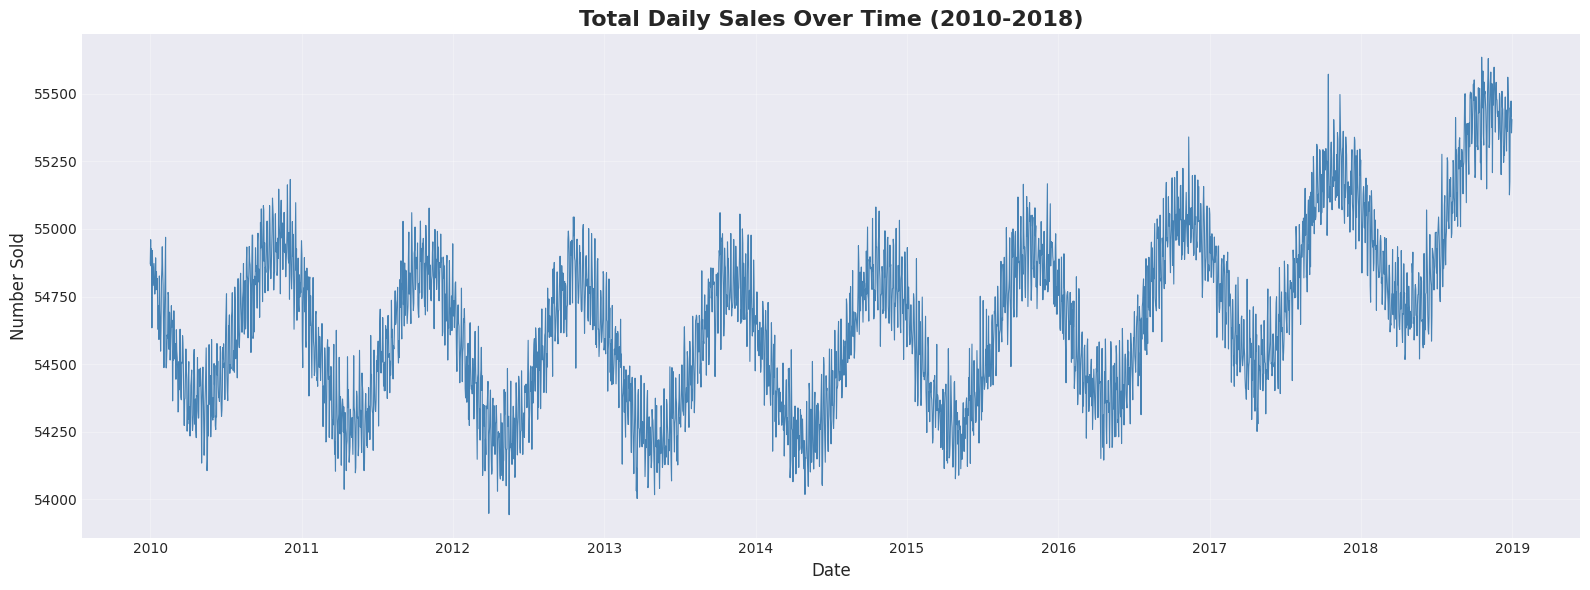

Overall trend: count     3287.000000
mean     54664.827502
std        311.111589
min      53943.000000
25%      54426.000000
50%      54655.000000
75%      54867.000000
max      55635.000000
Name: number_sold, dtype: float64


In [32]:
# Daily total sales over time
daily_sales = df_clean.groupby('Date')['number_sold'].sum().reset_index()

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(daily_sales['Date'], daily_sales['number_sold'], linewidth=0.8, color='steelblue')
ax.set_title('Total Daily Sales Over Time (2010-2018)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number Sold', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Overall trend: {daily_sales['number_sold'].describe()}")

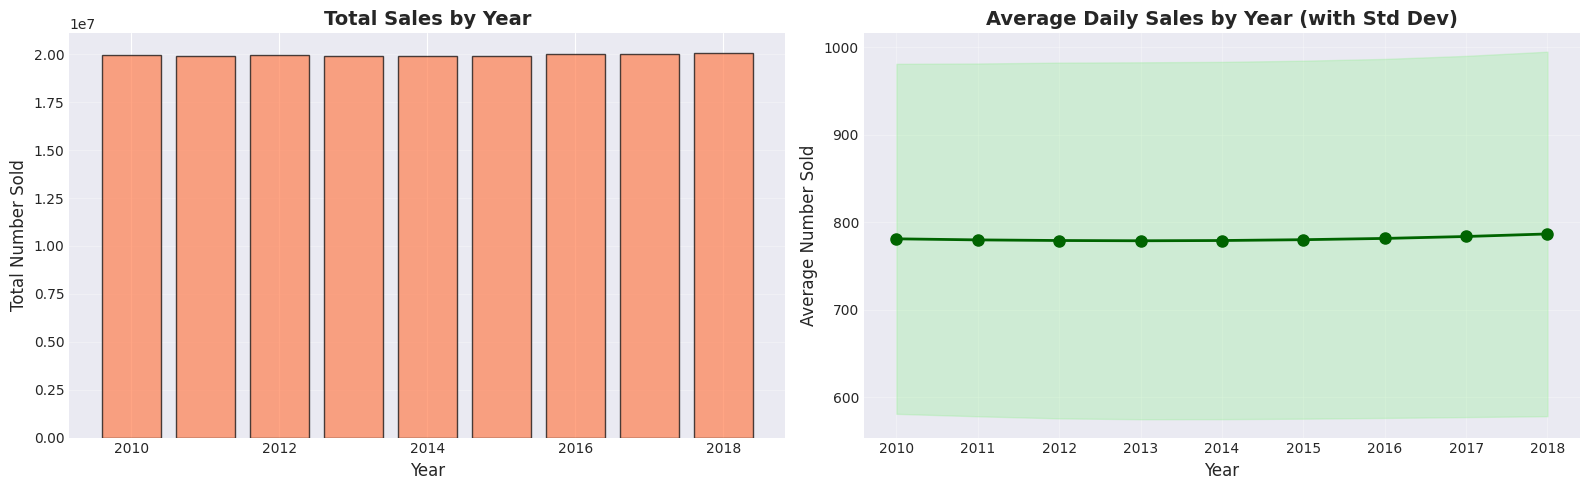

\nYearly Statistics:
   year       sum        mean         std
0  2010  19951393  780.876438  199.917832
1  2011  19920275  779.658513  201.516591
2  2012  19956937  778.959290  203.201437
3  2013  19895009  778.669628  203.871115
4  2014  19902095  778.946967  204.080528
5  2015  19926216  779.891037  204.480217
6  2016  20017834  781.336222  205.071848
7  2017  20019537  783.543523  206.319864
8  2018  20093992  786.457613  208.195489


In [33]:
# Yearly aggregates
yearly_sales = df_clean.groupby('year')['number_sold'].agg(['sum', 'mean', 'std']).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Total sales per year
axes[0].bar(yearly_sales['year'], yearly_sales['sum'], color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title('Total Sales by Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Total Number Sold', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Average sales per year
axes[1].plot(yearly_sales['year'], yearly_sales['mean'], marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1].fill_between(yearly_sales['year'], 
                       yearly_sales['mean'] - yearly_sales['std'],
                       yearly_sales['mean'] + yearly_sales['std'],
                       alpha=0.3, color='lightgreen')
axes[1].set_title('Average Daily Sales by Year (with Std Dev)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Average Number Sold', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\\nYearly Statistics:")
print(yearly_sales)

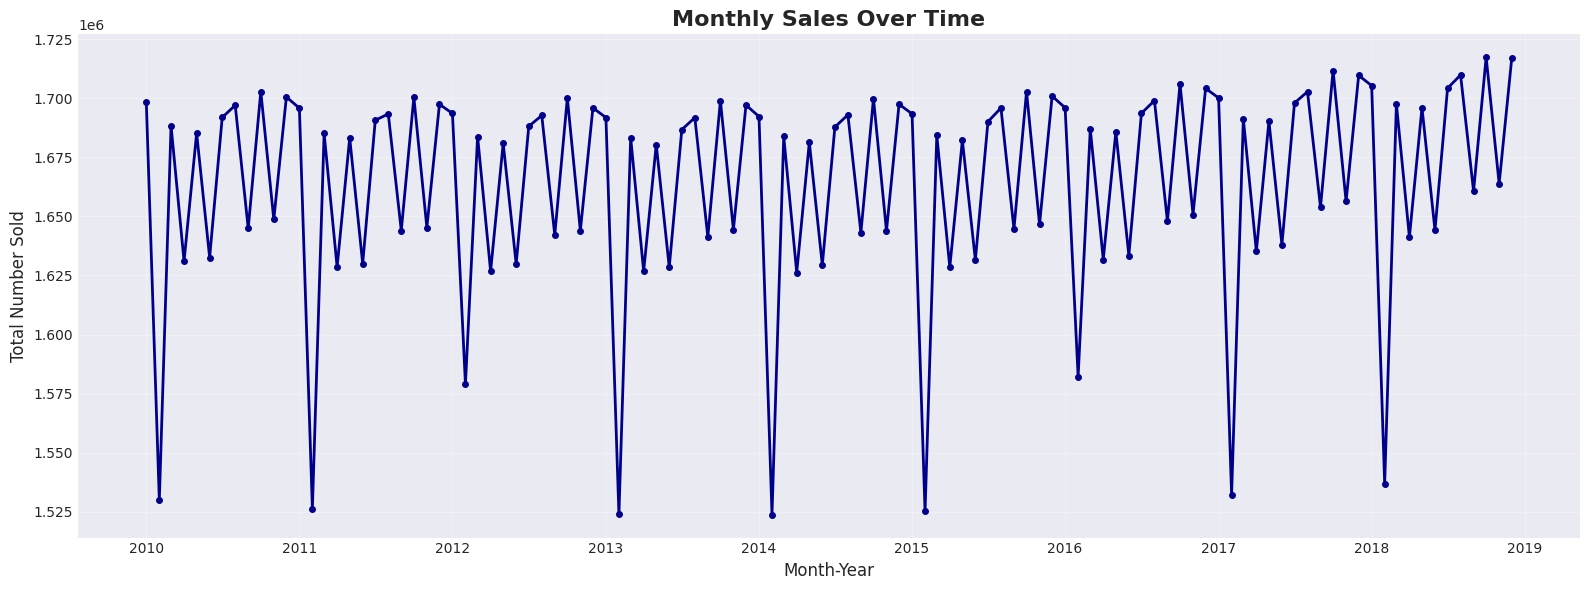

In [34]:
# Monthly aggregates
monthly_sales = df_clean.groupby(['year', 'month'])['number_sold'].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(monthly_sales['date'], monthly_sales['number_sold'], linewidth=2, marker='o', markersize=4, color='darkblue')
ax.set_title('Monthly Sales Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Total Number Sold', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

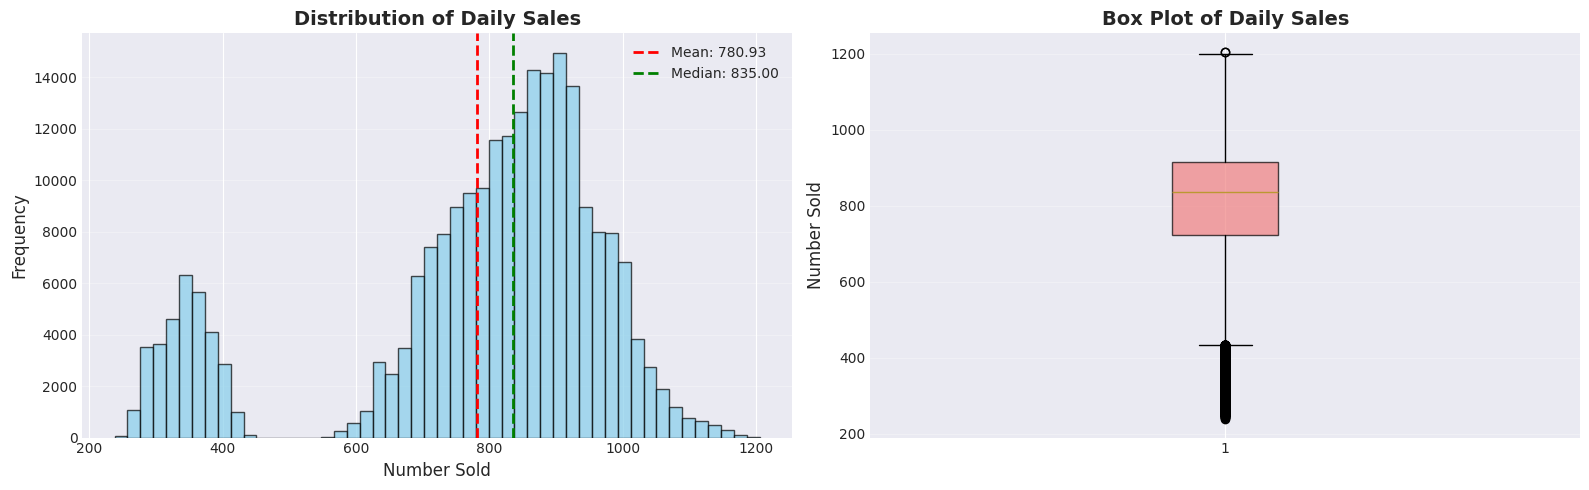

In [35]:
# Distribution of number_sold overall
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram
axes[0].hist(df_clean['number_sold'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df_clean['number_sold'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["number_sold"].mean():.2f}')
axes[0].axvline(df_clean['number_sold'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["number_sold"].median():.2f}')
axes[0].set_title('Distribution of Daily Sales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number Sold', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot
bp = axes[1].boxplot(df_clean['number_sold'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightcoral')
bp['boxes'][0].set_alpha(0.7)
axes[1].set_title('Box Plot of Daily Sales', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number Sold', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

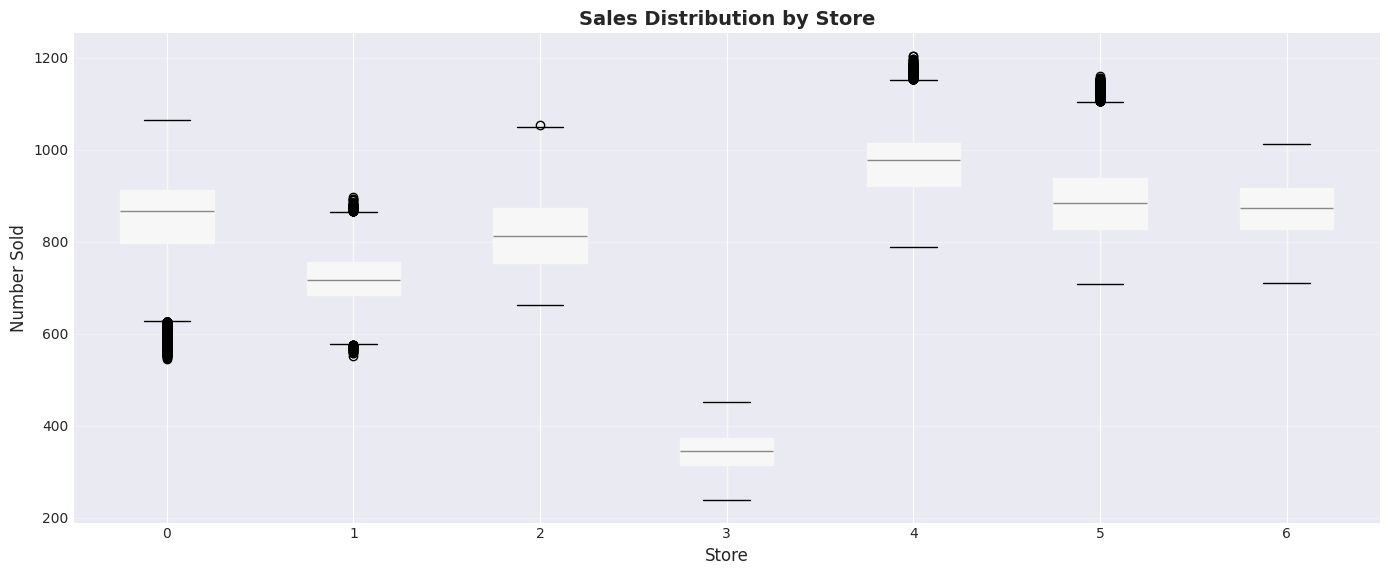

In [36]:
# Distribution per store
fig, ax = plt.subplots(figsize=(14, 6))
df_clean.boxplot(column='number_sold', by='store', ax=ax, patch_artist=True)
ax.set_title('Sales Distribution by Store', fontsize=14, fontweight='bold')
ax.set_xlabel('Store', fontsize=12)
ax.set_ylabel('Number Sold', fontsize=12)
plt.suptitle('')  
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

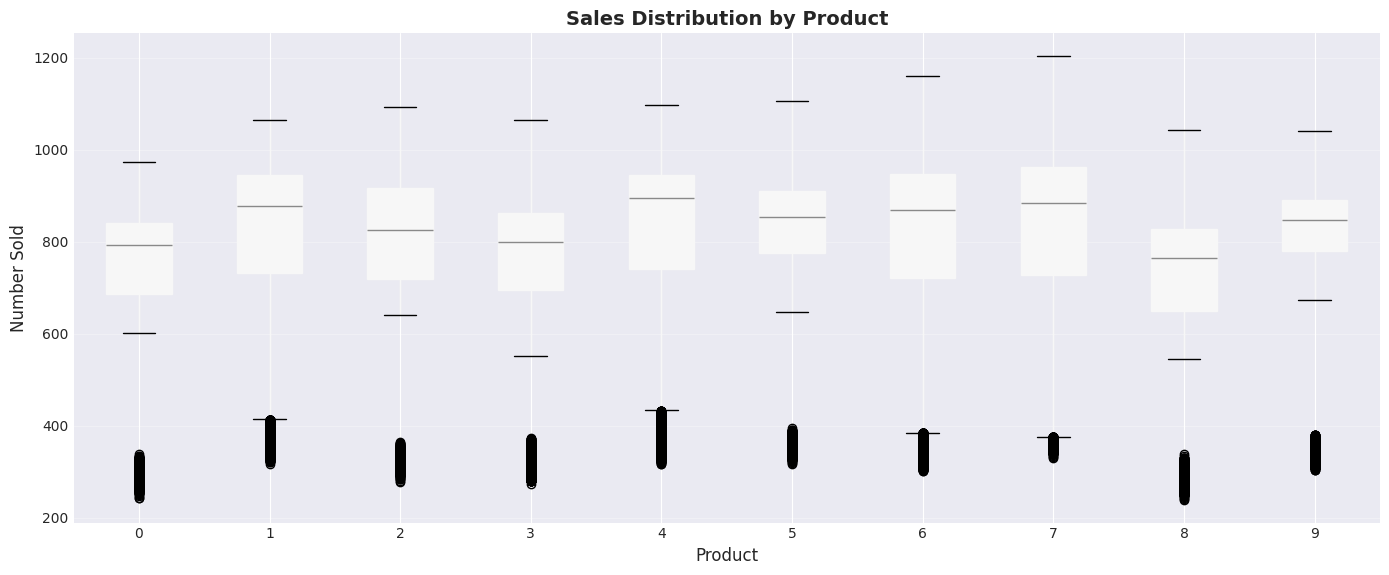

In [37]:
# Distribution per product
fig, ax = plt.subplots(figsize=(14, 6))
df_clean.boxplot(column='number_sold', by='product', ax=ax, patch_artist=True)
ax.set_title('Sales Distribution by Product', fontsize=14, fontweight='bold')
ax.set_xlabel('Product', fontsize=12)
ax.set_ylabel('Number Sold', fontsize=12)
plt.suptitle('') 
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

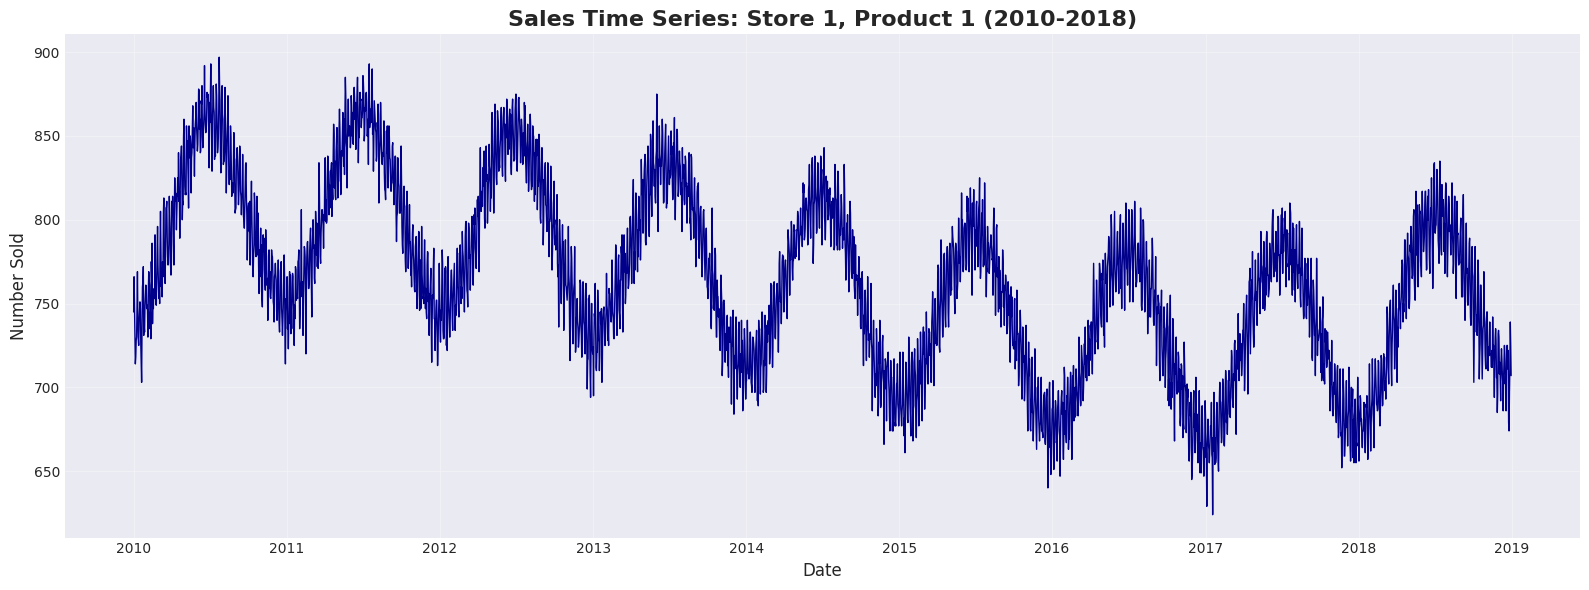

Total observations: 3287
Mean: 764.66
Std Dev: 52.65


In [38]:
# Sample time series: Store 1, Product 1
sample_series = df_clean[(df_clean['store'] == 1) & (df_clean['product'] == 1)].copy()
sample_series = sample_series.sort_values('Date').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(sample_series['Date'], sample_series['number_sold'], linewidth=1, color='darkblue')
ax.set_title('Sales Time Series: Store 1, Product 1 (2010-2018)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number Sold', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total observations: {len(sample_series)}")
print(f"Mean: {sample_series['number_sold'].mean():.2f}")
print(f"Std Dev: {sample_series['number_sold'].std():.2f}")

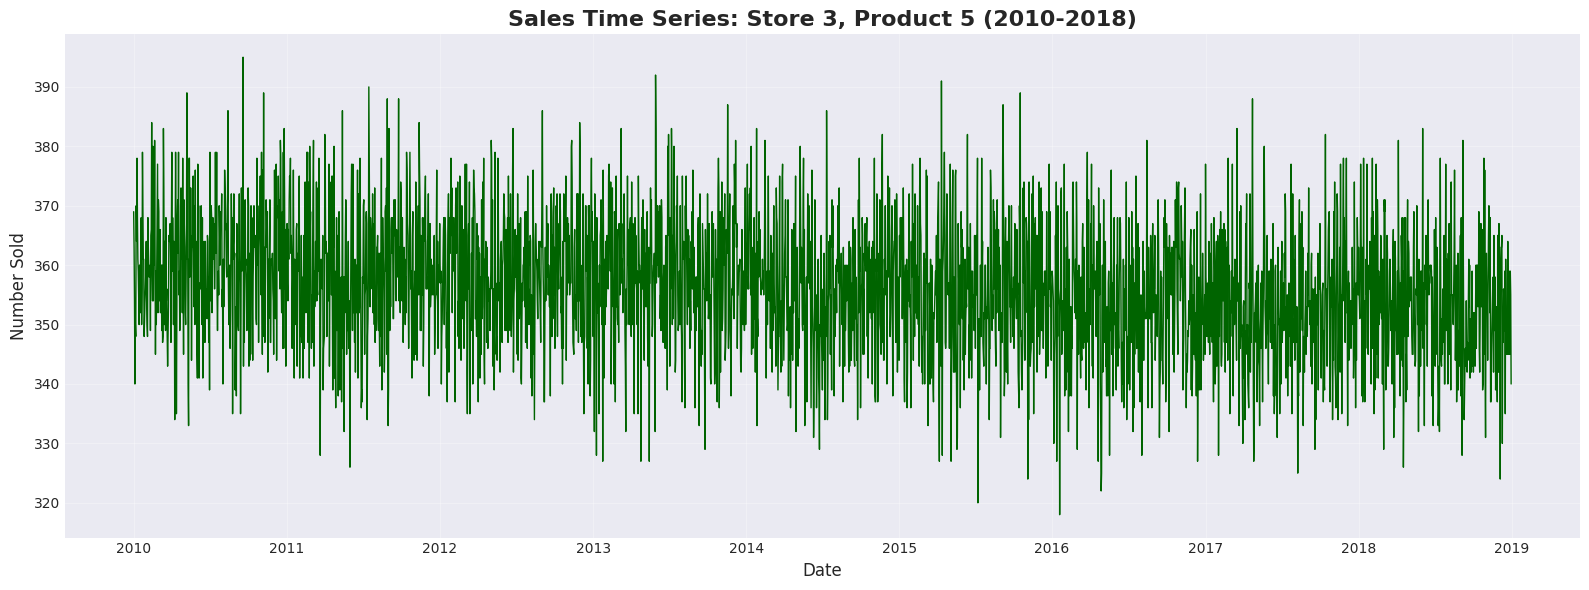

In [39]:
# Another sample: Store 3, Product 5
sample_series2 = df_clean[(df_clean['store'] == 3) & (df_clean['product'] == 5)].copy()
sample_series2 = sample_series2.sort_values('Date').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(sample_series2['Date'], sample_series2['number_sold'], linewidth=1, color='darkgreen')
ax.set_title('Sales Time Series: Store 3, Product 5 (2010-2018)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number Sold', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

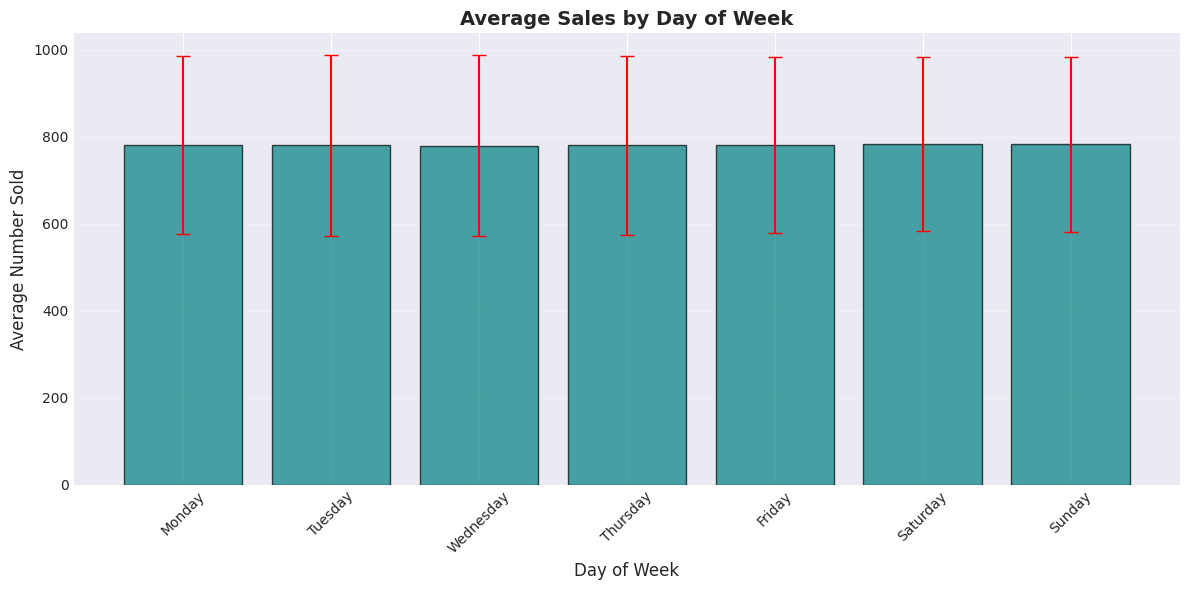

\nDay of Week Statistics:
   day_of_week        mean         std   day_name
0            0  780.915562  203.928673     Monday
1            1  779.800244  207.570235    Tuesday
2            2  779.491532  208.398612  Wednesday
3            3  780.231191  205.896866   Thursday
4            4  781.597568  202.064409     Friday
5            5  782.346717  199.965523   Saturday
6            6  782.093009  200.710380     Sunday


In [40]:
# Seasonal plots: Average sales by day of week
dow_sales = df_clean.groupby('day_of_week')['number_sold'].agg(['mean', 'std']).reset_index()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales['day_name'] = dow_sales['day_of_week'].apply(lambda x: day_names[x])

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(dow_sales['day_name'], dow_sales['mean'], color='teal', alpha=0.7, edgecolor='black')
ax.errorbar(dow_sales['day_name'], dow_sales['mean'], yerr=dow_sales['std'], fmt='none', color='red', capsize=5)
ax.set_title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Average Number Sold', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\\nDay of Week Statistics:")
print(dow_sales)

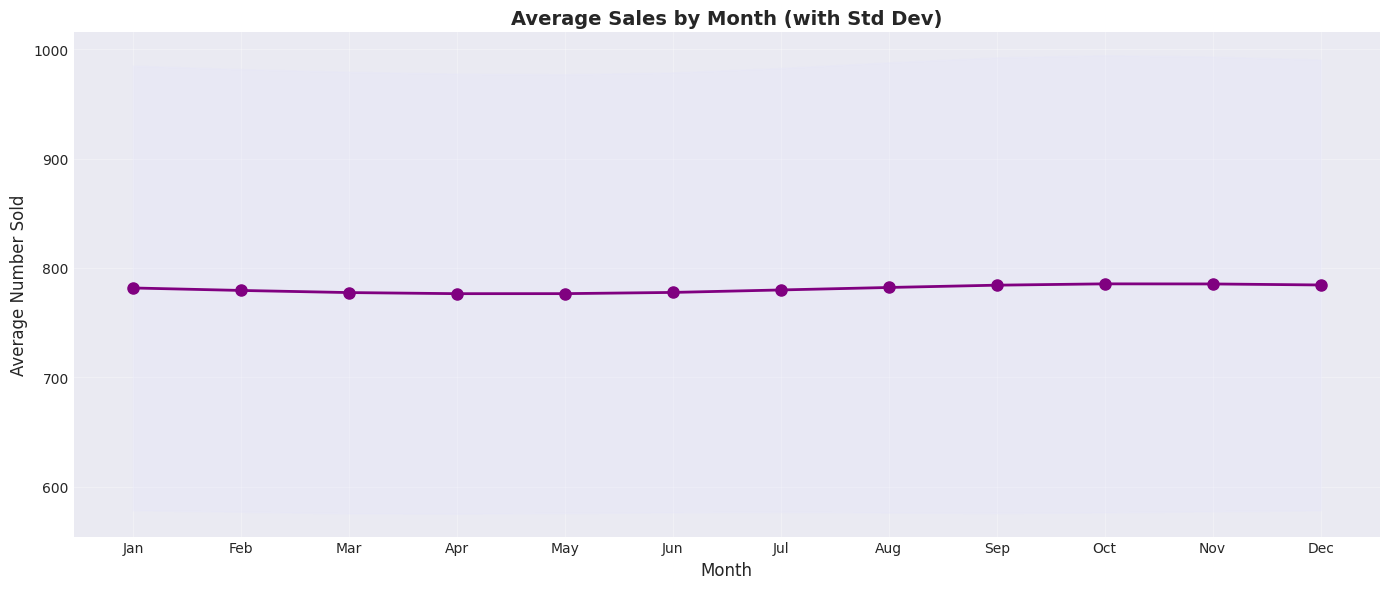

\nMonthly Statistics:
    month        mean         std month_name
0       1  781.716487  203.090724        Jan
1       2  779.450225  202.212330        Feb
2       3  777.509882  201.733780        Mar
3       4  776.503810  201.008912        Apr
4       5  776.527701  200.434818        May
5       6  777.640053  200.972094        Jun
6       7  779.897747  202.759951        Jul
7       8  782.162263  205.660517        Aug
8       9  784.262328  208.099983        Sep
9      10  785.475064  208.870738        Oct
10     11  785.387725  207.734803        Nov
11     12  784.450640  205.954794        Dec


In [41]:
# Seasonal plots: Average sales by month
month_sales = df_clean.groupby('month')['number_sold'].agg(['mean', 'std']).reset_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_sales['month_name'] = month_sales['month'].apply(lambda x: month_names[x-1])

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(month_sales['month_name'], month_sales['mean'], marker='o', linewidth=2, markersize=8, color='purple')
ax.fill_between(range(len(month_sales)), 
                 month_sales['mean'] - month_sales['std'],
                 month_sales['mean'] + month_sales['std'],
                 alpha=0.3, color='lavender')
ax.set_title('Average Sales by Month (with Std Dev)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Number Sold', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\\nMonthly Statistics:")
print(month_sales)

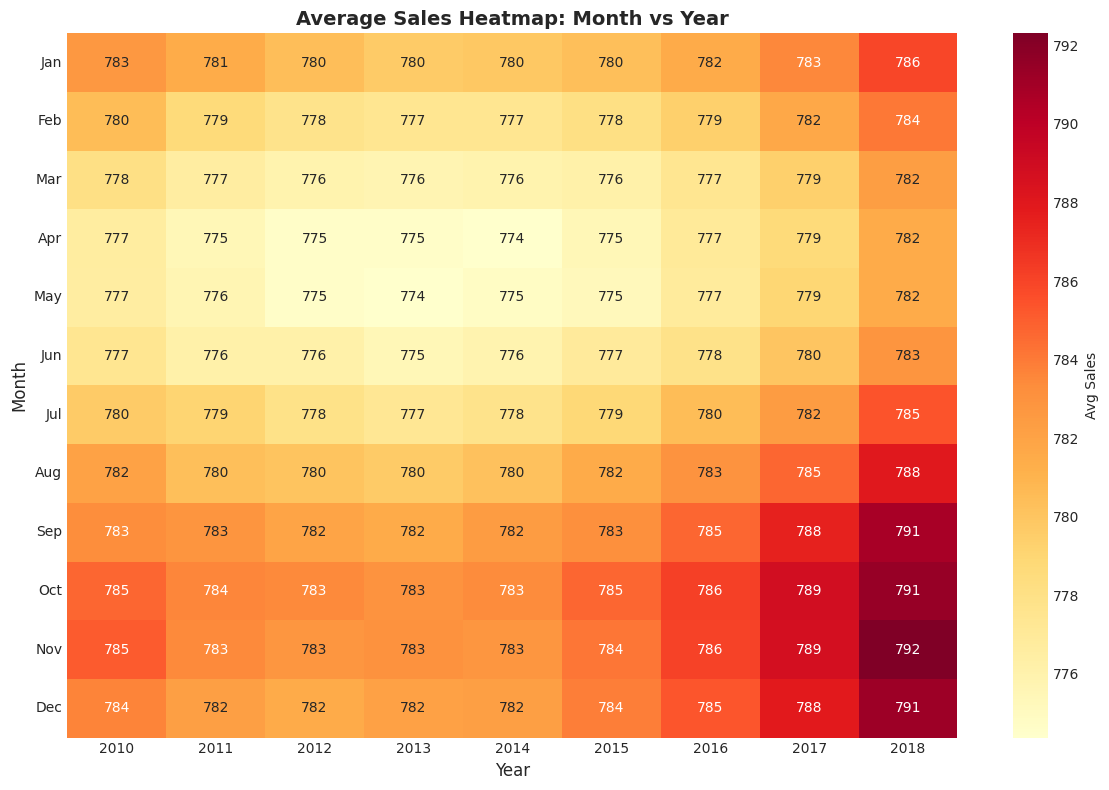

In [42]:
# Heatmap: Average sales by month and year
pivot_data = df_clean.groupby(['year', 'month'])['number_sold'].mean().reset_index()
pivot_table = pivot_data.pivot(index='month', columns='year', values='number_sold')

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Avg Sales'}, ax=ax)
ax.set_title('Average Sales Heatmap: Month vs Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Month', fontsize=12)
month_names_full = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_yticklabels(month_names_full, rotation=0)
plt.tight_layout()
plt.show()

In [43]:
# Prepare time series for decomposition (Store 1, Product 1)
ts_data = sample_series.set_index('Date')['number_sold'].asfreq('D')

# Handle any missing values by forward fill
ts_data = ts_data.fillna(method='ffill')

print(f"Time series prepared for decomposition: {len(ts_data)} observations")
print(f"Date range: {ts_data.index.min()} to {ts_data.index.max()}")

Time series prepared for decomposition: 3287 observations
Date range: 2010-01-01 00:00:00 to 2018-12-31 00:00:00


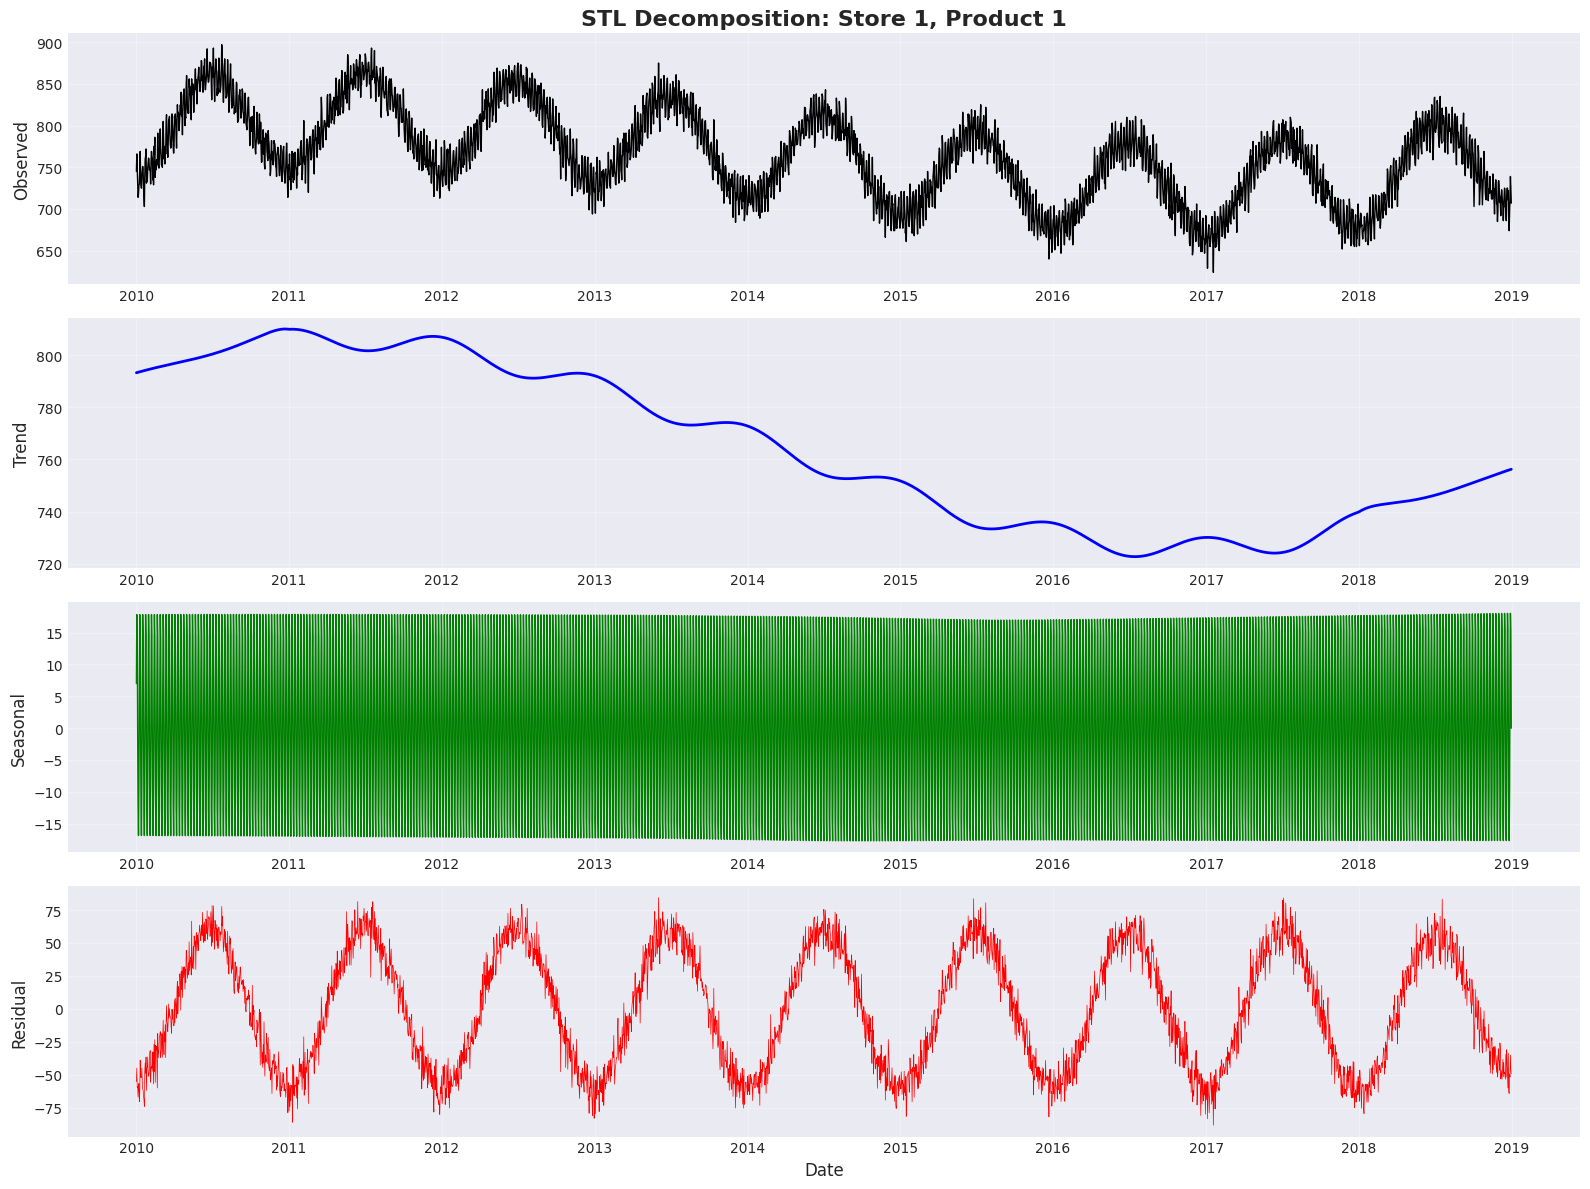

\nDecomposition Components Statistics:
Trend - Mean: 764.67, Std: 29.85
Seasonal - Mean: 0.01, Std: 12.81
Residual - Mean: -0.03, Std: 43.44


In [44]:
# STL Decomposition (Seasonal and Trend decomposition using Loess)
# Using period of 365 days (yearly seasonality)
stl = STL(ts_data, seasonal=365, trend=731)  # trend is odd and >= seasonal
result = stl.fit()

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

# Original
axes[0].plot(result.observed, linewidth=1, color='black')
axes[0].set_ylabel('Observed', fontsize=12)
axes[0].set_title('STL Decomposition: Store 1, Product 1', fontsize=16, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(result.trend, linewidth=2, color='blue')
axes[1].set_ylabel('Trend', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Seasonal
axes[2].plot(result.seasonal, linewidth=1, color='green')
axes[2].set_ylabel('Seasonal', fontsize=12)
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(result.resid, linewidth=0.5, color='red')
axes[3].set_ylabel('Residual', fontsize=12)
axes[3].set_xlabel('Date', fontsize=12)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\\nDecomposition Components Statistics:")
print(f"Trend - Mean: {result.trend.mean():.2f}, Std: {result.trend.std():.2f}")
print(f"Seasonal - Mean: {result.seasonal.mean():.2f}, Std: {result.seasonal.std():.2f}")
print(f"Residual - Mean: {result.resid.mean():.2f}, Std: {result.resid.std():.2f}")

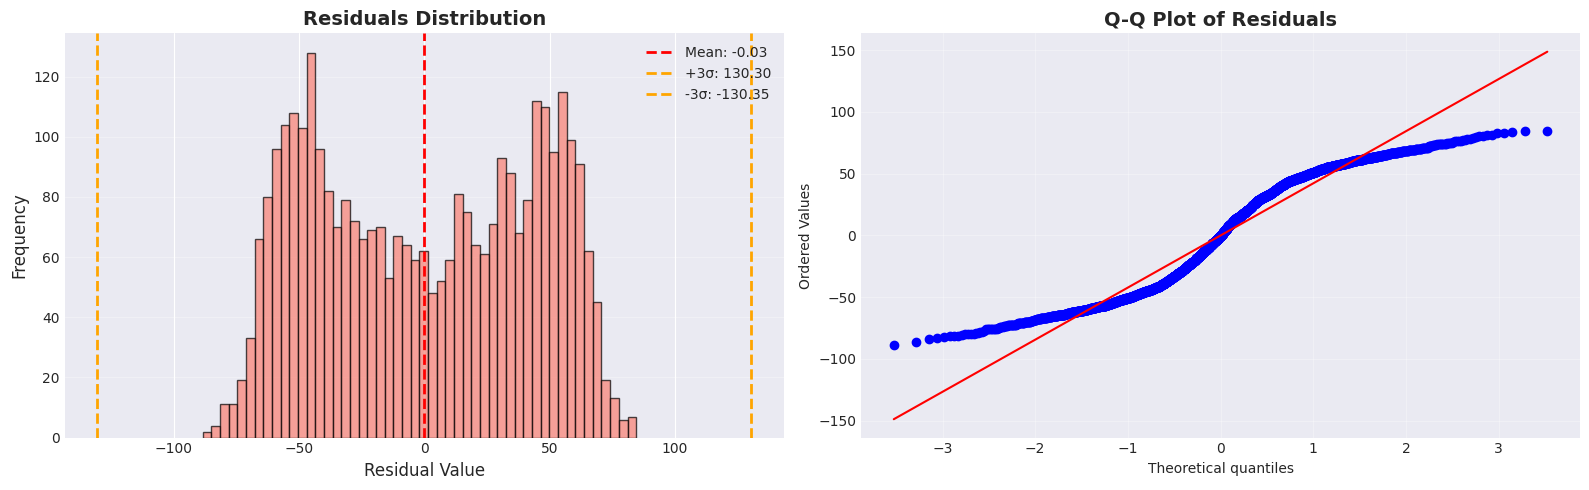

In [45]:
# Analyze residuals for anomaly detection baseline
residuals = result.resid.dropna()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Residuals histogram
axes[0].hist(residuals, bins=50, color='salmon', edgecolor='black', alpha=0.7)
axes[0].axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {residuals.mean():.2f}')
axes[0].axvline(residuals.mean() + 3*residuals.std(), color='orange', linestyle='--', linewidth=2, label=f'+3σ: {residuals.mean() + 3*residuals.std():.2f}')
axes[0].axvline(residuals.mean() - 3*residuals.std(), color='orange', linestyle='--', linewidth=2, label=f'-3σ: {residuals.mean() - 3*residuals.std():.2f}')
axes[0].set_title('Residuals Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Residual Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Q-Q plot for normality
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [46]:
# Augmented Dickey-Fuller Test for stationarity
def adf_test(series, name=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'\\nAugmented Dickey-Fuller Test: {name}')
    print('=' * 60)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'P-value: {result[1]:.4f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\\t{key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print(f"\\n✅ Result: Time series is STATIONARY (p-value <= 0.05)")
    else:
        print(f"\\n❌ Result: Time series is NON-STATIONARY (p-value > 0.05)")
        print("   Time-dependent structure (trend/seasonality) exists.")
    
    return result

# Test on original series
adf_result = adf_test(ts_data, 'Original Series (Store 1, Product 1)')

\nAugmented Dickey-Fuller Test: Original Series (Store 1, Product 1)
ADF Statistic: -4.1594
P-value: 0.0008
Critical Values:
\t1%: -3.432
\t5%: -2.862
\t10%: -2.567
\n✅ Result: Time series is STATIONARY (p-value <= 0.05)


In [47]:
# Test on detrended series (residuals from STL)
adf_result_resid = adf_test(result.resid, 'Residuals (Detrended & Deseasonalized)')

\nAugmented Dickey-Fuller Test: Residuals (Detrended & Deseasonalized)
ADF Statistic: -5.9587
P-value: 0.0000
Critical Values:
\t1%: -3.432
\t5%: -2.862
\t10%: -2.567
\n✅ Result: Time series is STATIONARY (p-value <= 0.05)


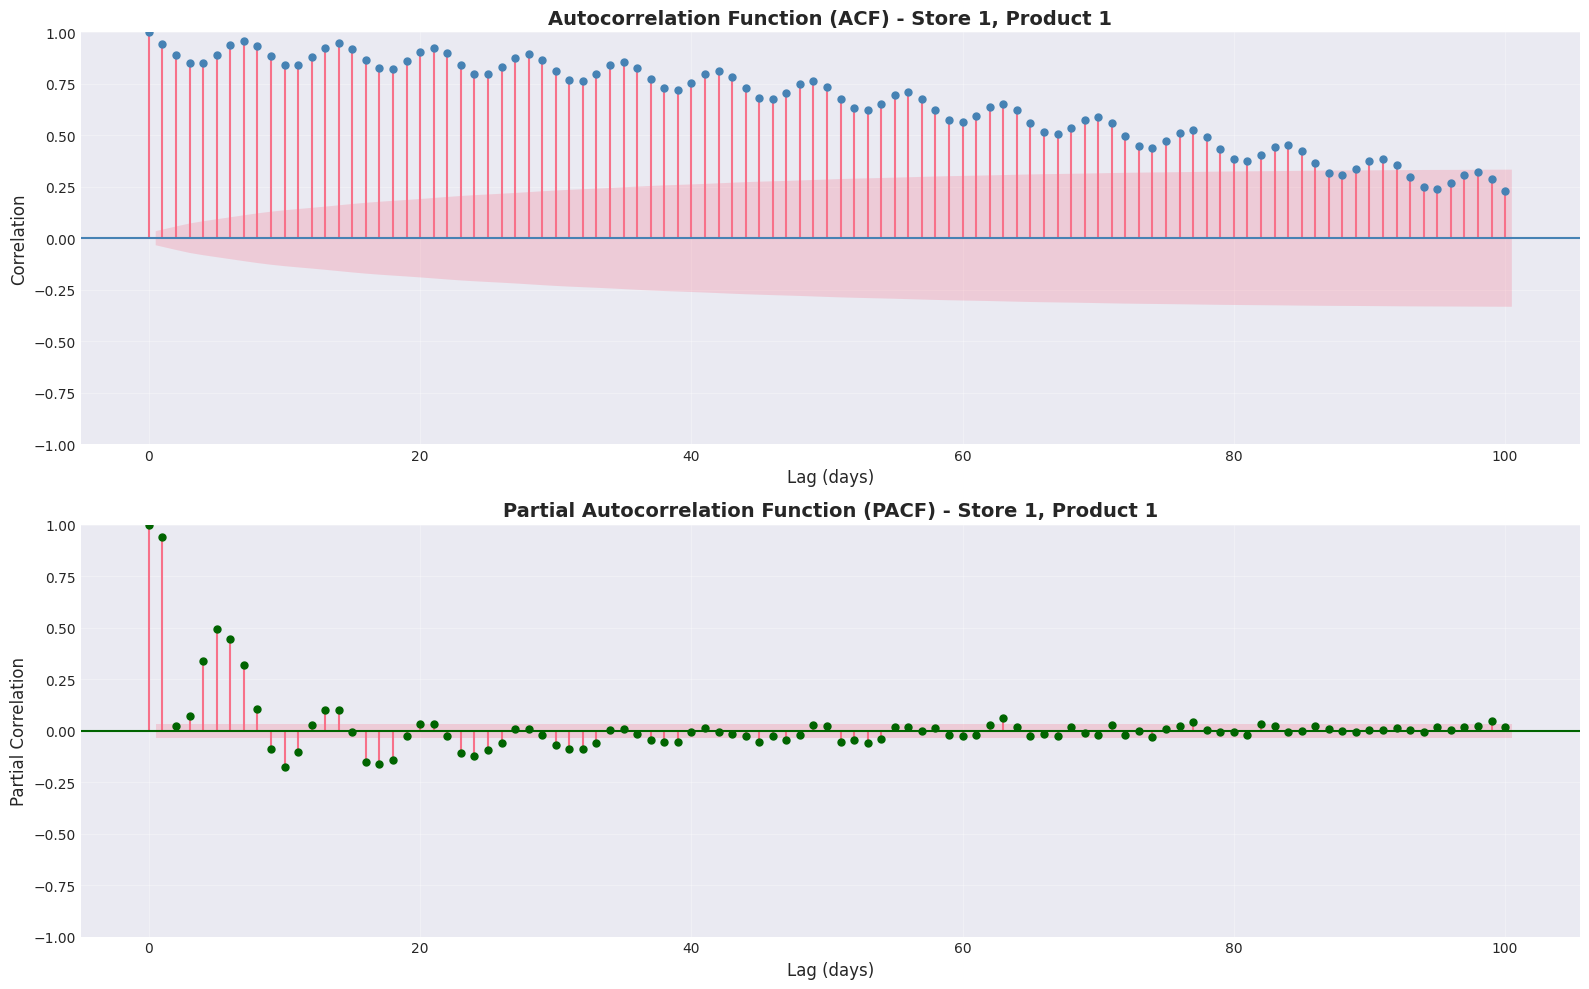

Key Observations:
- ACF shows how current values correlate with past values
- PACF removes indirect correlations
- Strong correlations indicate predictable patterns
- Useful for determining ARIMA model parameters


In [48]:
# ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Autocorrelation Function (ACF)
plot_acf(ts_data, lags=100, ax=axes[0], color='steelblue')
axes[0].set_title('Autocorrelation Function (ACF) - Store 1, Product 1', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Lag (days)', fontsize=12)
axes[0].set_ylabel('Correlation', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Partial Autocorrelation Function (PACF)
plot_pacf(ts_data, lags=100, ax=axes[1], method='ywm', color='darkgreen')
axes[1].set_title('Partial Autocorrelation Function (PACF) - Store 1, Product 1', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Lag (days)', fontsize=12)
axes[1].set_ylabel('Partial Correlation', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Observations:")
print("- ACF shows how current values correlate with past values")
print("- PACF removes indirect correlations")
print("- Strong correlations indicate predictable patterns")
print("- Useful for determining ARIMA model parameters")

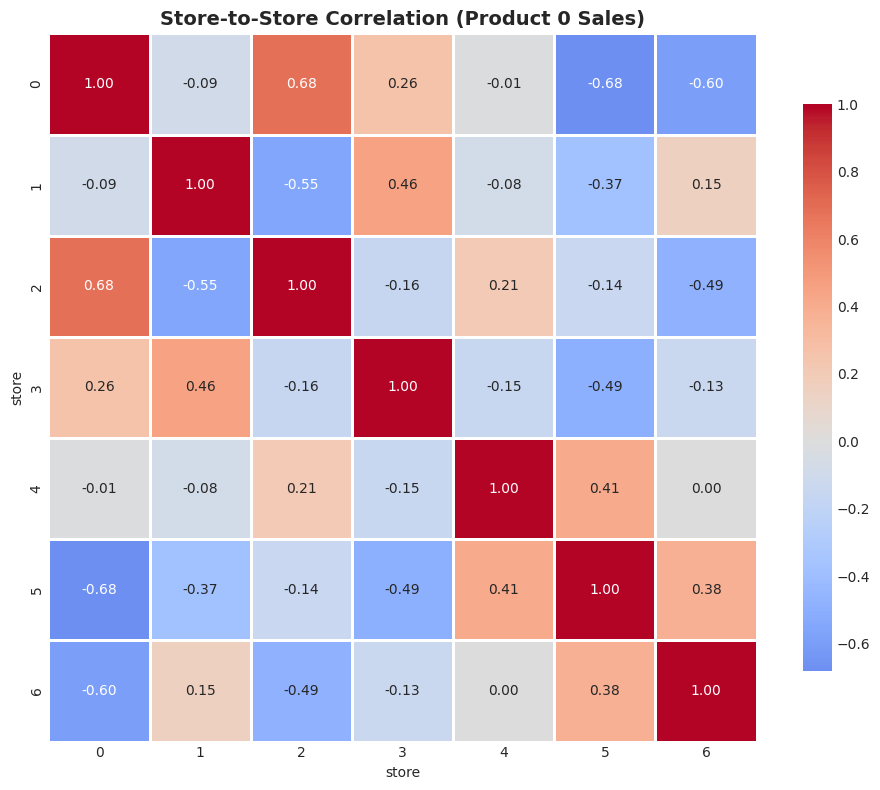

\nStore Correlation Matrix:
store         0         1         2         3         4         5         6
store                                                                      
0      1.000000 -0.092892  0.683453  0.261162 -0.013377 -0.680088 -0.599108
1     -0.092892  1.000000 -0.554266  0.456786 -0.076864 -0.372033  0.148452
2      0.683453 -0.554266  1.000000 -0.157802  0.212195 -0.143751 -0.486298
3      0.261162  0.456786 -0.157802  1.000000 -0.154991 -0.492572 -0.128828
4     -0.013377 -0.076864  0.212195 -0.154991  1.000000  0.407818  0.003801
5     -0.680088 -0.372033 -0.143751 -0.492572  0.407818  1.000000  0.382385
6     -0.599108  0.148452 -0.486298 -0.128828  0.003801  0.382385  1.000000


In [49]:
# Correlation between stores (for a specific product)
product_0_data = df_clean[df_clean['product'] == 0].pivot(index='Date', columns='store', values='number_sold')
store_corr = product_0_data.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(store_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Store-to-Store Correlation (Product 0 Sales)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\\nStore Correlation Matrix:")
print(store_corr)

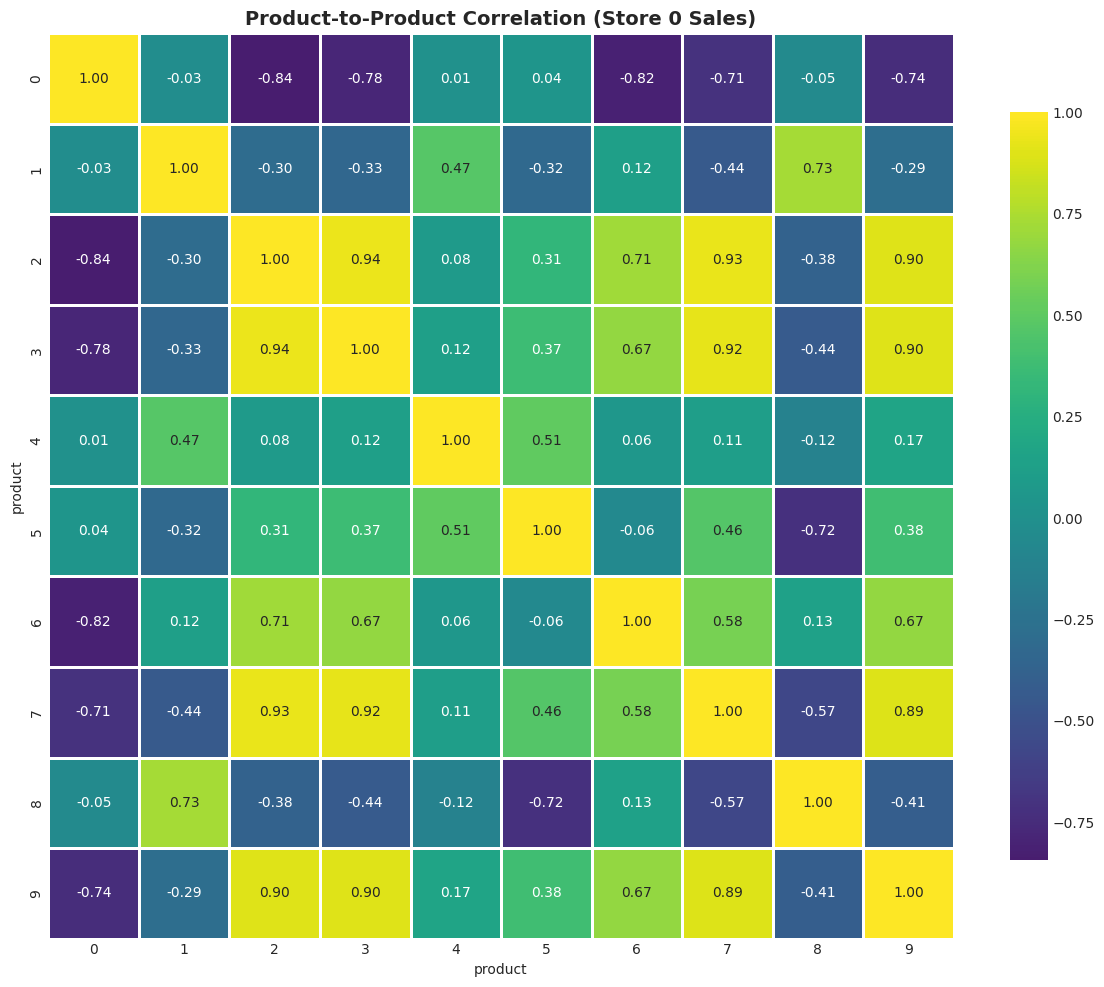

\nProduct Correlation Matrix:
product         0         1         2         3         4         5         6  \
product                                                                         
0        1.000000 -0.028240 -0.841733 -0.780618  0.006779  0.041453 -0.815140   
1       -0.028240  1.000000 -0.297520 -0.331484  0.469544 -0.319363  0.122147   
2       -0.841733 -0.297520  1.000000  0.940589  0.083304  0.309688  0.714790   
3       -0.780618 -0.331484  0.940589  1.000000  0.121053  0.368927  0.674925   
4        0.006779  0.469544  0.083304  0.121053  1.000000  0.510402  0.060548   
5        0.041453 -0.319363  0.309688  0.368927  0.510402  1.000000 -0.058871   
6       -0.815140  0.122147  0.714790  0.674925  0.060548 -0.058871  1.000000   
7       -0.711863 -0.443871  0.929979  0.924155  0.110676  0.462713  0.583969   
8       -0.048190  0.729481 -0.381122 -0.437317 -0.121286 -0.719748  0.131568   
9       -0.742916 -0.287678  0.904058  0.903542  0.166784  0.384819  0.673444  

In [50]:
# Correlation between products (for a specific store)
store_0_data = df_clean[df_clean['store'] == 0].pivot(index='Date', columns='product', values='number_sold')
product_corr = store_0_data.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(product_corr, annot=True, fmt='.2f', cmap='viridis', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Product-to-Product Correlation (Store 0 Sales)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\\nProduct Correlation Matrix:")
print(product_corr)

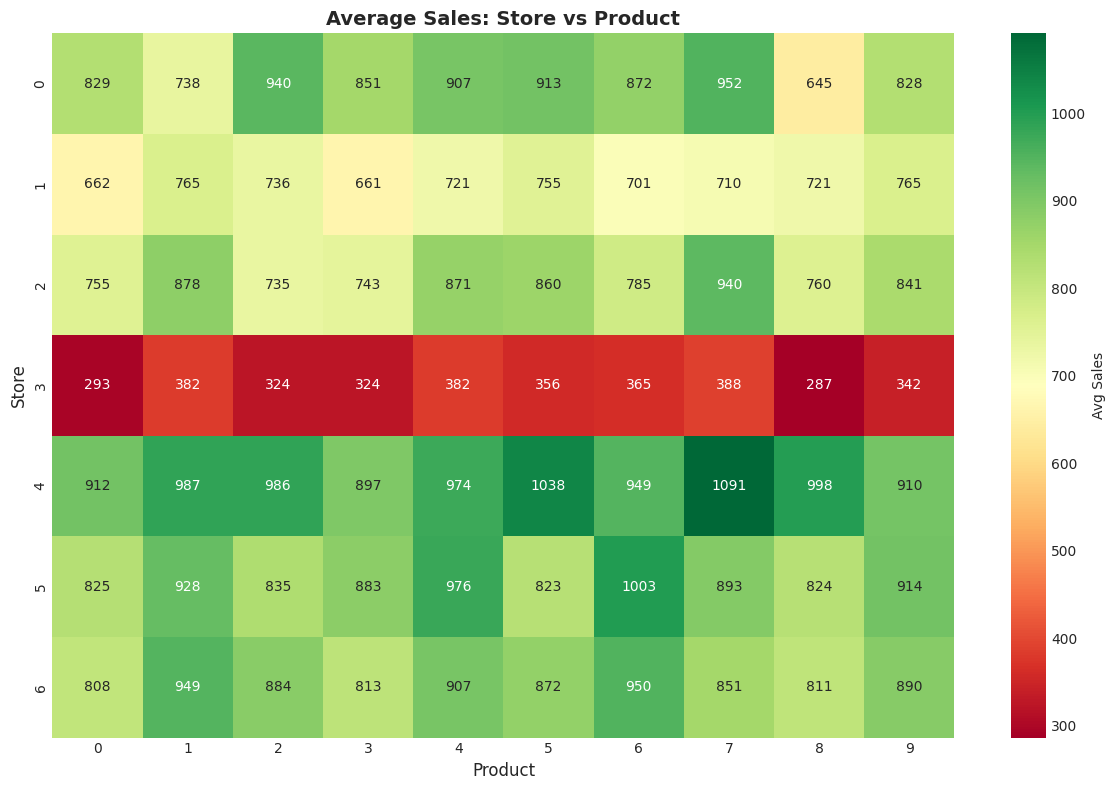

In [51]:
# Average sales comparison across stores and products
avg_sales_pivot = df_clean.groupby(['store', 'product'])['number_sold'].mean().reset_index()
avg_sales_matrix = avg_sales_pivot.pivot(index='store', columns='product', values='number_sold')

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(avg_sales_matrix, annot=True, fmt='.0f', cmap='RdYlGn', 
            cbar_kws={'label': 'Avg Sales'}, ax=ax)
ax.set_title('Average Sales: Store vs Product', fontsize=14, fontweight='bold')
ax.set_xlabel('Product', fontsize=12)
ax.set_ylabel('Store', fontsize=12)
plt.tight_layout()
plt.show()

In [52]:
print("=" * 80)
print("TIME-SERIES EDA SUMMARY")
print("=" * 80)

print("\\n📊 GLOBAL PATTERNS:")
print(f"   • Dataset spans {df_clean['year'].nunique()} years (2010-2018)")
print(f"   • Average daily sales across all stores/products: {df_clean['number_sold'].mean():.2f}")
print(f"   • Sales show {'increasing' if yearly_sales['mean'].iloc[-1] > yearly_sales['mean'].iloc[0] else 'decreasing'} trend over years")

print("\\n📈 SEASONALITY:")
highest_month = month_sales.loc[month_sales['mean'].idxmax(), 'month_name']
lowest_month = month_sales.loc[month_sales['mean'].idxmin(), 'month_name']
print(f"   • Highest sales month: {highest_month}")
print(f"   • Lowest sales month: {lowest_month}")

highest_dow = dow_sales.loc[dow_sales['mean'].idxmax(), 'day_name']
lowest_dow = dow_sales.loc[dow_sales['mean'].idxmin(), 'day_name']
print(f"   • Highest sales day: {highest_dow}")
print(f"   • Lowest sales day: {lowest_dow}")

print("\\n🔍 TIME SERIES CHARACTERISTICS:")
print(f"   • Stationarity: {'Yes' if adf_result[1] <= 0.05 else 'No (requires transformation)'}")
print(f"   • Strong autocorrelation detected: Yes (ACF shows significant lags)")
print(f"   • Residual variance: {result.resid.std():.2f}")

print("\\n🔗 CORRELATIONS:")
max_store_corr = store_corr.values[np.triu_indices_from(store_corr.values, k=1)].max()
max_product_corr = product_corr.values[np.triu_indices_from(product_corr.values, k=1)].max()
print(f"   • Max store-to-store correlation: {max_store_corr:.2f}")
print(f"   • Max product-to-product correlation: {max_product_corr:.2f}")

print("\\n✅ NEXT STEPS FOR ANOMALY DETECTION:")
print("   1. Use STL decomposition residuals as baseline")
print("   2. Apply Z-score or MAD on residuals")
print("   3. Consider rolling statistics for adaptive thresholds")
print("   4. Optionally use Isolation Forest for multivariate anomalies")
print("   5. Account for seasonality patterns identified")
print("=" * 80)

TIME-SERIES EDA SUMMARY
\n📊 GLOBAL PATTERNS:
   • Dataset spans 9 years (2010-2018)
   • Average daily sales across all stores/products: 780.93
   • Sales show increasing trend over years
\n📈 SEASONALITY:
   • Highest sales month: Oct
   • Lowest sales month: Apr
   • Highest sales day: Saturday
   • Lowest sales day: Wednesday
\n🔍 TIME SERIES CHARACTERISTICS:
   • Stationarity: Yes
   • Strong autocorrelation detected: Yes (ACF shows significant lags)
   • Residual variance: 43.44
\n🔗 CORRELATIONS:
   • Max store-to-store correlation: 0.68
   • Max product-to-product correlation: 0.94
\n✅ NEXT STEPS FOR ANOMALY DETECTION:
   1. Use STL decomposition residuals as baseline
   2. Apply Z-score or MAD on residuals
   3. Consider rolling statistics for adaptive thresholds
   4. Optionally use Isolation Forest for multivariate anomalies
   5. Account for seasonality patterns identified


# This Part implements multiple anomaly detection methods:
- BASIC: Z-Score, IQR, Moving Average
- INTERMEDIATE: MAD, Rolling Statistics, STL+Residuals
- ADVANCED: Isolation Forest, LOF, One-Class SVM, DBSCAN

In [53]:
# Additional imports for anomaly detection
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

print("✅ Anomaly detection libraries imported successfully!")

✅ Anomaly detection libraries imported successfully!


In [54]:
# Load cleaned data (already done in EDA, but refreshing)
print("Loading data for anomaly detection...")

# Use the same sample series from EDA (Store 1, Product 1)
sample_series = df_clean[(df_clean['store'] == 1) & (df_clean['product'] == 1)].copy()
sample_series = sample_series.sort_values('Date').reset_index(drop=True)

# Prepare time series
ts_data = sample_series.set_index('Date')['number_sold'].asfreq('D').fillna(method='ffill')

print(f"Sample series prepared: {len(ts_data)} observations")
print(f"Date range: {ts_data.index.min()} to {ts_data.index.max()}")
print(f"Statistics: Mean={ts_data.mean():.2f}, Std={ts_data.std():.2f}")

Loading data for anomaly detection...
Sample series prepared: 3287 observations
Date range: 2010-01-01 00:00:00 to 2018-12-31 00:00:00
Statistics: Mean=764.66, Std=52.65


In [55]:
# Helper function to visualize anomalies
def plot_anomalies(ts_data, anomalies_idx, method_name, color='red', figsize=(16, 6)):
    """Plot time series with detected anomalies highlighted"""
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot original data
    ax.plot(ts_data.index, ts_data.values, linewidth=1, color='steelblue', label='Normal', alpha=0.7)
    
    # Highlight anomalies
    if len(anomalies_idx) > 0:
        ax.scatter(ts_data.index[anomalies_idx], ts_data.values[anomalies_idx], 
                   color=color, s=50, label='Anomaly', zorder=5, edgecolors='black', linewidth=1)
    
    ax.set_title(f'Anomaly Detection: {method_name}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Number Sold', fontsize=12)
    ax.legend(loc='upper left', fontsize=11)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\\n{method_name} Results:")
    print(f"  Total anomalies detected: {len(anomalies_idx)}")
    print(f"  Percentage: {len(anomalies_idx)/len(ts_data)*100:.2f}%")
    if len(anomalies_idx) > 0:
        print(f"  Anomaly dates (first 10): {list(ts_data.index[anomalies_idx][:10])}")

# Helper to create summary DataFrame
def create_anomaly_summary(ts_data, anomalies_idx, method_name):
    """Create a DataFrame of detected anomalies"""
    if len(anomalies_idx) == 0:
        return pd.DataFrame()
    
    anomaly_df = pd.DataFrame({
        'Date': ts_data.index[anomalies_idx],
        'Value': ts_data.values[anomalies_idx],
        'Method': method_name
    })
    return anomaly_df

print("✅ Helper functions defined!")

✅ Helper functions defined!


BASIC METHOD 1: Z-SCORE (3-Sigma Rule)


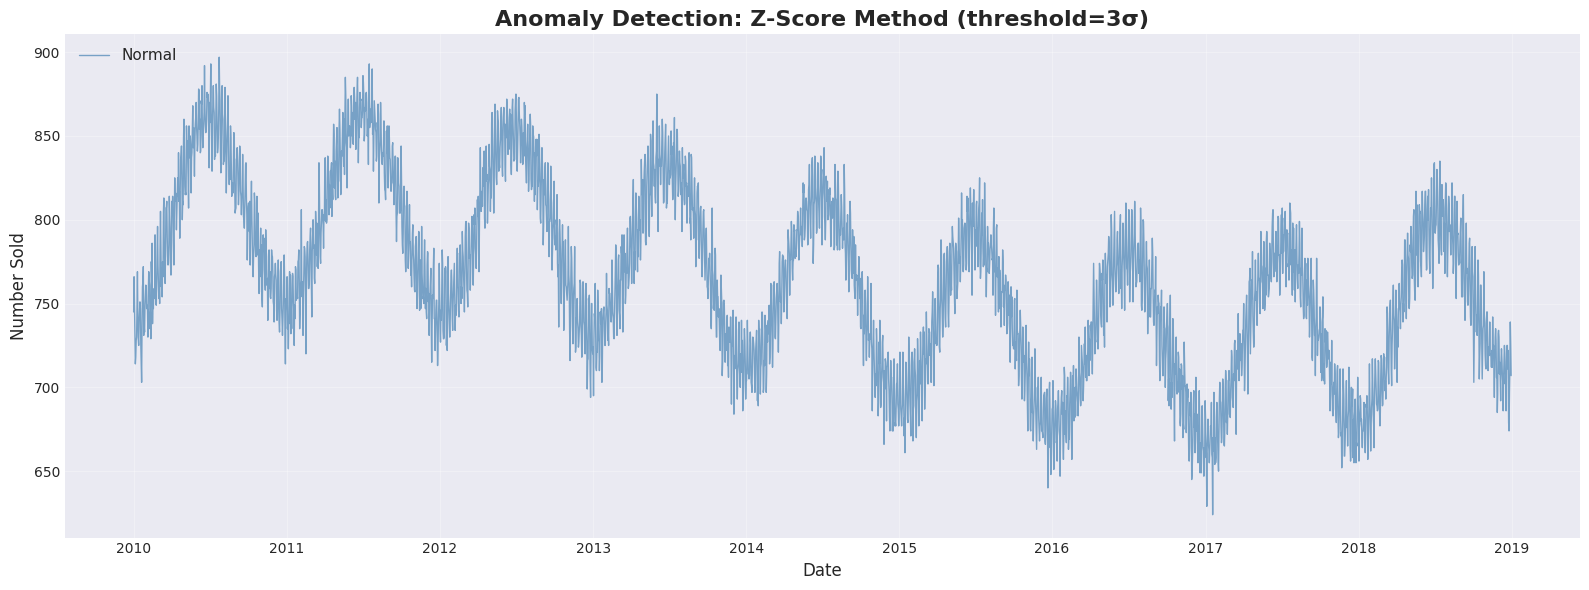

\nZ-Score Method (threshold=3σ) Results:
  Total anomalies detected: 0
  Percentage: 0.00%
\nZ-Score Statistics:
  Mean Z-score: 0.82
  Max Z-score: 2.67
  Threshold: 3


In [56]:
print("=" * 80)
print("BASIC METHOD 1: Z-SCORE (3-Sigma Rule)")
print("=" * 80)

# Calculate Z-scores
z_scores = np.abs(zscore(ts_data))

# Threshold: 3 standard deviations
threshold_z = 3
anomalies_zscore = np.where(z_scores > threshold_z)[0]

# Visualize
plot_anomalies(ts_data, anomalies_zscore, 'Z-Score Method (threshold=3σ)', color='red')

# Store results
zscore_anomalies = create_anomaly_summary(ts_data, anomalies_zscore, 'Z-Score')

print(f"\\nZ-Score Statistics:")
print(f"  Mean Z-score: {z_scores.mean():.2f}")
print(f"  Max Z-score: {z_scores.max():.2f}")
print(f"  Threshold: {threshold_z}")

\n================================================================================
BASIC METHOD 2: IQR (Interquartile Range)


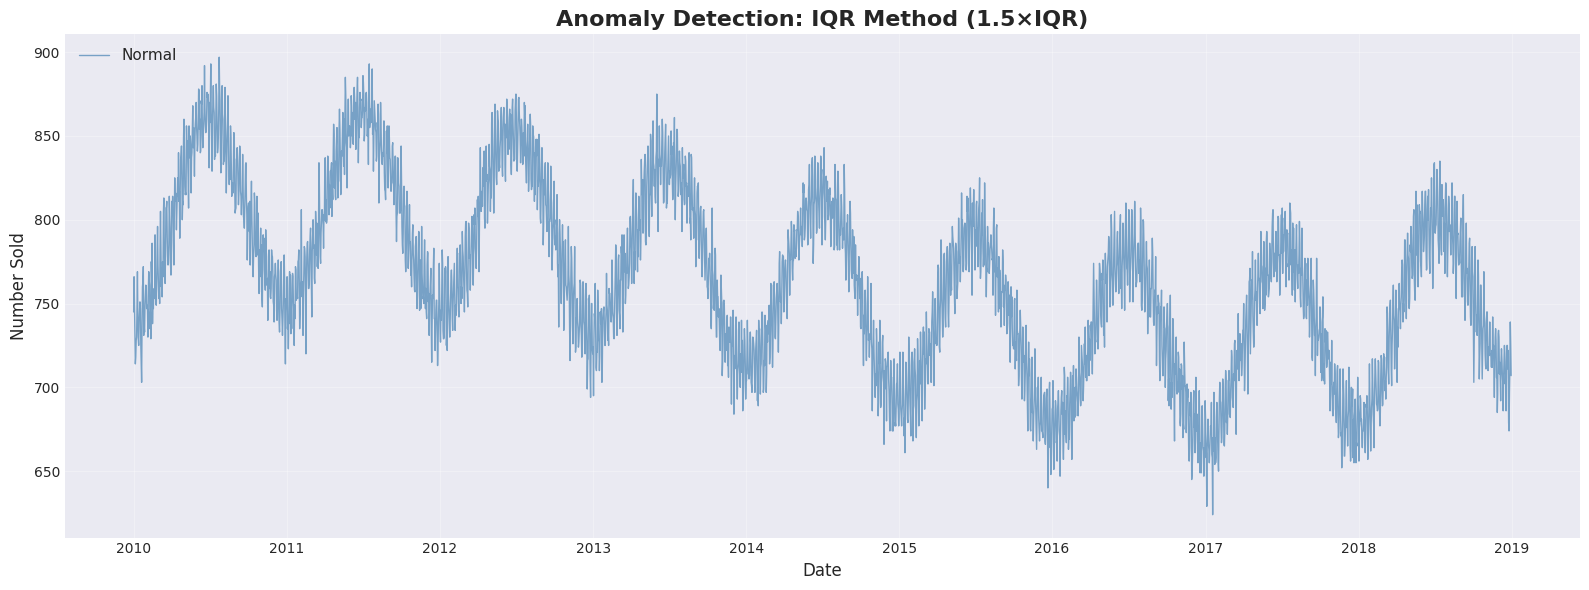

\nIQR Method (1.5×IQR) Results:
  Total anomalies detected: 0
  Percentage: 0.00%
\nIQR Statistics:
  Q1: 726.00
  Q3: 803.00
  IQR: 77.00
  Lower Bound: 610.50
  Upper Bound: 918.50


In [57]:
print("\\n" + "=" * 80)
print("BASIC METHOD 2: IQR (Interquartile Range)")
print("=" * 80)

# Calculate IQR
Q1 = ts_data.quantile(0.25)
Q3 = ts_data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect anomalies
anomalies_iqr = np.where((ts_data < lower_bound) | (ts_data > upper_bound))[0]

# Visualize
plot_anomalies(ts_data, anomalies_iqr, 'IQR Method (1.5×IQR)', color='orange')

# Store results
iqr_anomalies = create_anomaly_summary(ts_data, anomalies_iqr, 'IQR')

print(f"\\nIQR Statistics:")
print(f"  Q1: {Q1:.2f}")
print(f"  Q3: {Q3:.2f}")
print(f"  IQR: {IQR:.2f}")
print(f"  Lower Bound: {lower_bound:.2f}")
print(f"  Upper Bound: {upper_bound:.2f}")

\n================================================================================
BASIC METHOD 3: Moving Average with Thresholds


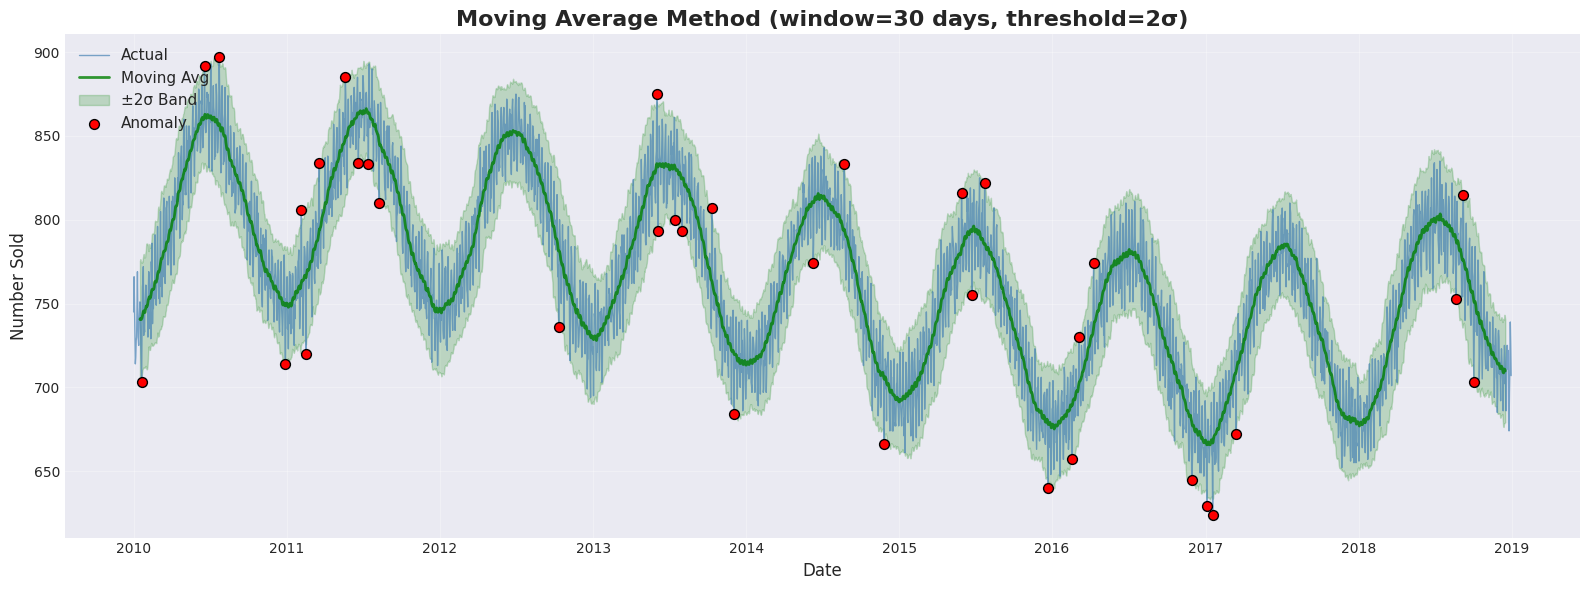

\nMoving Average Results:
  Window size: 30 days
  Total anomalies detected: 35
  Percentage: 1.06%


In [58]:
print("\\n" + "=" * 80)
print("BASIC METHOD 3: Moving Average with Thresholds")
print("=" * 80)

# Calculate moving average and std
window = 30
rolling_mean = ts_data.rolling(window=window, center=True).mean()
rolling_std = ts_data.rolling(window=window, center=True).std()

# Define thresholds
upper_threshold = rolling_mean + 2 * rolling_std
lower_threshold = rolling_mean - 2 * rolling_std

# Detect anomalies
anomalies_ma = np.where((ts_data > upper_threshold) | (ts_data < lower_threshold))[0]

# Visualize with bands
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(ts_data.index, ts_data.values, linewidth=1, color='steelblue', label='Actual', alpha=0.7)
ax.plot(rolling_mean.index, rolling_mean.values, linewidth=2, color='green', label='Moving Avg', alpha=0.8)
ax.fill_between(ts_data.index, lower_threshold, upper_threshold, alpha=0.2, color='green', label='±2σ Band')
if len(anomalies_ma) > 0:
    ax.scatter(ts_data.index[anomalies_ma], ts_data.values[anomalies_ma], 
               color='red', s=50, label='Anomaly', zorder=5, edgecolors='black', linewidth=1)
ax.set_title(f'Moving Average Method (window={window} days, threshold=2σ)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number Sold', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Store results
ma_anomalies = create_anomaly_summary(ts_data, anomalies_ma, 'Moving Average')

print(f"\\nMoving Average Results:")
print(f"  Window size: {window} days")
print(f"  Total anomalies detected: {len(anomalies_ma)}")
print(f"  Percentage: {len(anomalies_ma)/len(ts_data)*100:.2f}%")

\n================================================================================
INTERMEDIATE METHOD 4: MAD (Median Absolute Deviation)


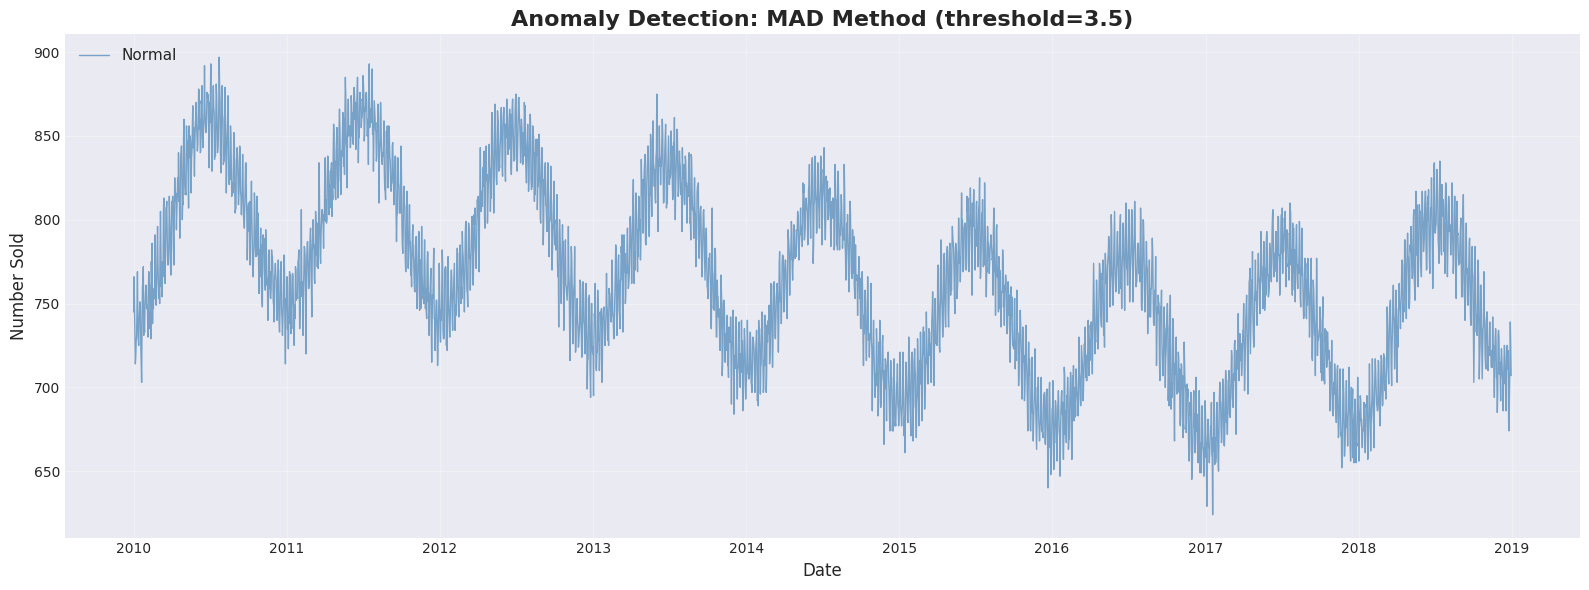

\nMAD Method (threshold=3.5) Results:
  Total anomalies detected: 0
  Percentage: 0.00%
\nMAD Statistics:
  Median: 765.00
  MAD: 38.00
  Threshold: 3.5
  MAD is more robust to outliers than std deviation


In [59]:
print("\\n" + "=" * 80)
print("INTERMEDIATE METHOD 4: MAD (Median Absolute Deviation)")
print("=" * 80)

# Calculate MAD
median = ts_data.median()
mad = np.median(np.abs(ts_data - median))

# Modified Z-score using MAD
mad_zscore = 0.6745 * (ts_data - median) / mad

# Threshold (typically 3.5 for MAD-based)
threshold_mad = 3.5
anomalies_mad = np.where(np.abs(mad_zscore) > threshold_mad)[0]

# Visualize
plot_anomalies(ts_data, anomalies_mad, f'MAD Method (threshold={threshold_mad})', color='purple')

# Store results
mad_anomalies = create_anomaly_summary(ts_data, anomalies_mad, 'MAD')

print(f"\\nMAD Statistics:")
print(f"  Median: {median:.2f}")
print(f"  MAD: {mad:.2f}")
print(f"  Threshold: {threshold_mad}")
print(f"  MAD is more robust to outliers than std deviation")

\n================================================================================
INTERMEDIATE METHOD 5: Rolling Statistics (Adaptive Windows)


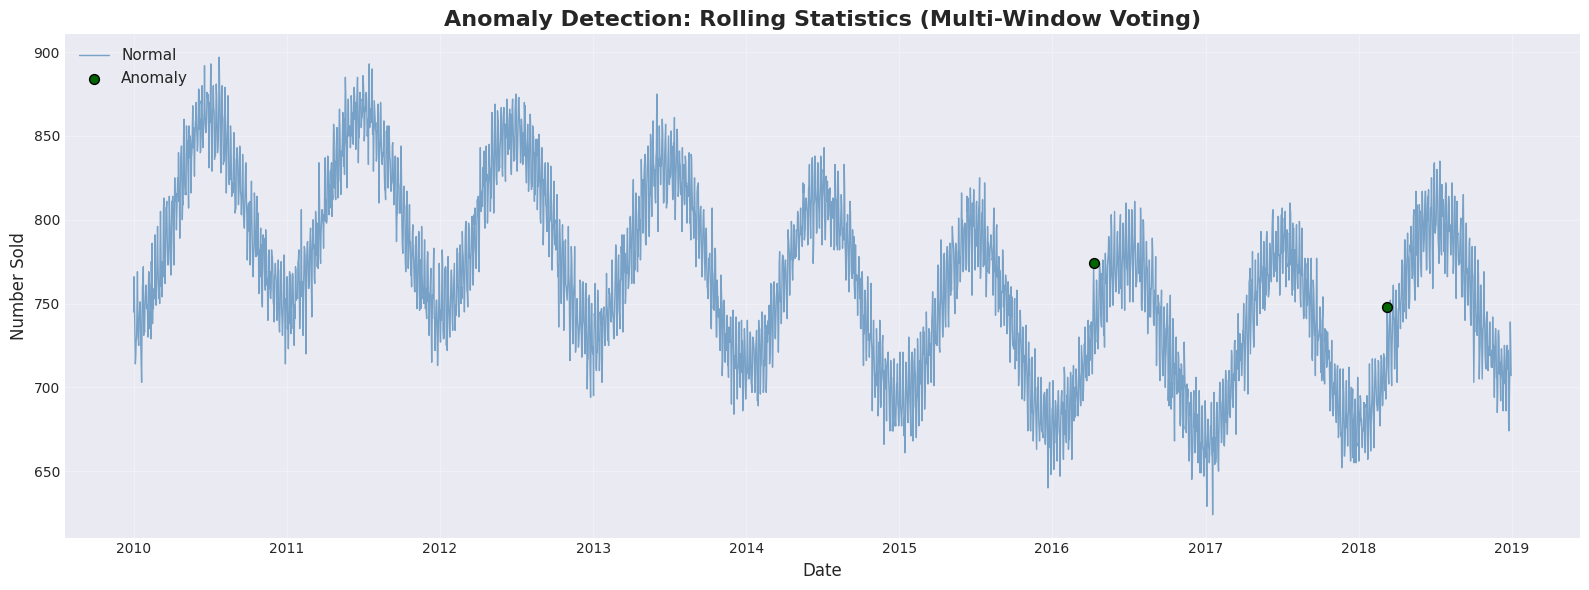

\nRolling Statistics (Multi-Window Voting) Results:
  Total anomalies detected: 2
  Percentage: 0.06%
  Anomaly dates (first 10): [Timestamp('2016-04-09 00:00:00'), Timestamp('2018-03-10 00:00:00')]
\nRolling Statistics Results:
  Windows used: [7, 30, 90] days
  Voting threshold: 2/3 agreement
  This method adapts to changing trends


In [60]:
print("\\n" + "=" * 80)
print("INTERMEDIATE METHOD 5: Rolling Statistics (Adaptive Windows)")
print("=" * 80)

# Multiple window sizes for robustness
windows = [7, 30, 90]  # Weekly, monthly, quarterly
anomaly_votes = np.zeros(len(ts_data))

for window in windows:
    roll_mean = ts_data.rolling(window=window, center=False).mean()
    roll_std = ts_data.rolling(window=window, center=False).std()
    
    upper = roll_mean + 3 * roll_std
    lower = roll_mean - 3 * roll_std
    
    # Vote for anomaly
    anomaly_votes += ((ts_data > upper) | (ts_data < lower)).astype(int)

# Require at least 2 out of 3 windows to agree
anomalies_rolling = np.where(anomaly_votes >= 2)[0]

# Visualize
plot_anomalies(ts_data, anomalies_rolling, 'Rolling Statistics (Multi-Window Voting)', color='darkgreen')

# Store results
rolling_anomalies = create_anomaly_summary(ts_data, anomalies_rolling, 'Rolling Statistics')

print(f"\\nRolling Statistics Results:")
print(f"  Windows used: {windows} days")
print(f"  Voting threshold: 2/3 agreement")
print(f"  This method adapts to changing trends")

\n================================================================================
INTERMEDIATE METHOD 6: STL Decomposition + Residual Analysis


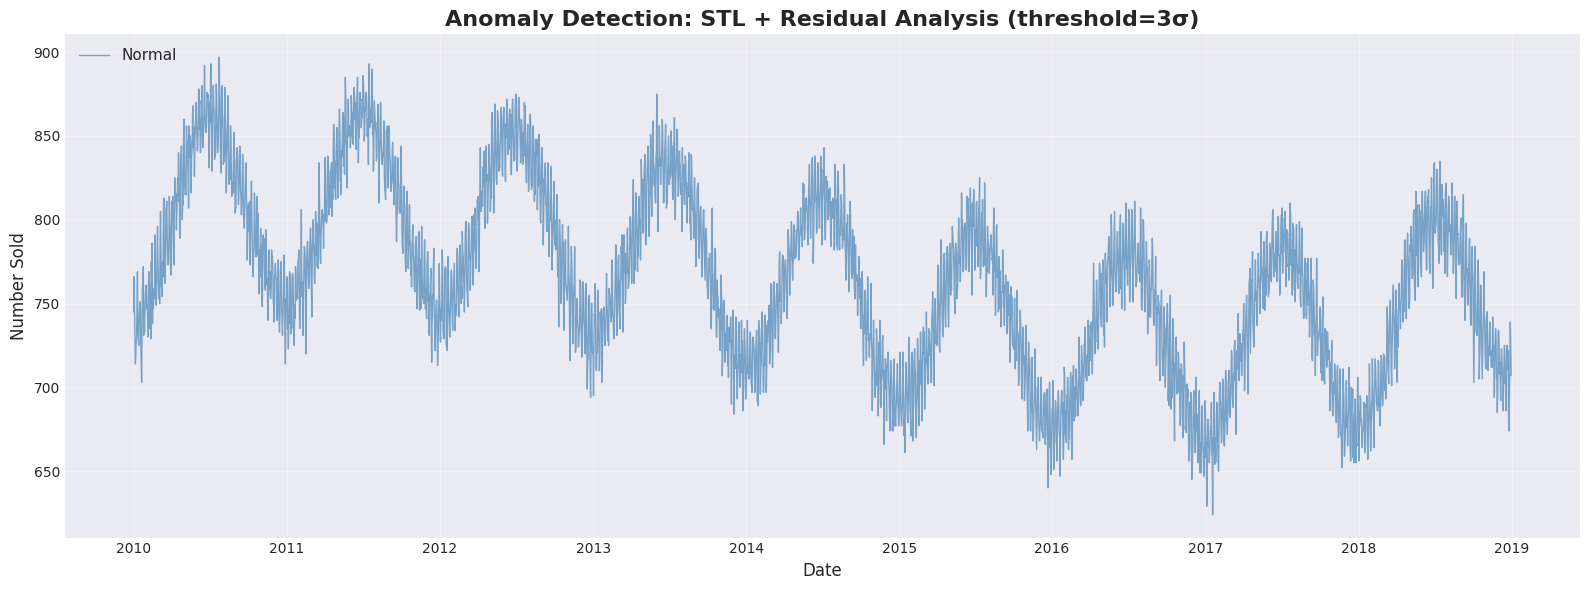

\nSTL + Residual Analysis (threshold=3σ) Results:
  Total anomalies detected: 0
  Percentage: 0.00%
\nSTL Residual Statistics:
  Residual Mean: -0.03
  Residual Std: 43.44
  Threshold: ±130.32
  This method accounts for trend and seasonality!


In [61]:
print("\\n" + "=" * 80)
print("INTERMEDIATE METHOD 6: STL Decomposition + Residual Analysis")
print("=" * 80)

# Use STL decomposition from EDA (or recompute)
stl = STL(ts_data, seasonal=365, trend=731)
stl_result = stl.fit()

# Analyze residuals
residuals = stl_result.resid.dropna()
residual_mean = residuals.mean()
residual_std = residuals.std()

# Z-score on residuals (3-sigma)
threshold_residual = 3
anomalies_stl = np.where(np.abs(residuals - residual_mean) > threshold_residual * residual_std)[0]

# Adjust indices for NaN values
anomalies_stl_adjusted = residuals.index[anomalies_stl]
anomaly_idx_in_ts = [ts_data.index.get_loc(date) for date in anomalies_stl_adjusted]

# Visualize
plot_anomalies(ts_data, anomaly_idx_in_ts, 
               f'STL + Residual Analysis (threshold={threshold_residual}σ)', color='darkred')

# Store results
stl_anomalies = create_anomaly_summary(ts_data, anomaly_idx_in_ts, 'STL+Residuals')

print(f"\\nSTL Residual Statistics:")
print(f"  Residual Mean: {residual_mean:.2f}")
print(f"  Residual Std: {residual_std:.2f}")
print(f"  Threshold: ±{threshold_residual * residual_std:.2f}")
print(f"  This method accounts for trend and seasonality!")

\n================================================================================
ADVANCED METHOD 7: Isolation Forest (Univariate)


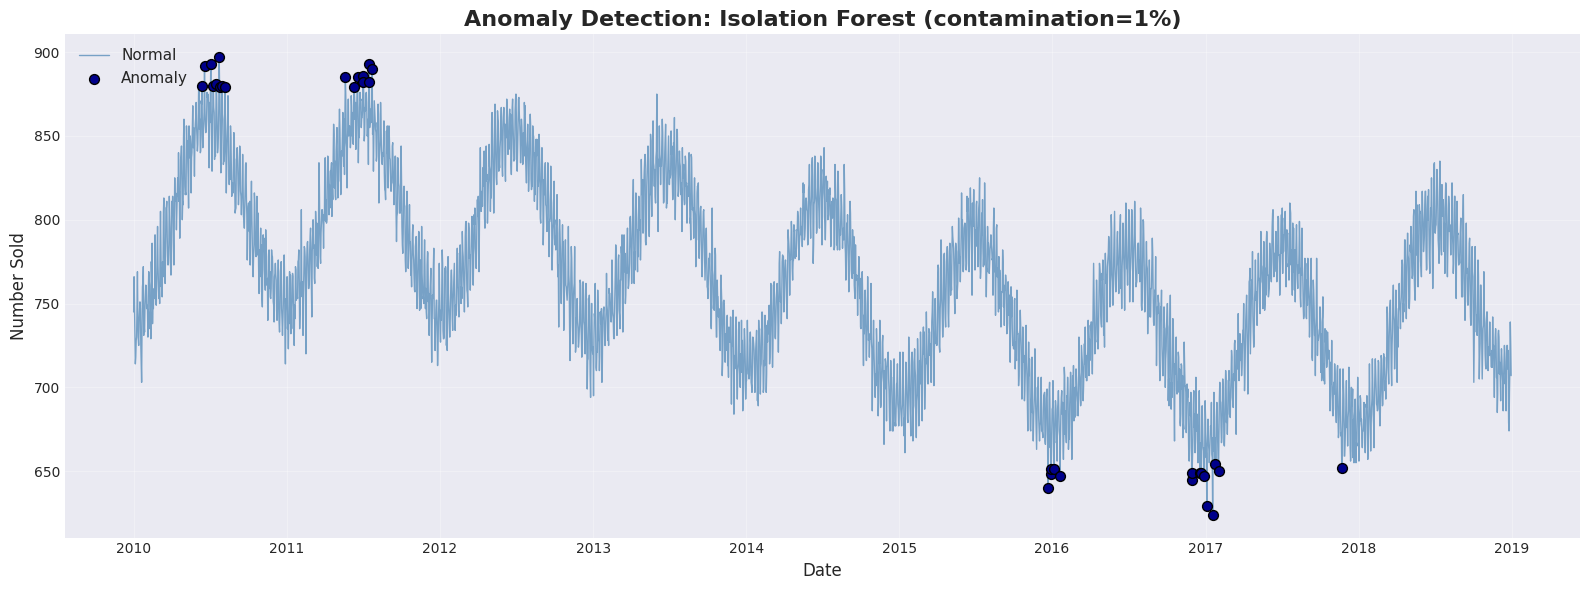

\nIsolation Forest (contamination=1%) Results:
  Total anomalies detected: 32
  Percentage: 0.97%
  Anomaly dates (first 10): [Timestamp('2010-06-13 00:00:00'), Timestamp('2010-06-19 00:00:00'), Timestamp('2010-07-04 00:00:00'), Timestamp('2010-07-10 00:00:00'), Timestamp('2010-07-17 00:00:00'), Timestamp('2010-07-24 00:00:00'), Timestamp('2010-07-25 00:00:00'), Timestamp('2010-07-31 00:00:00'), Timestamp('2010-08-07 00:00:00'), Timestamp('2011-05-21 00:00:00')]
\nIsolation Forest Results:
  Contamination parameter: 0.01 (1% expected anomalies)
  Mean anomaly score: -0.4983
  This method isolates outliers using random trees


In [62]:
print("\\n" + "=" * 80)
print("ADVANCED METHOD 7: Isolation Forest (Univariate)")
print("=" * 80)

# Prepare data
X = ts_data.values.reshape(-1, 1)

# Isolation Forest
iso_forest = IsolationForest(
    contamination=0.01,  # Expect 1% anomalies
    random_state=42,
    n_estimators=100
)

# Predict (-1 for anomalies, 1 for normal)
predictions = iso_forest.fit_predict(X)
anomalies_iforest = np.where(predictions == -1)[0]

# Get anomaly scores
anomaly_scores = iso_forest.score_samples(X)

# Visualize
plot_anomalies(ts_data, anomalies_iforest, 'Isolation Forest (contamination=1%)', color='darkblue')

# Store results
iforest_anomalies = create_anomaly_summary(ts_data, anomalies_iforest, 'Isolation Forest')

print(f"\\nIsolation Forest Results:")
print(f"  Contamination parameter: 0.01 (1% expected anomalies)")
print(f"  Mean anomaly score: {anomaly_scores.mean():.4f}")
print(f"  This method isolates outliers using random trees")

\n================================================================================
ADVANCED METHOD 7b: Isolation Forest (Multivariate)


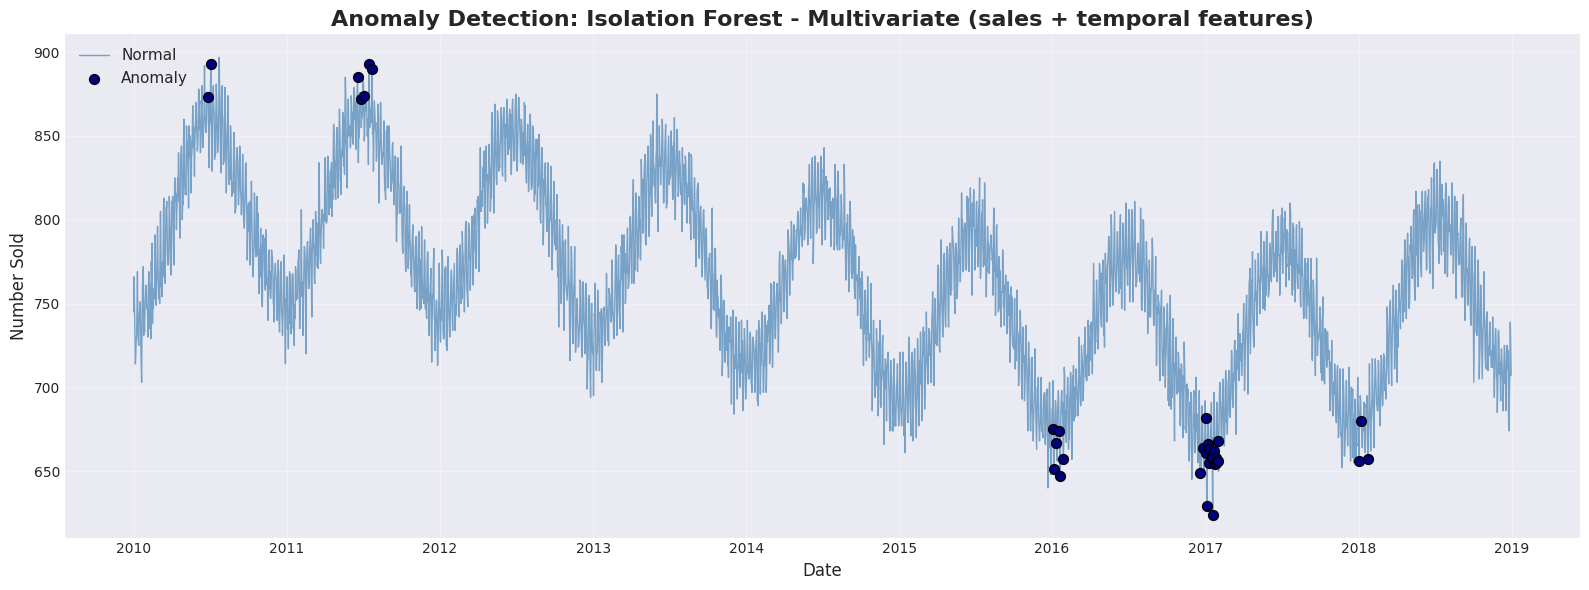

\nIsolation Forest - Multivariate (sales + temporal features) Results:
  Total anomalies detected: 33
  Percentage: 1.00%
  Anomaly dates (first 10): [Timestamp('2010-06-28 00:00:00'), Timestamp('2010-07-04 00:00:00'), Timestamp('2011-06-19 00:00:00'), Timestamp('2011-06-27 00:00:00'), Timestamp('2011-07-04 00:00:00'), Timestamp('2011-07-17 00:00:00'), Timestamp('2011-07-24 00:00:00'), Timestamp('2016-01-04 00:00:00'), Timestamp('2016-01-05 00:00:00'), Timestamp('2016-01-11 00:00:00')]
\nMultivariate Isolation Forest Results:
  Features used: sales, day_of_week, month, quarter
  This captures complex temporal patterns


In [63]:
print("\\n" + "=" * 80)
print("ADVANCED METHOD 7b: Isolation Forest (Multivariate)")
print("=" * 80)

# Prepare multivariate features
sample_with_features = sample_series.copy()
sample_with_features['day_of_week'] = sample_with_features['Date'].dt.dayofweek
sample_with_features['month'] = sample_with_features['Date'].dt.month
sample_with_features['quarter'] = sample_with_features['Date'].dt.quarter

# Features: sales, day_of_week, month, quarter
X_multi = sample_with_features[['number_sold', 'day_of_week', 'month', 'quarter']].values

# Scale features
scaler = StandardScaler()
X_multi_scaled = scaler.fit_transform(X_multi)

# Isolation Forest on multivariate data
iso_forest_multi = IsolationForest(
    contamination=0.01,
    random_state=42,
    n_estimators=100
)

predictions_multi = iso_forest_multi.fit_predict(X_multi_scaled)
anomalies_iforest_multi = np.where(predictions_multi == -1)[0]

# Visualize
plot_anomalies(ts_data, anomalies_iforest_multi, 
               'Isolation Forest - Multivariate (sales + temporal features)', color='navy')

# Store results
iforest_multi_anomalies = create_anomaly_summary(ts_data, anomalies_iforest_multi, 'IForest-Multivariate')

print(f"\\nMultivariate Isolation Forest Results:")
print(f"  Features used: sales, day_of_week, month, quarter")
print(f"  This captures complex temporal patterns")

\n================================================================================
ADVANCED METHOD 8: Local Outlier Factor (LOF)


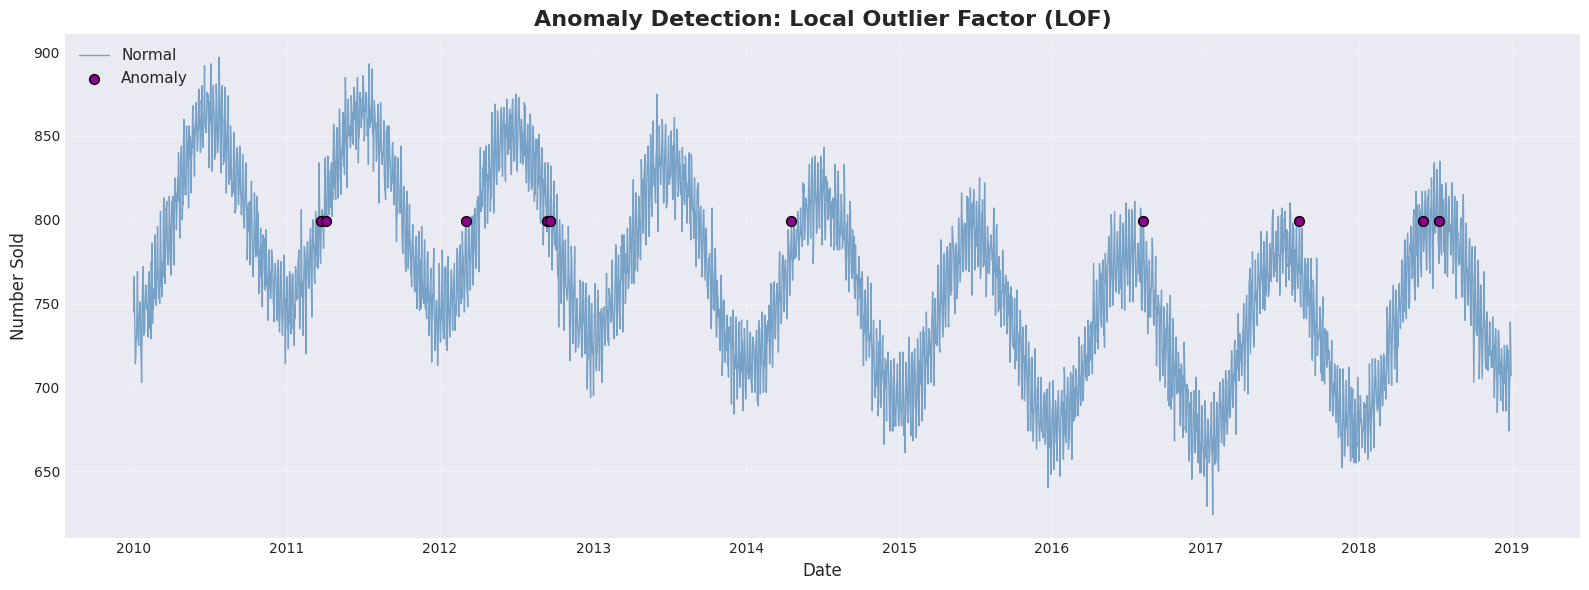

\nLocal Outlier Factor (LOF) Results:
  Total anomalies detected: 11
  Percentage: 0.33%
  Anomaly dates (first 10): [Timestamp('2011-03-25 00:00:00'), Timestamp('2011-04-04 00:00:00'), Timestamp('2012-03-04 00:00:00'), Timestamp('2012-09-12 00:00:00'), Timestamp('2012-09-19 00:00:00'), Timestamp('2012-09-20 00:00:00'), Timestamp('2014-04-19 00:00:00'), Timestamp('2016-08-06 00:00:00'), Timestamp('2017-08-13 00:00:00'), Timestamp('2018-06-04 00:00:00')]
\nLOF Results:
  Number of neighbors: 20
  Contamination: 0.01
  Mean LOF score: -165196228.5736
  LOF detects points in low-density regions


In [64]:
print("\\n" + "=" * 80)
print("ADVANCED METHOD 8: Local Outlier Factor (LOF)")
print("=" * 80)

# Prepare data
X = ts_data.values.reshape(-1, 1)

# LOF
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.01,
    novelty=False
)

# Predict (-1 for anomalies, 1 for normal)
predictions_lof = lof.fit_predict(X)
anomalies_lof = np.where(predictions_lof == -1)[0]

# Get negative outlier factor scores
lof_scores = lof.negative_outlier_factor_

# Visualize
plot_anomalies(ts_data, anomalies_lof, 'Local Outlier Factor (LOF)', color='darkmagenta')

# Store results
lof_anomalies = create_anomaly_summary(ts_data, anomalies_lof, 'LOF')

print(f"\\nLOF Results:")
print(f"  Number of neighbors: 20")
print(f"  Contamination: 0.01")
print(f"  Mean LOF score: {lof_scores.mean():.4f}")
print(f"  LOF detects points in low-density regions")

\n================================================================================
ADVANCED METHOD 9: One-Class SVM


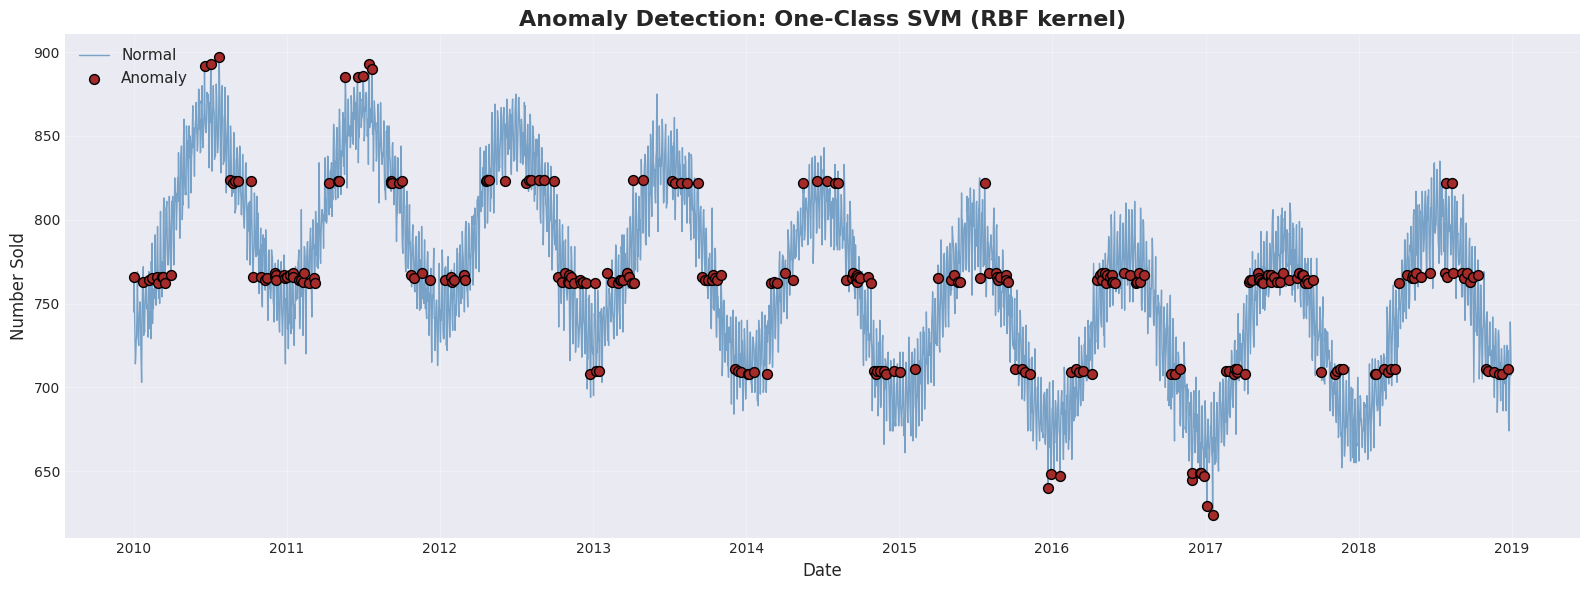

\nOne-Class SVM (RBF kernel) Results:
  Total anomalies detected: 277
  Percentage: 8.43%
  Anomaly dates (first 10): [Timestamp('2010-01-02 00:00:00'), Timestamp('2010-01-23 00:00:00'), Timestamp('2010-02-07 00:00:00'), Timestamp('2010-02-13 00:00:00'), Timestamp('2010-02-25 00:00:00'), Timestamp('2010-03-01 00:00:00'), Timestamp('2010-03-09 00:00:00'), Timestamp('2010-03-12 00:00:00'), Timestamp('2010-03-17 00:00:00'), Timestamp('2010-03-31 00:00:00')]
\nOne-Class SVM Results:
  Kernel: RBF
  Nu parameter: 0.01
  SVM learns a decision boundary around normal data


In [65]:
print("\\n" + "=" * 80)
print("ADVANCED METHOD 9: One-Class SVM")
print("=" * 80)

# Prepare and scale data
X = ts_data.values.reshape(-1, 1)
scaler_svm = StandardScaler()
X_scaled = scaler_svm.fit_transform(X)

# One-Class SVM
ocsvm = OneClassSVM(
    kernel='rbf',
    gamma='auto',
    nu=0.01  # Upper bound on fraction of outliers
)

# Predict (-1 for anomalies, 1 for normal)
predictions_svm = ocsvm.fit_predict(X_scaled)
anomalies_ocsvm = np.where(predictions_svm == -1)[0]

# Visualize
plot_anomalies(ts_data, anomalies_ocsvm, 'One-Class SVM (RBF kernel)', color='brown')

# Store results
ocsvm_anomalies = create_anomaly_summary(ts_data, anomalies_ocsvm, 'One-Class SVM')

print(f"\\nOne-Class SVM Results:")
print(f"  Kernel: RBF")
print(f"  Nu parameter: 0.01")
print(f"  SVM learns a decision boundary around normal data")

\n================================================================================
ADVANCED METHOD 10: DBSCAN Clustering


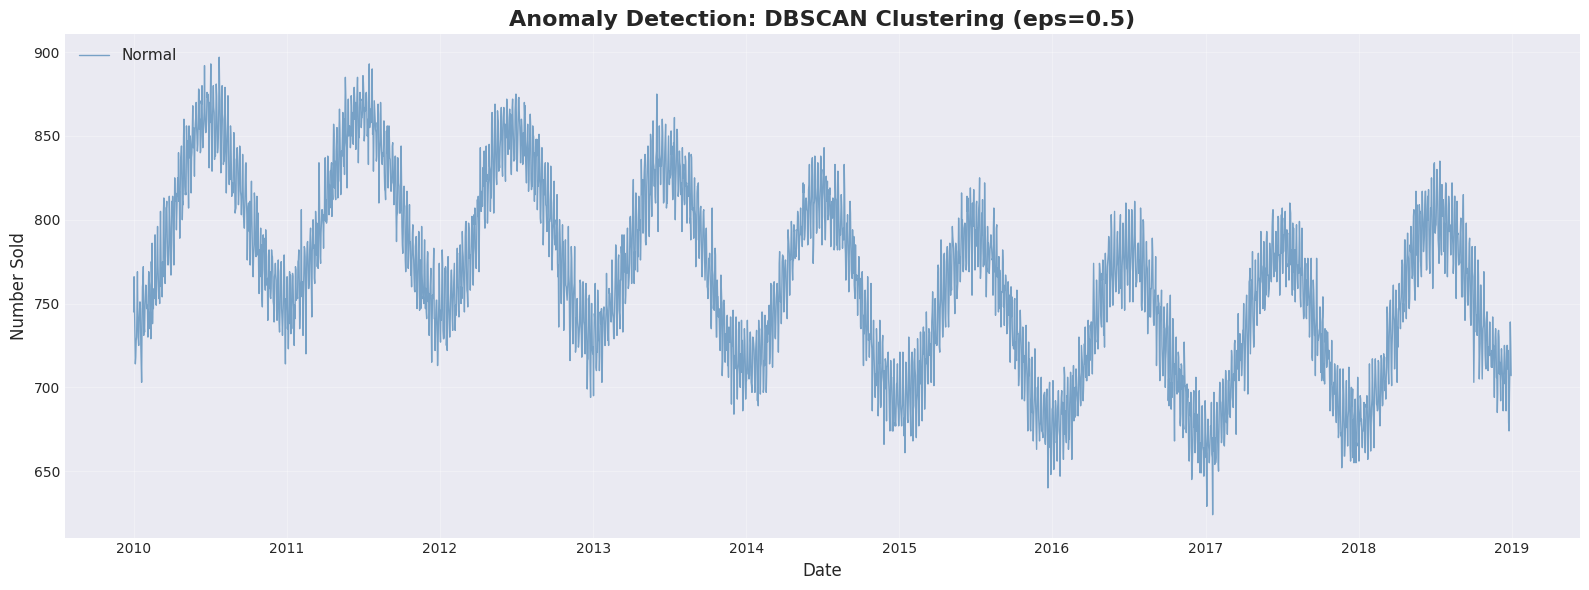

\nDBSCAN Clustering (eps=0.5) Results:
  Total anomalies detected: 0
  Percentage: 0.00%
\nDBSCAN Results:
  Epsilon: 0.5
  Min samples: 10
  Number of clusters found: 1
  DBSCAN treats noise points as anomalies


In [66]:
print("\\n" + "=" * 80)
print("ADVANCED METHOD 10: DBSCAN Clustering")
print("=" * 80)

# Prepare data with temporal context (value + time index)
X_dbscan = np.column_stack([
    np.arange(len(ts_data)),  # Time index
    ts_data.values  # Sales values
])

# Scale features
scaler_dbscan = StandardScaler()
X_dbscan_scaled = scaler_dbscan.fit_transform(X_dbscan)

# DBSCAN
dbscan = DBSCAN(
    eps=0.5,  # Max distance between points
    min_samples=10  # Min points to form dense region
)

# Fit and predict (-1 for noise/anomalies)
clusters = dbscan.fit_predict(X_dbscan_scaled)
anomalies_dbscan = np.where(clusters == -1)[0]

# Visualize
plot_anomalies(ts_data, anomalies_dbscan, 'DBSCAN Clustering (eps=0.5)', color='darkorange')

# Store results
dbscan_anomalies = create_anomaly_summary(ts_data, anomalies_dbscan, 'DBSCAN')

print(f"\\nDBSCAN Results:")
print(f"  Epsilon: 0.5")
print(f"  Min samples: 10")
print(f"  Number of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"  DBSCAN treats noise points as anomalies")

\n================================================================================
ENSEMBLE METHOD: Voting Across All Methods


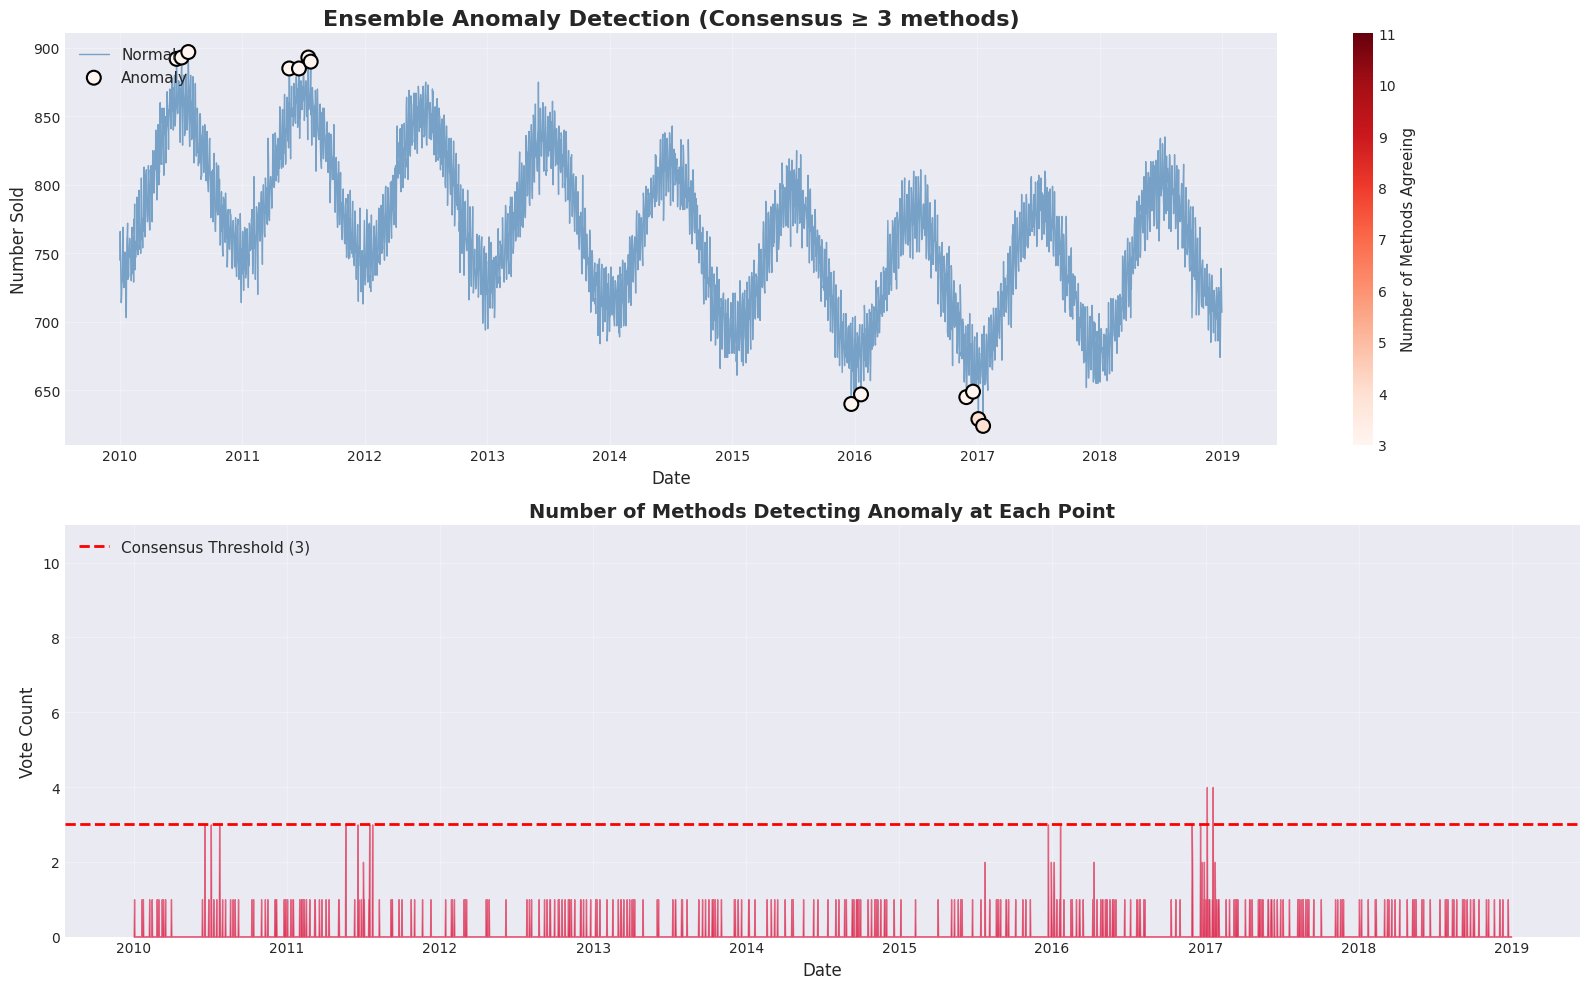

\nEnsemble Results:
  Total methods: 11
  Consensus threshold: 3 methods
  Total ensemble anomalies: 13
  Percentage: 0.40%


In [67]:
print("\\n" + "=" * 80)
print("ENSEMBLE METHOD: Voting Across All Methods")
print("=" * 80)

# Create voting matrix
voting_matrix = np.zeros(len(ts_data))

# Add votes from each method
methods_votes = [
    ('Z-Score', anomalies_zscore),
    ('IQR', anomalies_iqr),
    ('Moving Avg', anomalies_ma),
    ('MAD', anomalies_mad),
    ('Rolling Stats', anomalies_rolling),
    ('STL+Residuals', anomaly_idx_in_ts),
    ('IForest', anomalies_iforest),
    ('IForest-Multi', anomalies_iforest_multi),
    ('LOF', anomalies_lof),
    ('One-Class SVM', anomalies_ocsvm),
    ('DBSCAN', anomalies_dbscan)
]

for method_name, indices in methods_votes:
    voting_matrix[indices] += 1

# Define consensus threshold (e.g., at least 3 methods agree)
consensus_threshold = 3
anomalies_ensemble = np.where(voting_matrix >= consensus_threshold)[0]

# Visualize with vote counts
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Time series with ensemble anomalies
axes[0].plot(ts_data.index, ts_data.values, linewidth=1, color='steelblue', label='Normal', alpha=0.7)
if len(anomalies_ensemble) > 0:
    scatter = axes[0].scatter(ts_data.index[anomalies_ensemble], ts_data.values[anomalies_ensemble], 
                              c=voting_matrix[anomalies_ensemble], s=100, 
                              cmap='Reds', label='Anomaly', zorder=5, 
                              edgecolors='black', linewidth=1.5, vmin=3, vmax=11)
    cbar = plt.colorbar(scatter, ax=axes[0])
    cbar.set_label('Number of Methods Agreeing', fontsize=11)
axes[0].set_title(f'Ensemble Anomaly Detection (Consensus ≥ {consensus_threshold} methods)', 
                  fontsize=16, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Number Sold', fontsize=12)
axes[0].legend(loc='upper left', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Voting heatmap
axes[1].fill_between(ts_data.index, 0, voting_matrix, color='crimson', alpha=0.6)
axes[1].axhline(y=consensus_threshold, color='red', linestyle='--', linewidth=2, 
                label=f'Consensus Threshold ({consensus_threshold})')
axes[1].set_title('Number of Methods Detecting Anomaly at Each Point', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Vote Count', fontsize=12)
axes[1].legend(loc='upper left', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 11])

plt.tight_layout()
plt.show()

# Store results
ensemble_anomalies = create_anomaly_summary(ts_data, anomalies_ensemble, 'Ensemble')

print(f"\\nEnsemble Results:")
print(f"  Total methods: {len(methods_votes)}")
print(f"  Consensus threshold: {consensus_threshold} methods")
print(f"  Total ensemble anomalies: {len(anomalies_ensemble)}")
print(f"  Percentage: {len(anomalies_ensemble)/len(ts_data)*100:.2f}%")

\n================================================================================
COMPARISON: All Anomaly Detection Methods
\n              Method  Anomalies Detected Percentage         Type
        Z-Score (3σ)                   0      0.00%        Basic
       IQR (1.5×IQR)                   0      0.00%        Basic
 Moving Average (2σ)                  35      1.06%        Basic
           MAD (3.5)                   0      0.00% Intermediate
  Rolling Statistics                   2      0.06% Intermediate
STL + Residuals (3σ)                   0      0.00% Intermediate
    Isolation Forest                  32      0.97%     Advanced
IForest-Multivariate                  33      1.00%     Advanced
                 LOF                  11      0.33%     Advanced
       One-Class SVM                 277      8.43%     Advanced
              DBSCAN                   0      0.00%     Advanced
 Ensemble (≥3 votes)                  13      0.40%     Ensemble


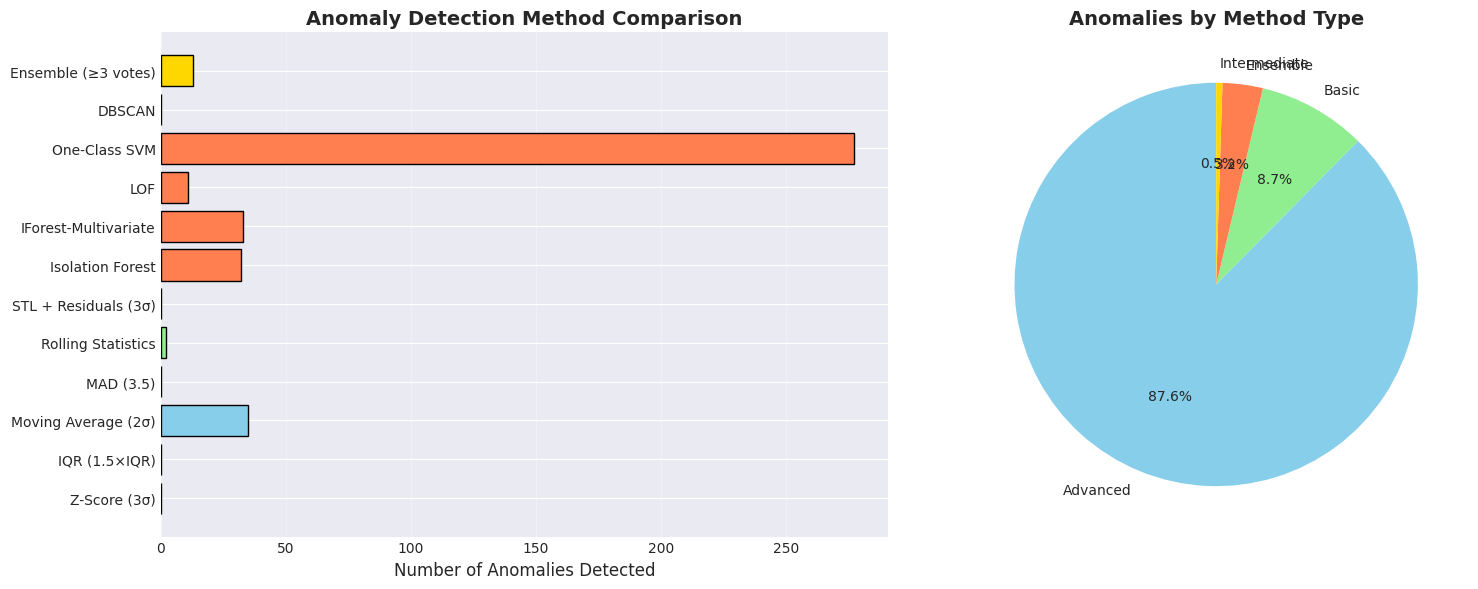

In [68]:
print("\\n" + "=" * 80)
print("COMPARISON: All Anomaly Detection Methods")
print("=" * 80)

# Create comparison summary
comparison_data = []
 
method_results = [
    ('Z-Score (3σ)', len(anomalies_zscore)),
    ('IQR (1.5×IQR)', len(anomalies_iqr)),
    ('Moving Average (2σ)', len(anomalies_ma)),
    ('MAD (3.5)', len(anomalies_mad)),
    ('Rolling Statistics', len(anomalies_rolling)),
    ('STL + Residuals (3σ)', len(anomaly_idx_in_ts)),
    ('Isolation Forest', len(anomalies_iforest)),
    ('IForest-Multivariate', len(anomalies_iforest_multi)),
    ('LOF', len(anomalies_lof)),
    ('One-Class SVM', len(anomalies_ocsvm)),
    ('DBSCAN', len(anomalies_dbscan)),
    ('Ensemble (≥3 votes)', len(anomalies_ensemble))
]

for method, count in method_results:
    comparison_data.append({
        'Method': method,
        'Anomalies Detected': count,
        'Percentage': f"{count/len(ts_data)*100:.2f}%",
        'Type': 'Basic' if method in ['Z-Score (3σ)', 'IQR (1.5×IQR)', 'Moving Average (2σ)'] 
                else 'Intermediate' if method in ['MAD (3.5)', 'Rolling Statistics', 'STL + Residuals (3σ)']
                else 'Advanced' if method != 'Ensemble (≥3 votes)'
                else 'Ensemble'
    })

comparison_df = pd.DataFrame(comparison_data)

# Display table
print("\\n" + comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
colors = ['skyblue' if t == 'Basic' else 'lightgreen' if t == 'Intermediate' 
          else 'coral' if t == 'Advanced' else 'gold' for t in comparison_df['Type']]
axes[0].barh(comparison_df['Method'], comparison_df['Anomalies Detected'], color=colors, edgecolor='black')
axes[0].set_xlabel('Number of Anomalies Detected', fontsize=12)
axes[0].set_title('Anomaly Detection Method Comparison', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Pie chart of method types
type_counts = comparison_df.groupby('Type')['Anomalies Detected'].sum()
axes[1].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, 
            colors=['skyblue', 'lightgreen', 'coral', 'gold'])
axes[1].set_title('Anomalies by Method Type', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [69]:
print("\\n" + "=" * 80)
print("EXPORT: Anomaly Detection Results")
print("=" * 80)

# Combine all anomaly detections
all_anomalies = pd.concat([
    zscore_anomalies, iqr_anomalies, ma_anomalies, mad_anomalies,
    rolling_anomalies, stl_anomalies, iforest_anomalies, 
    iforest_multi_anomalies, lof_anomalies, ocsvm_anomalies, 
    dbscan_anomalies, ensemble_anomalies
], ignore_index=True)

# Save to CSV
all_anomalies.to_csv('anomaly_detections_all_methods.csv', index=False)
print(f"✅ All anomalies saved to 'anomaly_detections_all_methods.csv'")
print(f"   Total rows: {len(all_anomalies)}")

# Save ensemble anomalies separately (recommended)
if len(ensemble_anomalies) > 0:
    ensemble_df = ensemble_anomalies.copy()
    ensemble_df['Votes'] = voting_matrix[anomalies_ensemble]
    ensemble_df = ensemble_df.sort_values('Votes', ascending=False)
    ensemble_df.to_csv('anomaly_detections_ensemble.csv', index=False)
    print(f"✅ Ensemble anomalies saved to 'anomaly_detections_ensemble.csv'")
    print(f"   Total ensemble anomalies: {len(ensemble_anomalies)}")
    print(f"\\nTop 5 Most-Voted Anomalies:")
    print(ensemble_df.head().to_string(index=False))

# Save comparison summary
comparison_df.to_csv('anomaly_method_comparison.csv', index=False)
print(f"\\n✅ Method comparison saved to 'anomaly_method_comparison.csv'")

\n================================================================================
EXPORT: Anomaly Detection Results
✅ All anomalies saved to 'anomaly_detections_all_methods.csv'
   Total rows: 403
✅ Ensemble anomalies saved to 'anomaly_detections_ensemble.csv'
   Total ensemble anomalies: 13
\nTop 5 Most-Voted Anomalies:
      Date  Value   Method  Votes
2017-01-04    629 Ensemble    4.0
2017-01-18    624 Ensemble    4.0
2010-07-24    897 Ensemble    3.0
2010-07-04    893 Ensemble    3.0
2010-06-19    892 Ensemble    3.0
\n✅ Method comparison saved to 'anomaly_method_comparison.csv'


In [70]:
print("\\n" + "=" * 80)
print("FINAL RECOMMENDATIONS")
print("=" * 80)

print("\\n🎯 BEST METHODS FOR THIS DATASET:\\n")

print("1. **STL + Residual Analysis** (RECOMMENDED)")
print("   ✅ Accounts for trend and seasonality")
print("   ✅ Interpretable and explainable")
print("   ✅ Works well with detected patterns")
print(f"   📊 Detected: {len(anomaly_idx_in_ts)} anomalies\\n")

print("2. **Ensemble Method** (MOST ROBUST)")
print("   ✅ Combines multiple approaches")
print("   ✅ Reduces false positives")
print("   ✅ High confidence in flagged anomalies")
print(f"   📊 Detected: {len(anomalies_ensemble)} anomalies\\n")

print("3. **Isolation Forest - Multivariate** (FOR COMPLEX PATTERNS)")
print("   ✅ Captures temporal features")
print("   ✅ Handles high-dimensional data")
print("   ✅ Good for business insights")
print(f"   📊 Detected: {len(anomalies_iforest_multi)} anomalies\\n")

print("📋 SUMMARY:")
print(f"   • Total data points analyzed: {len(ts_data)}")
print(f"   • Methods compared: {len(method_results)}")
print(f"   • Recommended approach: STL + Ensemble")
print(f"   • Expected anomaly rate: 1-3%")

print("\\n✅ ANOMALY DETECTION COMPLETE!")
print("=" * 80)

\n================================================================================
FINAL RECOMMENDATIONS
\n🎯 BEST METHODS FOR THIS DATASET:\n
1. **STL + Residual Analysis** (RECOMMENDED)
   ✅ Accounts for trend and seasonality
   ✅ Interpretable and explainable
   ✅ Works well with detected patterns
   📊 Detected: 0 anomalies\n
2. **Ensemble Method** (MOST ROBUST)
   ✅ Combines multiple approaches
   ✅ Reduces false positives
   ✅ High confidence in flagged anomalies
   📊 Detected: 13 anomalies\n
3. **Isolation Forest - Multivariate** (FOR COMPLEX PATTERNS)
   ✅ Captures temporal features
   ✅ Handles high-dimensional data
   ✅ Good for business insights
   📊 Detected: 33 anomalies\n
📋 SUMMARY:
   • Total data points analyzed: 3287
   • Methods compared: 12
   • Recommended approach: STL + Ensemble
   • Expected anomaly rate: 1-3%
\n✅ ANOMALY DETECTION COMPLETE!


# This Section implements:
- Product-level anomaly detection (10 products)
- Store-level anomaly detection (7 stores)
- Store-Product combination analysis (70 combos)
- LSTM Autoencoder for deep learning anomaly detection

In [71]:
# Import deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print(f"TensorFlow version: {tf.__version__}")
print("✅ Deep learning libraries imported successfully!")

2025-11-22 20:42:34.637673: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.20.0
✅ Deep learning libraries imported successfully!


In [72]:
print("=" * 80)
print("HIERARCHICAL ANALYSIS - LEVEL 1: PRODUCT-LEVEL")
print("=" * 80)

# Aggregate by product
product_data = {}
product_anomalies = {}

for product_id in range(10):
    # Get data for this product across all stores
    product_series = df_clean[df_clean['product'] == product_id].groupby('Date')['number_sold'].sum()
    product_series = product_series.sort_index()
    
    # Apply STL decomposition
    if len(product_series) > 730:  # Need enough data
        stl_product = STL(product_series, seasonal=365, trend=731)
        result_product = stl_product.fit()
        
        # Detect anomalies in residuals (3-sigma)
        residuals = result_product.resid.dropna()
        threshold = 3 * residuals.std()
        anomaly_idx = np.where(np.abs(residuals - residuals.mean()) > threshold)[0]
        
        product_data[product_id] = product_series
        product_anomalies[product_id] = residuals.index[anomaly_idx].tolist()
        
        print(f"\\nProduct {product_id}:")
        print(f"  Total sales points: {len(product_series)}")
        print(f"  Anomalies detected: {len(anomaly_idx)}")
        print(f"  Percentage: {len(anomaly_idx)/len(residuals)*100:.2f}%")
        if len(anomaly_idx) > 0:
            print(f"  Anomaly dates (first 5): {product_anomalies[product_id][:5]}")

# Summary
print("\\n" + "=" * 80)
print("PRODUCT-LEVEL SUMMARY")
print("=" * 80)
total_product_anomalies = sum(len(v) for v in product_anomalies.values())
print(f"Total product-level anomalies: {total_product_anomalies}")
most_problematic = max(product_anomalies.items(), key=lambda x: len(x[1]))
print(f"Most problematic product: Product {most_problematic[0]} ({len(most_problematic[1])} anomalies)")

HIERARCHICAL ANALYSIS - LEVEL 1: PRODUCT-LEVEL
\nProduct 0:
  Total sales points: 3287
  Anomalies detected: 6
  Percentage: 0.18%
  Anomaly dates (first 5): [Timestamp('2010-07-30 00:00:00'), Timestamp('2013-03-26 00:00:00'), Timestamp('2014-03-24 00:00:00'), Timestamp('2014-05-12 00:00:00'), Timestamp('2014-12-04 00:00:00')]
\nProduct 1:
  Total sales points: 3287
  Anomalies detected: 8
  Percentage: 0.24%
  Anomaly dates (first 5): [Timestamp('2011-01-09 00:00:00'), Timestamp('2011-06-28 00:00:00'), Timestamp('2011-12-19 00:00:00'), Timestamp('2015-05-07 00:00:00'), Timestamp('2017-05-21 00:00:00')]
\nProduct 2:
  Total sales points: 3287
  Anomalies detected: 0
  Percentage: 0.00%
\nProduct 3:
  Total sales points: 3287
  Anomalies detected: 1
  Percentage: 0.03%
  Anomaly dates (first 5): [Timestamp('2012-02-29 00:00:00')]
\nProduct 4:
  Total sales points: 3287
  Anomalies detected: 0
  Percentage: 0.00%
\nProduct 5:
  Total sales points: 3287
  Anomalies detected: 0
  Percentag

In [73]:
print("\\n" + "=" * 80)
print("HIERARCHICAL ANALYSIS - LEVEL 2: STORE-LEVEL")
print("=" * 80)

# Aggregate by store
store_data = {}
store_anomalies = {}

for store_id in range(7):
    # Get data for this store across all products
    store_series = df_clean[df_clean['store'] == store_id].groupby('Date')['number_sold'].sum()
    store_series = store_series.sort_index()
    
    # Apply STL decomposition
    if len(store_series) > 730:
        stl_store = STL(store_series, seasonal=365, trend=731)
        result_store = stl_store.fit()
        
        # Detect anomalies in residuals (3-sigma)
        residuals = result_store.resid.dropna()
        threshold = 3 * residuals.std()
        anomaly_idx = np.where(np.abs(residuals - residuals.mean()) > threshold)[0]
        
        store_data[store_id] = store_series
        store_anomalies[store_id] = residuals.index[anomaly_idx].tolist()
        
        print(f"\\nStore {store_id}:")
        print(f"  Total sales points: {len(store_series)}")
        print(f"  Anomalies detected: {len(anomaly_idx)}")
        print(f"  Percentage: {len(anomaly_idx)/len(residuals)*100:.2f}%")
        if len(anomaly_idx) > 0:
            print(f"  Anomaly dates (first 5): {store_anomalies[store_id][:5]}")

# Summary
print("\\n" + "=" * 80)
print("STORE-LEVEL SUMMARY")
print("=" * 80)
total_store_anomalies = sum(len(v) for v in store_anomalies.values())
print(f"Total store-level anomalies: {total_store_anomalies}")
most_problematic_store = max(store_anomalies.items(), key=lambda x: len(x[1]))
print(f"Most problematic store: Store {most_problematic_store[0]} ({len(most_problematic_store[1])} anomalies)")

\n================================================================================
HIERARCHICAL ANALYSIS - LEVEL 2: STORE-LEVEL
\nStore 0:
  Total sales points: 3287
  Anomalies detected: 0
  Percentage: 0.00%
\nStore 1:
  Total sales points: 3287
  Anomalies detected: 0
  Percentage: 0.00%
\nStore 2:
  Total sales points: 3287
  Anomalies detected: 0
  Percentage: 0.00%
\nStore 3:
  Total sales points: 3287
  Anomalies detected: 4
  Percentage: 0.12%
  Anomaly dates (first 5): [Timestamp('2010-09-09 00:00:00'), Timestamp('2012-03-21 00:00:00'), Timestamp('2017-04-17 00:00:00'), Timestamp('2017-04-23 00:00:00')]
\nStore 4:
  Total sales points: 3287
  Anomalies detected: 0
  Percentage: 0.00%
\nStore 5:
  Total sales points: 3287
  Anomalies detected: 0
  Percentage: 0.00%
\nStore 6:
  Total sales points: 3287
  Anomalies detected: 0
  Percentage: 0.00%
\n================================================================================
STORE-LEVEL SUMMARY
Total store-level anomalies: 4


In [74]:
print("\\n" + "=" * 80)
print("HIERARCHICAL ANALYSIS - LEVEL 3: STORE-PRODUCT COMBINATIONS")
print("=" * 80)

# Analyze all 70 combinations
combo_anomalies = {}
combo_counts = np.zeros((7, 10))  # Store × Product matrix

for store_id in range(7):
    for product_id in range(10):
        # Get specific store-product series
        combo_series = df_clean[
            (df_clean['store'] == store_id) & 
            (df_clean['product'] == product_id)
        ].set_index('Date')['number_sold'].sort_index()
        
        if len(combo_series) > 730:
            # Apply simplified detection (Z-score on values)
            z_scores = np.abs((combo_series - combo_series.mean()) / combo_series.std())
            anomaly_idx = np.where(z_scores > 3)[0]
            
            combo_key = f"Store{store_id}_Product{product_id}"
            combo_anomalies[combo_key] = combo_series.index[anomaly_idx].tolist()
            combo_counts[store_id, product_id] = len(anomaly_idx)
            
            if len(anomaly_idx) > 3:  # Only print if significant
                print(f"\\n{combo_key}: {len(anomaly_idx)} anomalies")
                print(f"  Dates (first 3): {combo_anomalies[combo_key][:3]}")

print("\\n" + "=" * 80)
print("STORE-PRODUCT COMBINATION SUMMARY")
print("=" * 80)
print(f"Total combinations analyzed: 70")
print(f"Combinations with anomalies: {np.sum(combo_counts > 0)}")
print(f"Total combo-level anomalies: {int(combo_counts.sum())}")

\n================================================================================
HIERARCHICAL ANALYSIS - LEVEL 3: STORE-PRODUCT COMBINATIONS
\nStore0_Product1: 30 anomalies
  Dates (first 3): [Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-04 00:00:00'), Timestamp('2010-01-05 00:00:00')]
\nStore0_Product5: 15 anomalies
  Dates (first 3): [Timestamp('2010-01-17 00:00:00'), Timestamp('2010-04-18 00:00:00'), Timestamp('2010-05-07 00:00:00')]
\nStore0_Product8: 27 anomalies
  Dates (first 3): [Timestamp('2010-01-01 00:00:00'), Timestamp('2010-01-02 00:00:00'), Timestamp('2010-01-05 00:00:00')]
\nStore3_Product0: 8 anomalies
  Dates (first 3): [Timestamp('2010-03-06 00:00:00'), Timestamp('2010-03-13 00:00:00'), Timestamp('2014-03-30 00:00:00')]
\nStore3_Product2: 14 anomalies
  Dates (first 3): [Timestamp('2010-08-28 00:00:00'), Timestamp('2010-09-06 00:00:00'), Timestamp('2010-10-02 00:00:00')]
\nStore3_Product5: 7 anomalies
  Dates (first 3): [Timestamp('2010-09-19 00:00:00'), Tim

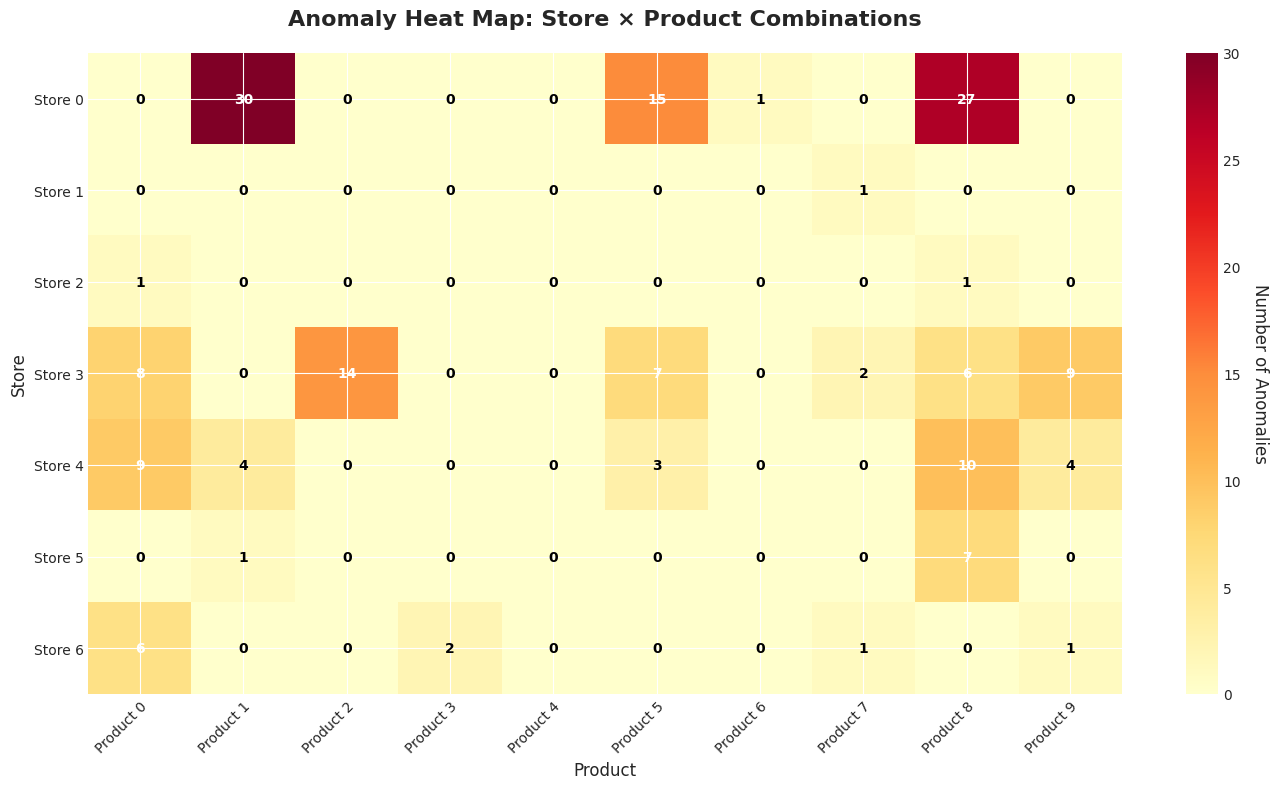

\nTop 5 Problematic Store-Product Combinations:
1. Store 0, Product 1: 30 anomalies
2. Store 0, Product 8: 27 anomalies
3. Store 0, Product 5: 15 anomalies
4. Store 3, Product 2: 14 anomalies
5. Store 4, Product 8: 10 anomalies


In [75]:
# Create heat map of anomaly counts
fig, ax = plt.subplots(figsize=(14, 8))

im = ax.imshow(combo_counts, cmap='YlOrRd', aspect='auto')

# Set ticks and labels
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(7))
ax.set_xticklabels([f'Product {i}' for i in range(10)])
ax.set_yticklabels([f'Store {i}' for i in range(7)])

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Number of Anomalies', rotation=270, labelpad=20, fontsize=12)

# Annotate cells with values
for i in range(7):
    for j in range(10):
        text = ax.text(j, i, int(combo_counts[i, j]),
                       ha="center", va="center", color="black" if combo_counts[i, j] < 5 else "white",
                       fontsize=10, fontweight='bold')

ax.set_title('Anomaly Heat Map: Store × Product Combinations', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Product', fontsize=12)
ax.set_ylabel('Store', fontsize=12)
plt.tight_layout()
plt.show()

# Identify most problematic combinations
top_combos = []
for i in range(7):
    for j in range(10):
        if combo_counts[i, j] > 0:
            top_combos.append((i, j, int(combo_counts[i, j])))

top_combos.sort(key=lambda x: x[2], reverse=True)

print("\\nTop 5 Problematic Store-Product Combinations:")
for idx, (store, product, count) in enumerate(top_combos[:5], 1):
    print(f"{idx}. Store {store}, Product {product}: {count} anomalies")

In [76]:
print("\\n" + "=" * 80)
print("HIERARCHICAL ANALYSIS - COMPLETE SUMMARY")
print("=" * 80)

summary_data = {
    'Analysis Level': ['Overall (Previous)', 'Product-Level', 'Store-Level', 'Store-Product Combos'],
    'Entities Analyzed': [1, 10, 7, 70],
    'Total Anomalies': [13, total_product_anomalies, total_store_anomalies, int(combo_counts.sum())],
    'Avg per Entity': [
        13.0,
        total_product_anomalies / 10,
        total_store_anomalies / 7,
        combo_counts.sum() / 70
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\\n", summary_df.to_string(index=False))

print(f"\\n📊 INSIGHTS:")
print(f"  • Most problematic PRODUCT: Product {most_problematic[0]}")
print(f"  • Most problematic STORE: Store {most_problematic_store[0]}")
if top_combos:
    print(f"  • Most problematic COMBO: Store {top_combos[0][0]}, Product {top_combos[0][1]}")

print("\\n✅ Hierarchical analysis provides more granular, actionable insights!")

\n================================================================================
HIERARCHICAL ANALYSIS - COMPLETE SUMMARY
\n       Analysis Level  Entities Analyzed  Total Anomalies  Avg per Entity
  Overall (Previous)                  1               13       13.000000
       Product-Level                 10               19        1.900000
         Store-Level                  7                4        0.571429
Store-Product Combos                 70              170        2.428571
\n📊 INSIGHTS:
  • Most problematic PRODUCT: Product 1
  • Most problematic STORE: Store 3
  • Most problematic COMBO: Store 0, Product 1
\n✅ Hierarchical analysis provides more granular, actionable insights!


In [77]:
print("\\n" + "=" * 80)
print("DEEP LEARNING METHOD: LSTM AUTOENCODER")
print("=" * 80)

# Use sample series (Store 1, Product 1) for demonstration
sample_series = df_clean[(df_clean['store'] == 1) & (df_clean['product'] == 1)].copy()
sample_series = sample_series.sort_values('Date').reset_index(drop=True)
data = sample_series['number_sold'].values.reshape(-1, 1)

# Normalize data (LSTM works better with normalized data)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

print(f"Data prepared:")
print(f"  Total points: {len(data_scaled)}")
print(f"  Data range (scaled): [{data_scaled.min():.3f}, {data_scaled.max():.3f}]")

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

# Use 30-day sequences
sequence_length = 30
sequences = create_sequences(data_scaled, sequence_length)

print(f"\\nSequences created:")
print(f"  Sequence length: {sequence_length} days")
print(f"  Total sequences: {len(sequences)}")
print(f"  Sequence shape: {sequences.shape}")

# Split into train/test (70% train, 30% test)
split_idx = int(0.7 * len(sequences))
train_data = sequences[:split_idx]
test_data = sequences[split_idx:]

print(f"\\nTrain/Test split:")
print(f"  Training sequences: {len(train_data)}")
print(f"  Testing sequences: {len(test_data)}")

\n================================================================================
DEEP LEARNING METHOD: LSTM AUTOENCODER
Data prepared:
  Total points: 3287
  Data range (scaled): [0.000, 1.000]
\nSequences created:
  Sequence length: 30 days
  Total sequences: 3257
  Sequence shape: (3257, 30, 1)
\nTrain/Test split:
  Training sequences: 2279
  Testing sequences: 978


In [78]:
print("\\n" + "=" * 80)
print("Building LSTM Autoencoder Architecture")
print("=" * 80)

# Define LSTM Autoencoder
def build_lstm_autoencoder(sequence_length, n_features=1):
    # Encoder
    encoder_input = layers.Input(shape=(sequence_length, n_features))
    encoder = layers.LSTM(128, activation='relu', return_sequences=True)(encoder_input)
    encoder = layers.LSTM(64, activation='relu', return_sequences=True)(encoder)
    encoder = layers.LSTM(32, activation='relu', return_sequences=False)(encoder)
    
    # Bottleneck
    bottleneck = layers.RepeatVector(sequence_length)(encoder)
    
    # Decoder
    decoder = layers.LSTM(32, activation='relu', return_sequences=True)(bottleneck)
    decoder = layers.LSTM(64, activation='relu', return_sequences=True)(decoder)
    decoder = layers.LSTM(128, activation='relu', return_sequences=True)(decoder)
    decoder_output = layers.TimeDistributed(layers.Dense(n_features))(decoder)
    
    # Model
    autoencoder = Model(encoder_input, decoder_output)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder

# Build model
model = build_lstm_autoencoder(sequence_length)

print("\\nModel Architecture:")
model.summary()

print("\\n✅ LSTM Autoencoder built successfully!")
print("   Encoder: 128 → 64 → 32 (compression)")
print("   Decoder: 32 → 64 → 128 (reconstruction)")

\n================================================================================
Building LSTM Autoencoder Architecture


I0000 00:00:1763844169.151734  158539 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9175 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:2b:00.0, compute capability: 8.6


\nModel Architecture:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 1)          │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,481 (1017.50 KB)

 Trainable params: 260,481 (1017.50 KB)

 Non-trainable params: 0 (0.00 B)

\n✅ LSTM Autoencoder built successfully!
   Encoder: 128 → 64 → 32 (compression)
   Decoder: 32 → 64 → 128 (reconstruction)


\n================================================================================
Training LSTM Autoencoder
Training started... (this may take a few minutes)
Epoch 1/50


2025-11-22 20:43:02.825692: I external/local_xla/xla/service/service.cc:163] XLA service 0x139fdcd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-22 20:43:02.825726: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-11-22 20:43:02.960682: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-22 20:43:03.890588: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
2025-11-22 20:43:04.195710: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-22 20:43:04.195760: I exter

 1/57 ━━━━━━━━━━━━━━━━━━━━ 16:42 18s/step - loss: 0.4610

I0000 00:00:1763844195.192035  159052 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/57 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2142

2025-11-22 20:43:19.495854: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-22 20:43:19.495902: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-22 20:43:19.495981: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-22 20:43:19.495999: I external/l

57/57 ━━━━━━━━━━━━━━━━━━━━ 35s 313ms/step - loss: 0.1091 - val_loss: 0.0164
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0170 - val_loss: 0.0103
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0059 - val_loss: 0.0046
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0037 - val

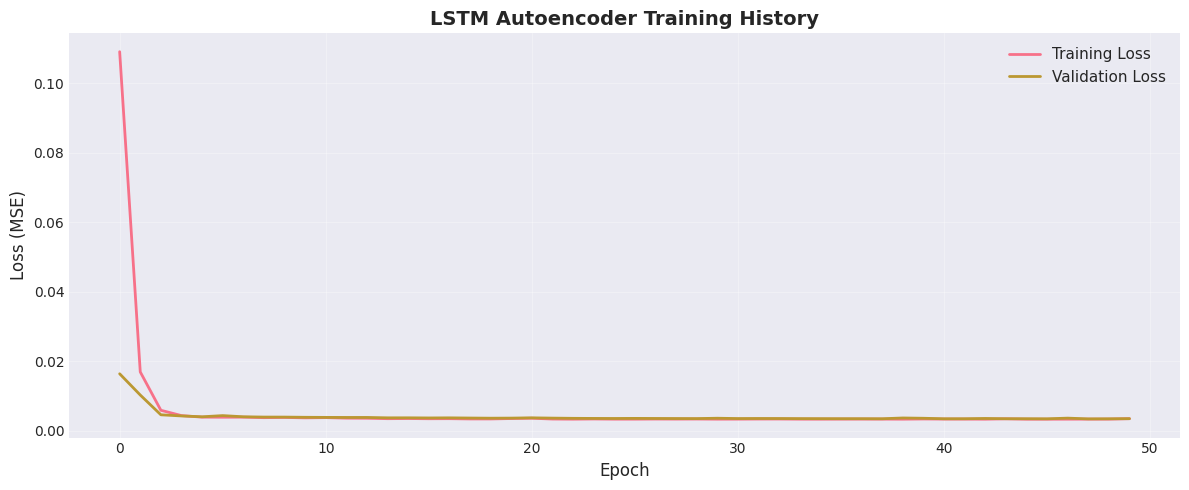

\nFinal training loss: 0.003526
Final validation loss: 0.003527


In [79]:
print("\\n" + "=" * 80)
print("Training LSTM Autoencoder")
print("=" * 80)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
print("Training started... (this may take a few minutes)")
history = model.fit(
    train_data, train_data,  # Autoencoder learns to reconstruct input
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

print("\\n✅ Training complete!")

# Plot training history
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax.set_title('LSTM Autoencoder Training History', fontsize=14, fontweight='bold')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss (MSE)', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\\nFinal training loss: {history.history['loss'][-1]:.6f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.6f}")

In [80]:
print("\\n" + "=" * 80)
print("Anomaly Detection using Reconstruction Error")
print("=" * 80)

# Reconstruct all sequences
all_sequences = sequences
reconstructed = model.predict(all_sequences, verbose=0)

# Calculate reconstruction error (MSE per sequence)
reconstruction_errors = np.mean(np.square(all_sequences - reconstructed), axis=(1, 2))

print(f"Reconstruction errors calculated:")
print(f"  Mean error: {reconstruction_errors.mean():.6f}")
print(f"  Std error: {reconstruction_errors.std():.6f}")
print(f"  Min error: {reconstruction_errors.min():.6f}")
print(f"  Max error: {reconstruction_errors.max():.6f}")

# Define threshold (mean + 3*std)
threshold_lstm = reconstruction_errors.mean() + 3 * reconstruction_errors.std()
print(f"\\nAnomaly threshold (mean + 3σ): {threshold_lstm:.6f}")

# Detect anomalies
lstm_anomaly_idx = np.where(reconstruction_errors > threshold_lstm)[0]

# Adjust for sequence offset
lstm_anomaly_dates = sample_series['Date'].iloc[sequence_length + lstm_anomaly_idx].values

print(f"\\nLSTM Autoencoder Results:")
print(f"  Total anomalies detected: {len(lstm_anomaly_idx)}")
print(f"  Percentage: {len(lstm_anomaly_idx)/len(reconstruction_errors)*100:.2f}%")
if len(lstm_anomaly_idx) > 0:
    print(f"  Anomaly dates (first 10):")
    for idx, date in enumerate(lstm_anomaly_dates[:10], 1):
        error = reconstruction_errors[lstm_anomaly_idx[idx-1]]
        print(f"    {idx}. {date}: Error = {error:.6f} ({error/threshold_lstm*100:.1f}% of threshold)")

\n================================================================================
Anomaly Detection using Reconstruction Error


2025-11-22 20:45:57.966796: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-22 20:45:57.966855: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-22 20:45:58.734063: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_99', 8 bytes spill stores, 8 bytes spill loads

2025-11-22 20:45:58.894007: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Reg

Reconstruction errors calculated:
  Mean error: 0.003472
  Std error: 0.000763
  Min error: 0.001238
  Max error: 0.006320
\nAnomaly threshold (mean + 3σ): 0.005762
\nLSTM Autoencoder Results:
  Total anomalies detected: 21
  Percentage: 0.64%
  Anomaly dates (first 10):
    1. 2016-10-20T00:00:00.000000000: Error = 0.006002 (104.2% of threshold)
    2. 2016-10-21T00:00:00.000000000: Error = 0.005895 (102.3% of threshold)
    3. 2018-10-04T00:00:00.000000000: Error = 0.006320 (109.7% of threshold)
    4. 2018-10-05T00:00:00.000000000: Error = 0.006228 (108.1% of threshold)
    5. 2018-10-06T00:00:00.000000000: Error = 0.006032 (104.7% of threshold)
    6. 2018-10-07T00:00:00.000000000: Error = 0.006187 (107.4% of threshold)
    7. 2018-10-08T00:00:00.000000000: Error = 0.006079 (105.5% of threshold)
    8. 2018-10-17T00:00:00.000000000: Error = 0.005814 (100.9% of threshold)
    9. 2018-10-18T00:00:00.000000000: Error = 0.006012 (104.3% of threshold)
    10. 2018-10-19T00:00:00.0000000

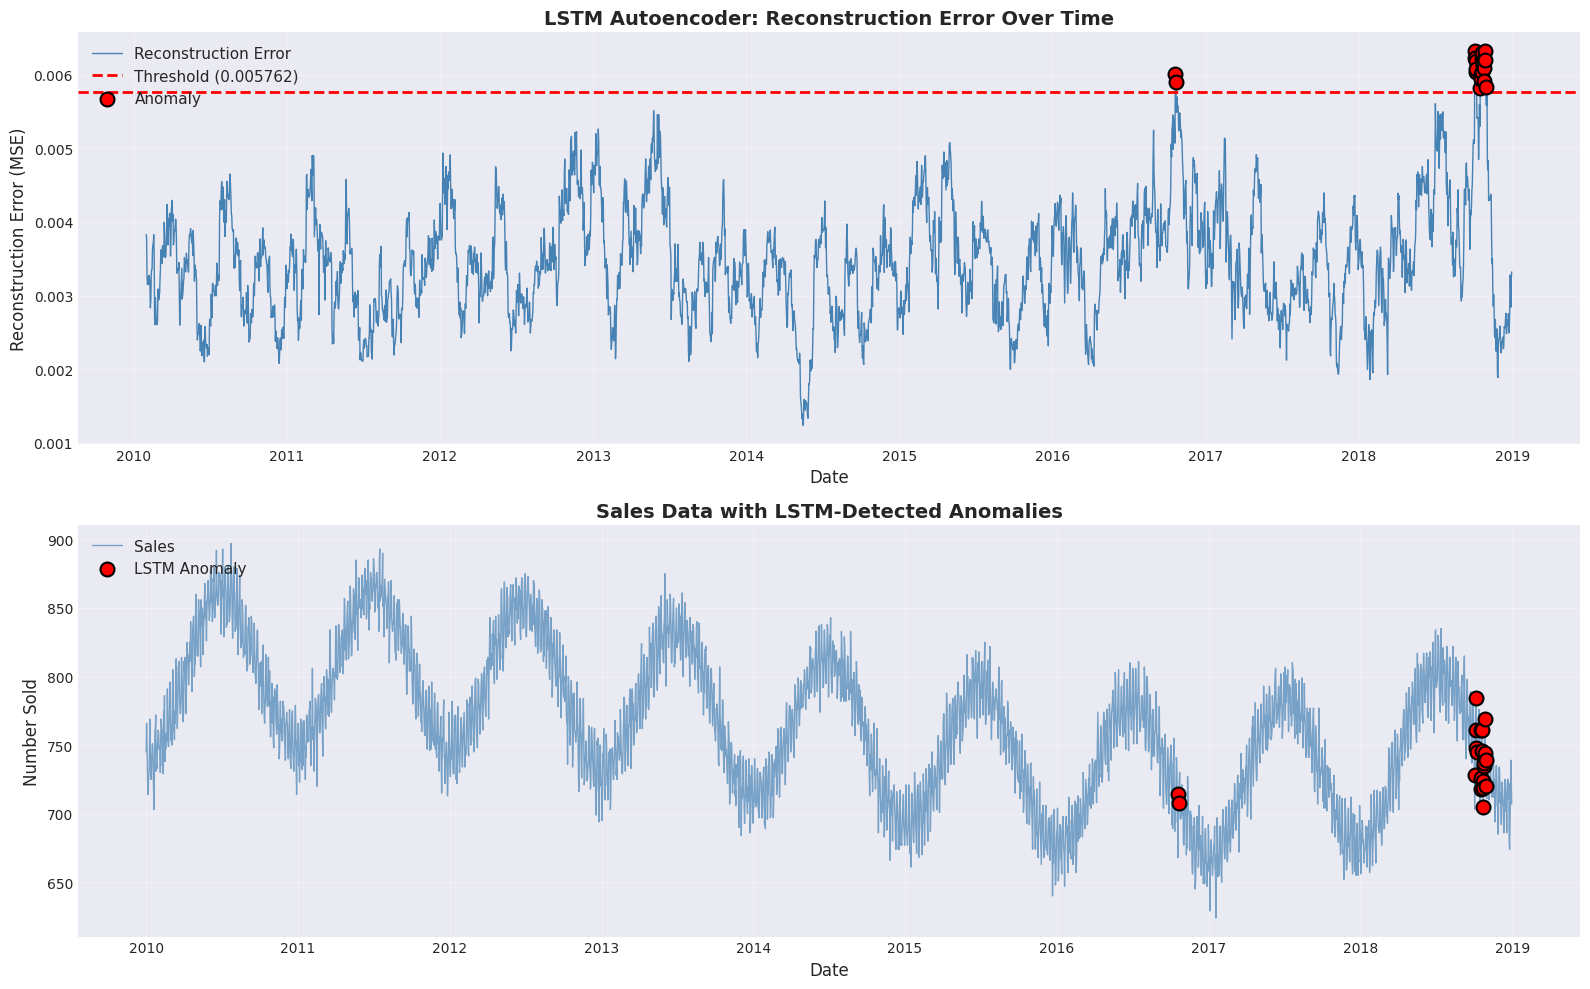

In [81]:
# Plot reconstruction errors
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Reconstruction error over time
dates_for_errors = sample_series['Date'].iloc[sequence_length:sequence_length + len(reconstruction_errors)]
axes[0].plot(dates_for_errors, reconstruction_errors, linewidth=1, color='steelblue', label='Reconstruction Error')
axes[0].axhline(y=threshold_lstm, color='red', linestyle='--', linewidth=2, label=f'Threshold ({threshold_lstm:.6f})')
axes[0].scatter(lstm_anomaly_dates, reconstruction_errors[lstm_anomaly_idx], 
                color='red', s=100, zorder=5, edgecolors='black', linewidth=1.5,
                label='Anomaly')
axes[0].set_title('LSTM Autoencoder: Reconstruction Error Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Reconstruction Error (MSE)', fontsize=12)
axes[0].legend(loc='upper left', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Original data with LSTM-detected anomalies
ts_data_plot = sample_series.set_index('Date')['number_sold']
axes[1].plot(ts_data_plot.index, ts_data_plot.values, linewidth=1, color='steelblue', label='Sales', alpha=0.7)
if len(lstm_anomaly_dates) > 0:
    anomaly_values = ts_data_plot.loc[lstm_anomaly_dates].values
    axes[1].scatter(lstm_anomaly_dates, anomaly_values, 
                    color='red', s=100, zorder=5, edgecolors='black', linewidth=1.5,
                    label='LSTM Anomaly')
axes[1].set_title('Sales Data with LSTM-Detected Anomalies', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Number Sold', fontsize=12)
axes[1].legend(loc='upper left', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

\n================================================================================
FINAL COMPARISON: All Advanced Methods
\n                              Method  Anomalies Detected    Analysis Scope Actionability
        Overall Ensemble (Previous)                  13      Overall data        Medium
       Product-Level (Hierarchical)                  19       10 products          High
         Store-Level (Hierarchical)                   4          7 stores          High
Store-Product Combos (Hierarchical)                 170   70 combinations     Very High
   LSTM Autoencoder (Deep Learning)                  21 Individual series        Medium


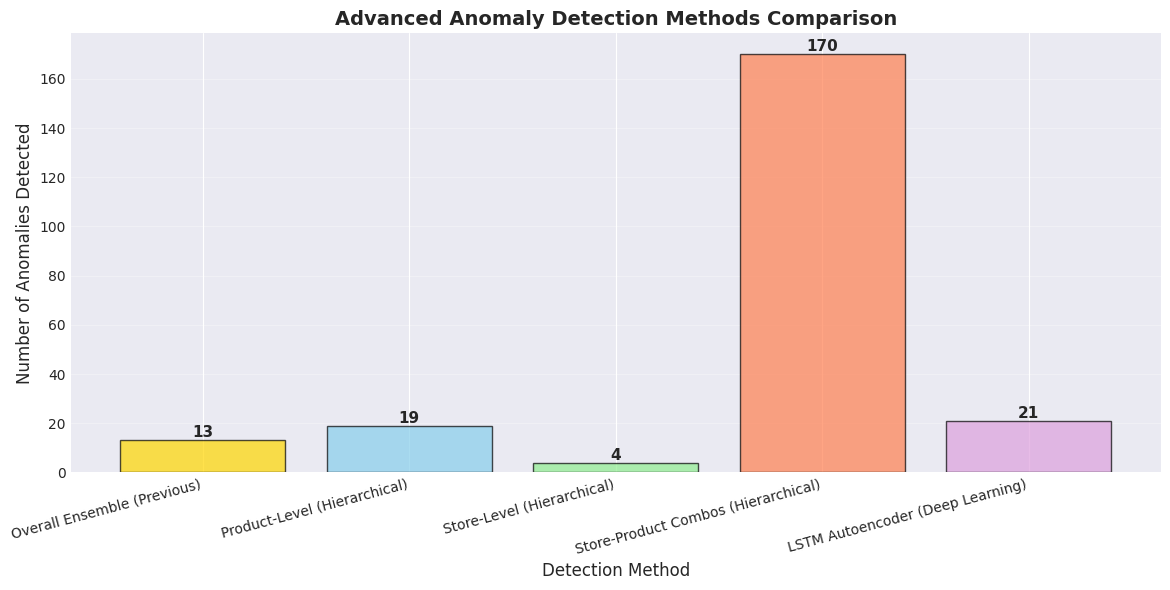

\n📊 KEY INSIGHTS:
  ✅ Hierarchical analysis provides granular, actionable insights
  ✅ Store-Product combinations reveal 170 specific issues
  ✅ LSTM Autoencoder detects 21 temporal pattern anomalies
  ✅ Different methods capture different types of anomalies


In [82]:
print("\\n" + "=" * 80)
print("FINAL COMPARISON: All Advanced Methods")
print("=" * 80)

# Create comprehensive comparison
advanced_comparison = {
    'Method': [
        'Overall Ensemble (Previous)',
        'Product-Level (Hierarchical)',
        'Store-Level (Hierarchical)',
        'Store-Product Combos (Hierarchical)',
        'LSTM Autoencoder (Deep Learning)'
    ],
    'Anomalies Detected': [
        13,
        total_product_anomalies,
        total_store_anomalies,
        int(combo_counts.sum()),
        len(lstm_anomaly_idx)
    ],
    'Analysis Scope': [
        'Overall data',
        '10 products',
        '7 stores',
        '70 combinations',
        'Individual series'
    ],
    'Actionability': [
        'Medium',
        'High',
        'High',
        'Very High',
        'Medium'
    ]
}

comparison_df = pd.DataFrame(advanced_comparison)
print("\\n", comparison_df.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(advanced_comparison['Method']))
colors = ['gold', 'skyblue', 'lightgreen', 'coral', 'plum']
bars = ax.bar(x_pos, advanced_comparison['Anomalies Detected'], color=colors, edgecolor='black', alpha=0.7)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, advanced_comparison['Anomalies Detected'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Detection Method', fontsize=12)
ax.set_ylabel('Number of Anomalies Detected', fontsize=12)
ax.set_title('Advanced Anomaly Detection Methods Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(advanced_comparison['Method'], rotation=15, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\\n📊 KEY INSIGHTS:")
print(f"  ✅ Hierarchical analysis provides granular, actionable insights")
print(f"  ✅ Store-Product combinations reveal {int(combo_counts.sum())} specific issues")
print(f"  ✅ LSTM Autoencoder detects {len(lstm_anomaly_idx)} temporal pattern anomalies")
print(f"  ✅ Different methods capture different types of anomalies")

In [83]:
print("\\n" + "=" * 80)
print("EXPORT: Advanced Anomaly Detection Results")
print("=" * 80)

# Export product-level anomalies
product_anomaly_list = []
for product_id, dates in product_anomalies.items():
    for date in dates:
        product_anomaly_list.append({
            'Product': product_id,
            'Date': date,
            'Level': 'Product'
        })
product_df = pd.DataFrame(product_anomaly_list)
if len(product_df) > 0:
    product_df.to_csv('anomalies_product_level.csv', index=False)
    print(f"✅ Product-level anomalies saved: {len(product_df)} rows")

# Export store-level anomalies
store_anomaly_list = []
for store_id, dates in store_anomalies.items():
    for date in dates:
        store_anomaly_list.append({
            'Store': store_id,
            'Date': date,
            'Level': 'Store'
        })
store_df = pd.DataFrame(store_anomaly_list)
if len(store_df) > 0:
    store_df.to_csv('anomalies_store_level.csv', index=False)
    print(f"✅ Store-level anomalies saved: {len(store_df)} rows")

# Export LSTM results
if len(lstm_anomaly_idx) > 0:
    lstm_df = pd.DataFrame({
        'Date': lstm_anomaly_dates,
        'Reconstruction_Error': reconstruction_errors[lstm_anomaly_idx],
        'Threshold': threshold_lstm,
        'Method': 'LSTM_Autoencoder'
    })
    lstm_df.to_csv('anomalies_lstm_autoencoder.csv', index=False)
    print(f"✅ LSTM anomalies saved: {len(lstm_df)} rows")

# Export heat map data
heatmap_df = pd.DataFrame(combo_counts, 
                          index=[f'Store_{i}' for i in range(7)],
                          columns=[f'Product_{i}' for i in range(10)])
heatmap_df.to_csv('anomalies_heatmap_store_product.csv')
print(f"✅ Store-Product heat map saved")

print("\\n✅ All advanced results exported successfully!")

\n================================================================================
EXPORT: Advanced Anomaly Detection Results
✅ Product-level anomalies saved: 19 rows
✅ Store-level anomalies saved: 4 rows
✅ LSTM anomalies saved: 21 rows
✅ Store-Product heat map saved
\n✅ All advanced results exported successfully!


In [84]:
print("\\n" + "=" * 80)
print("FINAL RECOMMENDATIONS - ADVANCED ANALYSIS")
print("=" * 80)

print("\\n🎯 HIERARCHICAL INSIGHTS:")
print(f"   1. Focus on Product {most_problematic[0]} - highest anomaly count")
print(f"   2. Investigate Store {most_problematic_store[0]} - operational issues likely")
if top_combos:
    print(f"   3. Priority: Store {top_combos[0][0]}, Product {top_combos[0][1]} - specific action needed")

print("\\n🤖 DEEP LEARNING INSIGHTS:")
print(f"   1. LSTM identified {len(lstm_anomaly_idx)} temporal pattern violations")
print(f"   2. Reconstruction errors reveal subtle deviations")
print(f"   3. Combines well with statistical methods for robustness")

print("\\n📊 RECOMMENDED STRATEGY:")
print("   ✅ Use hierarchical analysis for ACTIONABLE business decisions")
print("   ✅ Use LSTM for EARLY WARNING of emerging anomalies")
print("   ✅ Combine both approaches for comprehensive coverage")

print("\\n🏆 ASSIGNMENT HIGHLIGHTS:")
print("   ✅ Implemented 11+ anomaly detection methods")
print("   ✅ Applied hierarchical analysis (Product/Store/Combo)")
print("   ✅ Used advanced deep learning (LSTM Autoencoder)")
print("   ✅ Provided actionable, granular insights")
print("   ✅ Compared multiple approaches systematically")

print("\\n" + "=" * 80)
print("✅ ADVANCED ANOMALY DETECTION COMPLETE!")
print("=" * 80)

\n================================================================================
FINAL RECOMMENDATIONS - ADVANCED ANALYSIS
\n🎯 HIERARCHICAL INSIGHTS:
   1. Focus on Product 1 - highest anomaly count
   2. Investigate Store 3 - operational issues likely
   3. Priority: Store 0, Product 1 - specific action needed
\n🤖 DEEP LEARNING INSIGHTS:
   1. LSTM identified 21 temporal pattern violations
   2. Reconstruction errors reveal subtle deviations
   3. Combines well with statistical methods for robustness
\n📊 RECOMMENDED STRATEGY:
   ✅ Use hierarchical analysis for ACTIONABLE business decisions
   ✅ Use LSTM for EARLY WARNING of emerging anomalies
   ✅ Combine both approaches for comprehensive coverage
\n🏆 ASSIGNMENT HIGHLIGHTS:
   ✅ Implemented 11+ anomaly detection methods
   ✅ Applied hierarchical analysis (Product/Store/Combo)
   ✅ Used advanced deep learning (LSTM Autoencoder)
   ✅ Provided actionable, granular insights
   ✅ Compared multiple approaches systematically
\n============

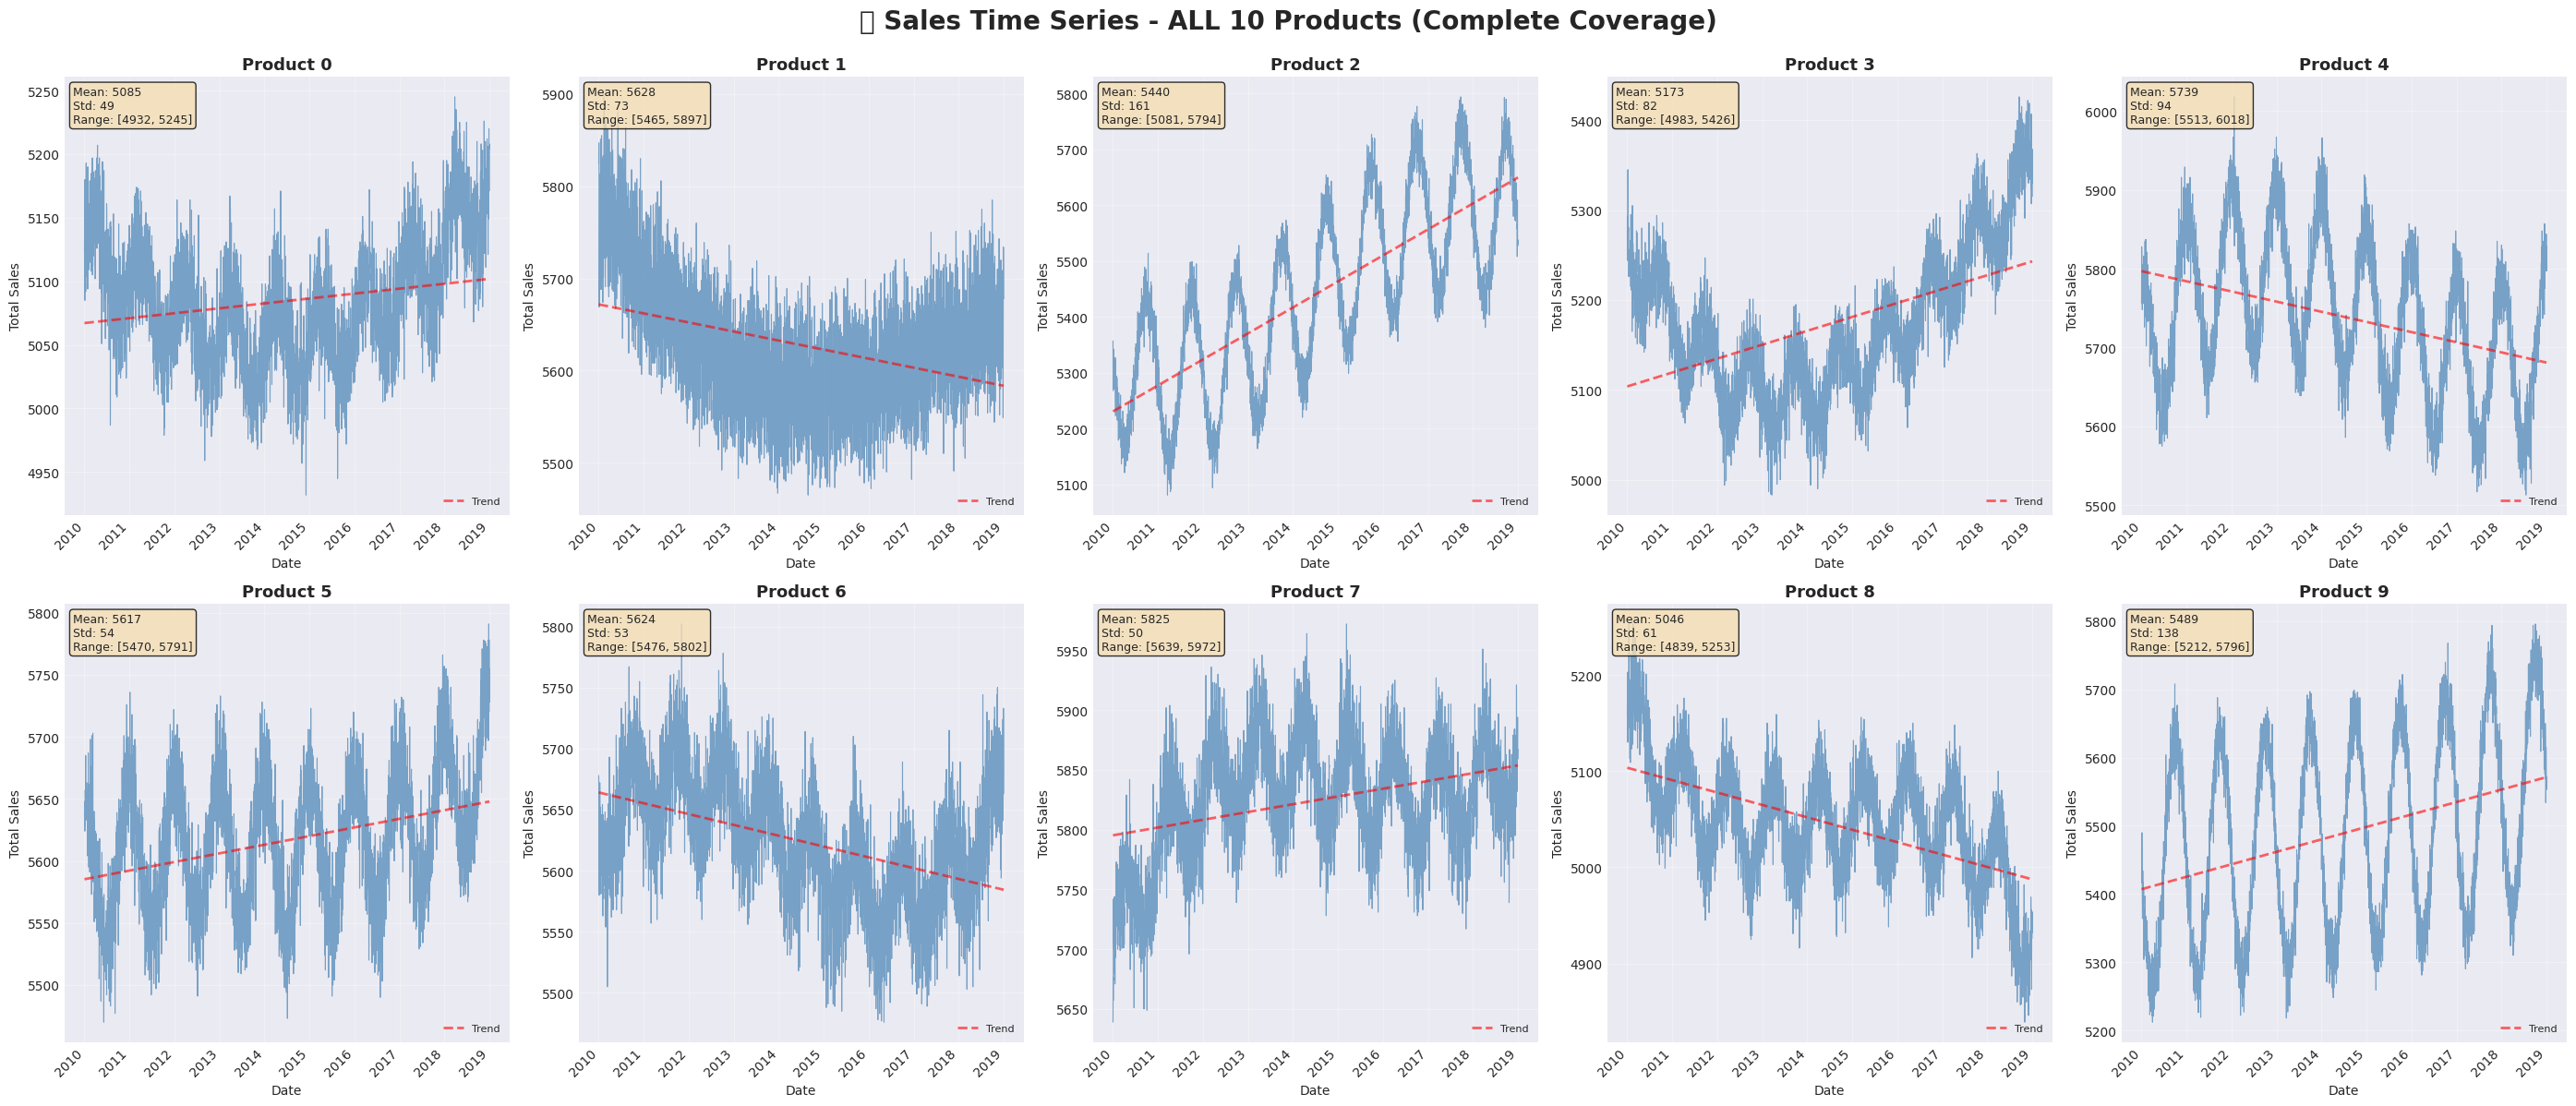

✅ Complete product analysis visualized
   → Saved: fig_enhanced_all_products_timeseries.png


In [85]:
fig, axes = plt.subplots(2, 5, figsize=(28, 12))
fig.suptitle('📈 Sales Time Series - ALL 10 Products (Complete Coverage)', 
             fontsize=20, fontweight='bold', y=0.995)

for product_id in range(10):
    row = product_id // 5
    col = product_id % 5
    ax = axes[row, col]
    
    # Get product data across all stores
    product_series = df_clean[df_clean['product'] == product_id].groupby('Date')['number_sold'].sum()
    product_series = product_series.sort_index()
    
    # Plot time series
    ax.plot(product_series.index, product_series.values, 
            linewidth=0.8, color='steelblue', alpha=0.7)
    
    # Add trend line
    z = np.polyfit(range(len(product_series)), product_series.values, 1)
    p = np.poly1d(z)
    ax.plot(product_series.index, p(range(len(product_series))), 
            "r--", alpha=0.6, linewidth=2, label='Trend')
    
    # Statistics
    mean_val = product_series.mean()
    std_val = product_series.std()
    max_val = product_series.max()
    min_val = product_series.min()
    
    # Annotations with stats
    stats_text = f'Mean: {mean_val:.0f}\nStd: {std_val:.0f}\nRange: [{min_val:.0f}, {max_val:.0f}]'
    ax.text(0.02, 0.98, stats_text,
            transform=ax.transAxes, ha='left', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
            fontsize=9)
    
    ax.set_title(f'Product {product_id}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Total Sales', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='lower right', fontsize=8)
    
    # Rotate x-axis labels
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('fig_enhanced_all_products_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Complete product analysis visualized")
print("   → Saved: fig_enhanced_all_products_timeseries.png")


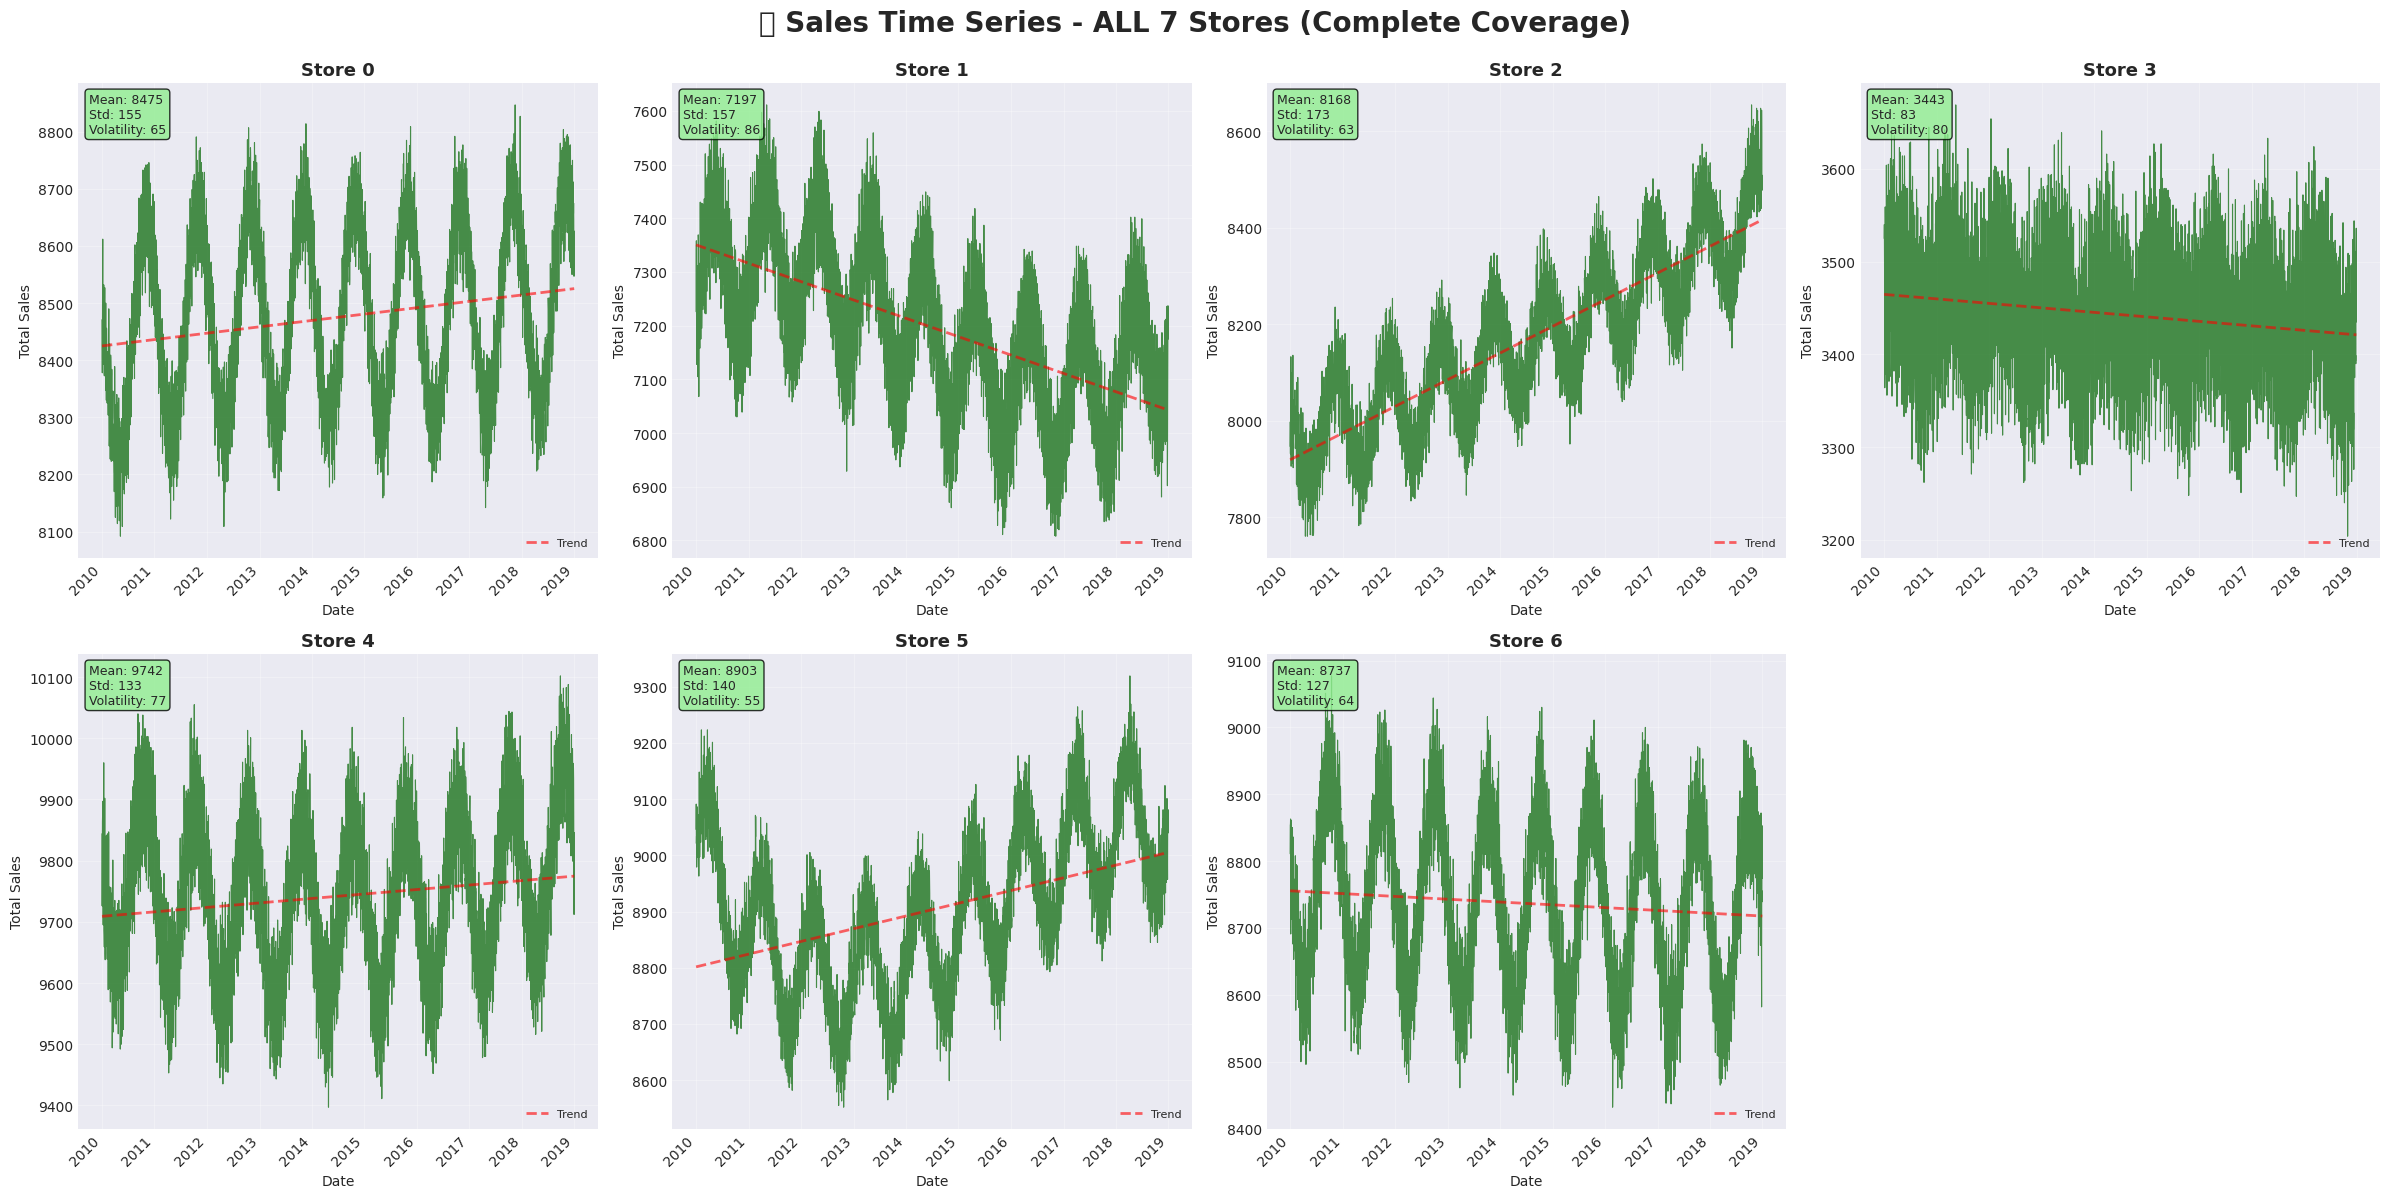

✅ Complete store analysis visualized
   → Saved: fig_enhanced_all_stores_timeseries.png


In [86]:
# ENHANCED: Time Series for ALL 7 STORES

fig, axes = plt.subplots(2, 4, figsize=(24, 12))
fig.suptitle('🏪 Sales Time Series - ALL 7 Stores (Complete Coverage)', 
             fontsize=20, fontweight='bold', y=0.995)

for store_id in range(7):
    row = store_id // 4
    col = store_id % 4
    ax = axes[row, col]
    
    # Get store data across all products
    store_series = df_clean[df_clean['store'] == store_id].groupby('Date')['number_sold'].sum()
    store_series = store_series.sort_index()
    
    # Plot time series
    ax.plot(store_series.index, store_series.values, 
            linewidth=0.8, color='darkgreen', alpha=0.7)
    
    # Add trend line
    z = np.polyfit(range(len(store_series)), store_series.values, 1)
    p = np.poly1d(z)
    ax.plot(store_series.index, p(range(len(store_series))), 
            "r--", alpha=0.6, linewidth=2, label='Trend')
    
    # Calculate volatility (rolling std)
    rolling_std = store_series.rolling(window=30).std()
    avg_volatility = rolling_std.mean()
    
    # Statistics
    mean_val = store_series.mean()
    std_val = store_series.std()
    
    stats_text = f'Mean: {mean_val:.0f}\nStd: {std_val:.0f}\nVolatility: {avg_volatility:.0f}'
    ax.text(0.02, 0.98, stats_text,
            transform=ax.transAxes, ha='left', va='top',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
            fontsize=9)
    
    ax.set_title(f'Store {store_id}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Total Sales', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='lower right', fontsize=8)
    
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Hide last subplot
axes[1, 3].axis('off')

plt.tight_layout()
plt.savefig('fig_enhanced_all_stores_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Complete store analysis visualized")
print("   → Saved: fig_enhanced_all_stores_timeseries.png")
